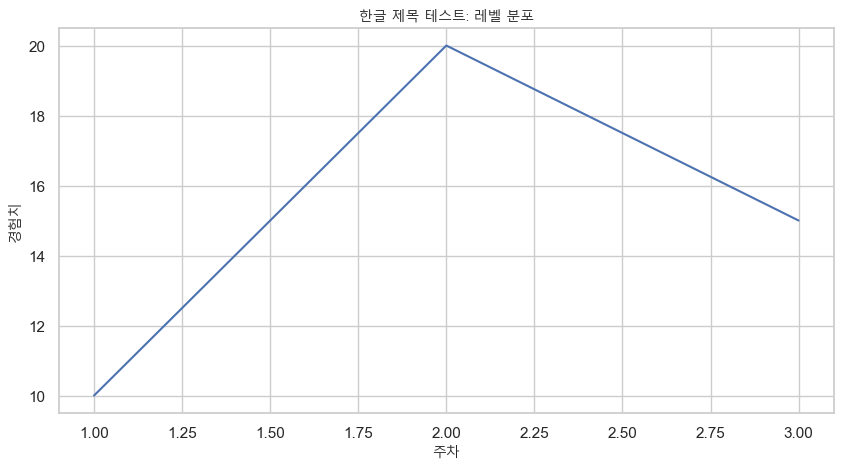

In [1]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 1. 정확한 경로에서 폰트 불러오기
font_path = "C:/Windows/Fonts/malgun.ttf"  # '맑은 고딕' 경로
font_prop = fm.FontProperties(fname=font_path)

# 2. 전체 설정 적용 (폰트 이름 직접 명시)
plt.rcParams["font.family"] = font_prop.get_name()
plt.rcParams["axes.unicode_minus"] = False
sns.set(style="whitegrid")
plt.rcParams["figure.figsize"] = (10, 5)

# 3. 테스트: fontproperties=font_prop 꼭 넣기!
plt.figure()
plt.title("한글 제목 테스트: 레벨 분포", fontproperties=font_prop)
plt.plot([1, 2, 3], [10, 20, 15])
plt.xlabel("주차", fontproperties=font_prop)
plt.ylabel("경험치", fontproperties=font_prop)
plt.show()


In [2]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import seaborn as sns

# 1. 정확한 폰트 경로
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = fm.FontProperties(fname=font_path)
plt.rcParams["font.family"] = font_prop.get_name()  # ✅ 핵심
plt.rcParams["axes.unicode_minus"] = False


In [4]:
import pandas as pd

In [6]:
df = pd.read_csv("고정스냅샷(10월17일).csv", low_memory=False)

In [5]:
# 원본 df에서 character_exp 컬럼 str 타입인 애들 찾기
str_exp_rows = df[df['character_exp'].apply(lambda x: isinstance(x, str))]

# 몇 개나 있는지 확인
print(f"character_exp이 문자열(str)인 행 수: {len(str_exp_rows)}")

# 실제 어떤 값인지 확인
print(str_exp_rows[['ocid', 'character_name', 'character_exp']])


character_exp이 문자열(str)인 행 수: 0
Empty DataFrame
Columns: [ocid, character_name, character_exp]
Index: []


In [19]:
import pandas as pd

df_sample = df.sample(n=1000, random_state=42)  # random_state 고정하면 재현 가능

print(f"✅ 샘플 shape: {df_sample.shape}")
df_sample.to_csv("sample.csv", index=False, encoding="utf-8-sig")

✅ 샘플 shape: (1000, 49)


In [6]:
df_sample.head()

NameError: name 'df_sample' is not defined

In [ ]:
# [기본 정보]  character_name, character_gender, character_class, character_level, character_guild_name, world_name
# [성장/스펙 지표] union_level, arcane_sum, authentic_sum , dojang_best_floor (무릉) ,set_arcane_count, set_eternal_count, set_lubatiss_count, set_absorlab_count ← 세트템 구성까지!
#[유저 상태] access_flag ← 마지막 기준 접속 여부 , liberation_quest_clear_flag ← 해방 여부 (무기해방)
# [주차별 활동] 경험치 변화: exp_1010 ~ exp_1219 ,접속 여부: access_1017 ~ access_1219 (주차별 접속 패턴 분석 가능)
#[생존분석용 라벨] duration: 생존 기간 , event: 이탈 여부   

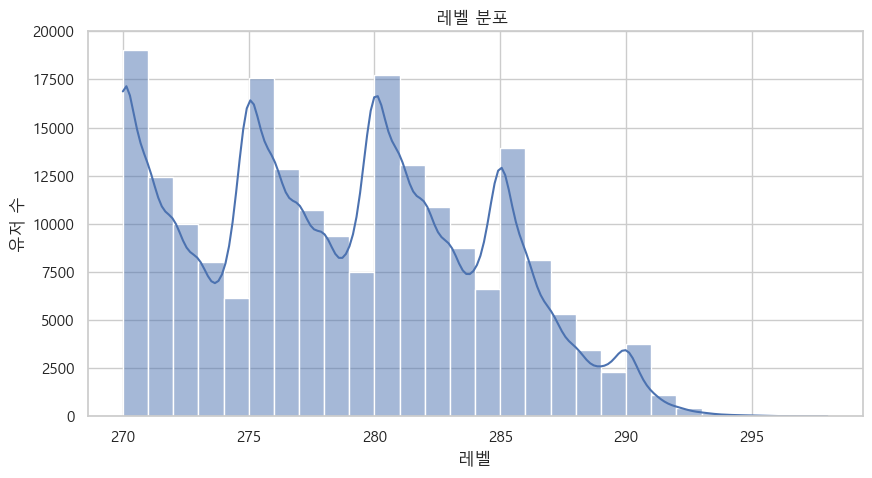

In [7]:
import numpy as np

# 1. 레벨 범위를 1단위로 나눈 bin 생성
bins = np.arange(df["character_level"].min(), df["character_level"].max() + 1)

# 2. 1레벨 단위 히스토그램 + 밀도곡선
sns.histplot(df["character_level"], bins=bins, kde=True)
plt.title("레벨 분포 ", fontproperties=font_prop)
plt.xlabel("레벨", fontproperties=font_prop)
plt.ylabel("유저 수", fontproperties=font_prop)
plt.show()

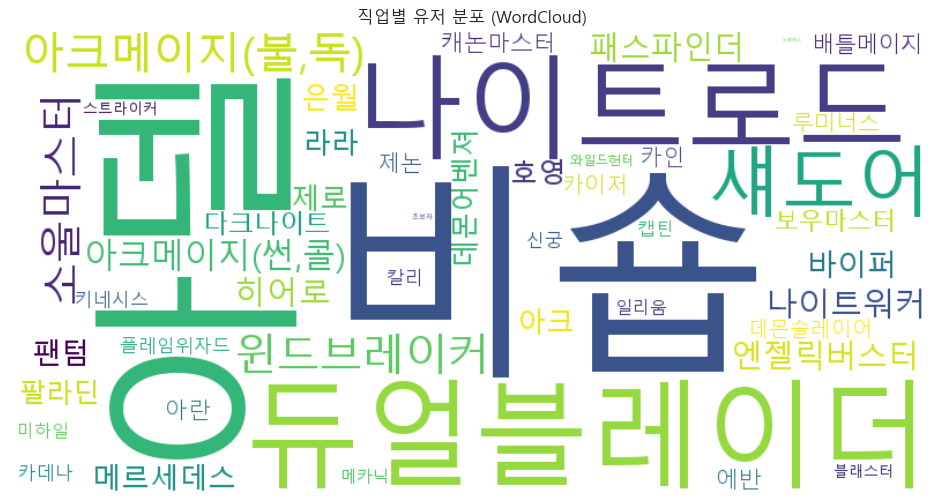

In [8]:

from wordcloud import WordCloud
import matplotlib.pyplot as plt

# 직업별 캐릭터 수 집계
class_counts = df["character_class"].value_counts().to_dict()

# 워드클라우드 생성
wc = WordCloud(
    font_path="C:/Windows/Fonts/malgun.ttf",  # 한글 지원 폰트
    background_color="white",
    width=800,
    height=400
)

# 워드클라우드에 데이터 전달
wc.generate_from_frequencies(class_counts)

# 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.title("직업별 유저 분포 (WordCloud)", fontproperties=font_prop)
plt.show()


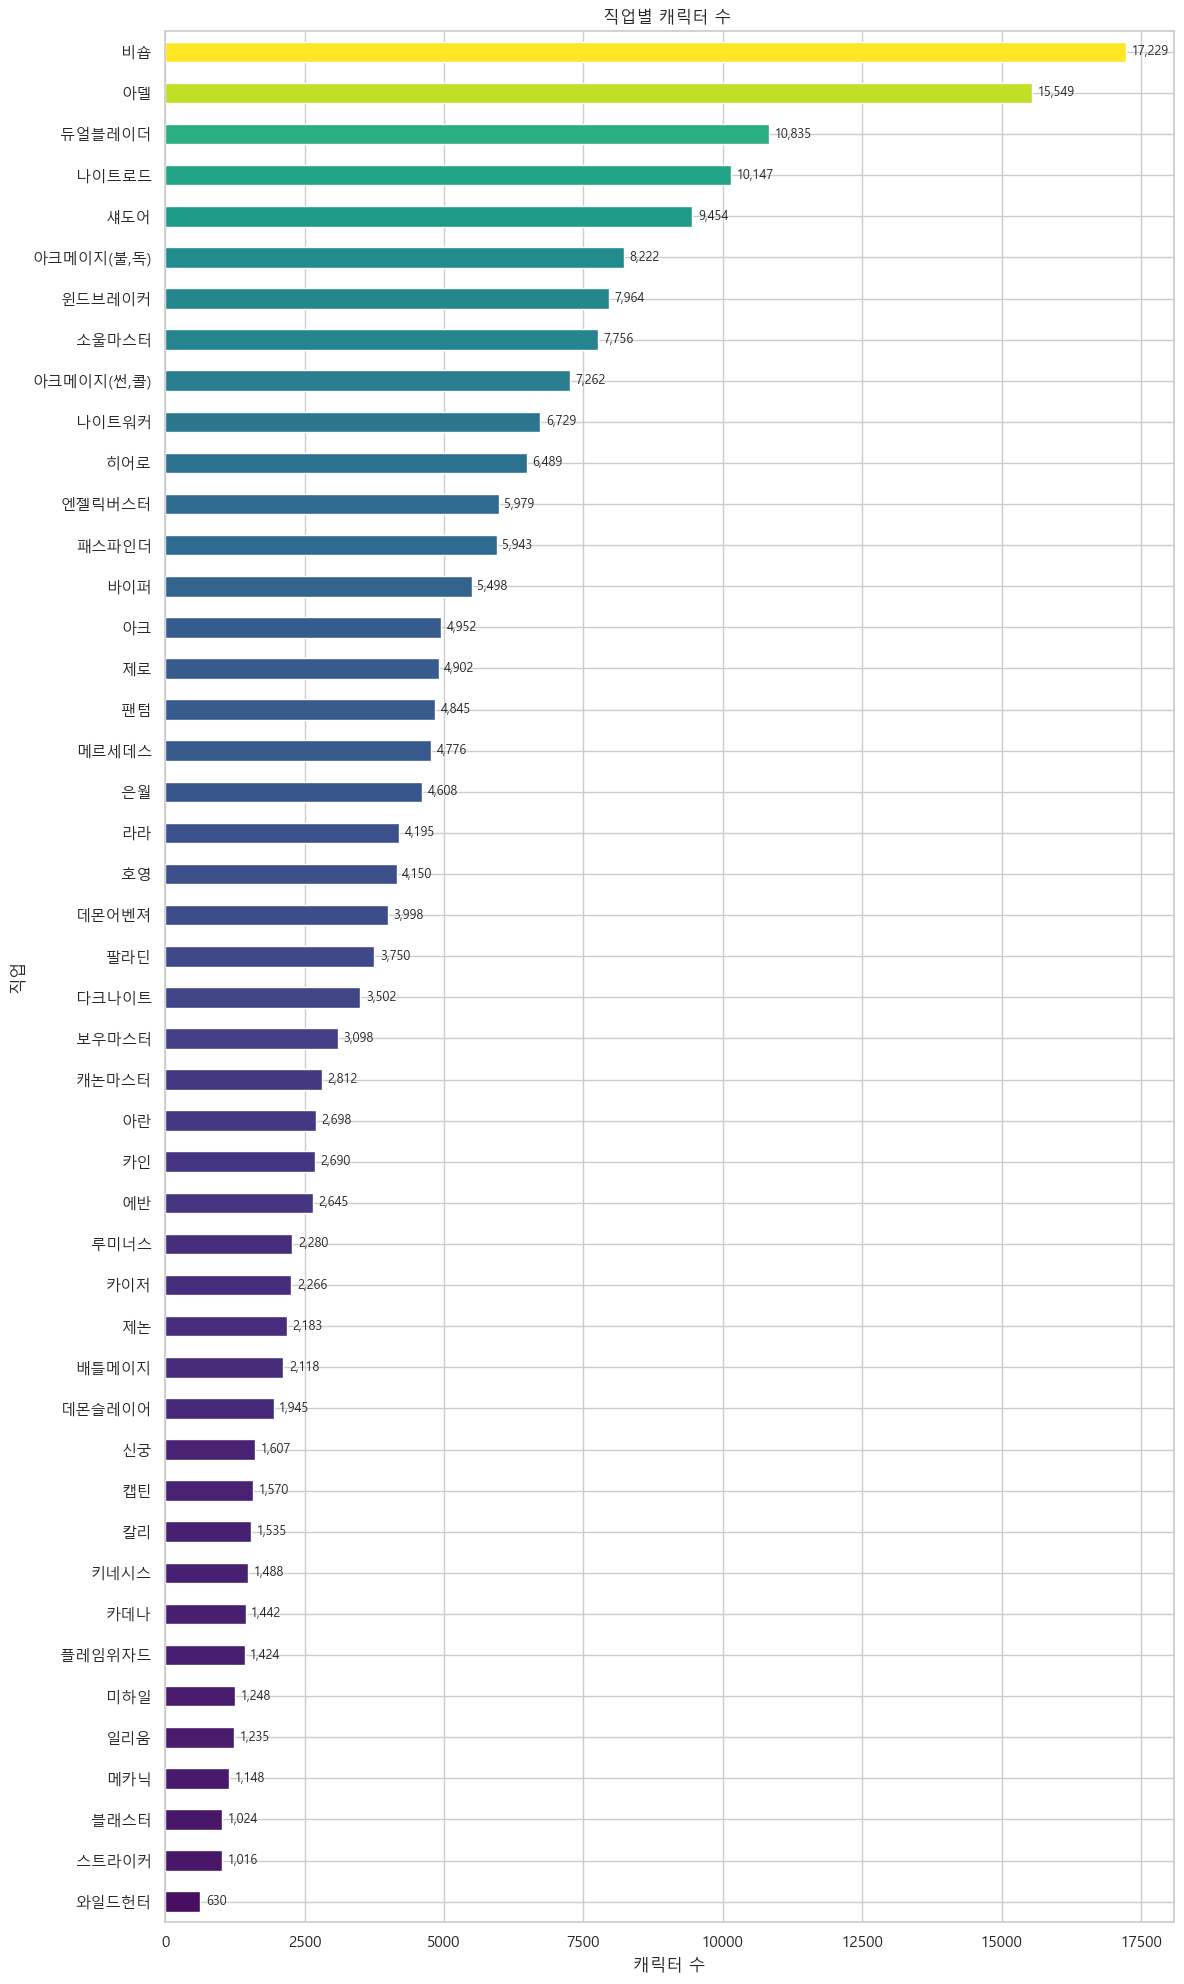

In [9]:
# 1. 조건 필터링
filtered_df = df[df["character_class_level"] == 6]

# 2. 직업별 캐릭터 수 계산
job_counts = filtered_df["character_class"].value_counts()

# 3. 시각화
plt.figure(figsize=(12, 20))
bars = job_counts.plot(kind="barh", color=plt.cm.viridis(job_counts / job_counts.max()))

# 4. 제목 및 라벨
plt.title("직업별 캐릭터 수 ", fontproperties=font_prop)
plt.xlabel("캐릭터 수", fontproperties=font_prop)
plt.ylabel("직업", fontproperties=font_prop)

# 5. 막대 옆에 숫자 표시
for i, v in enumerate(job_counts):
    plt.text(v + 100, i, f"{v:,}", va="center", fontsize=9)

# 6. 가장 많은 직업이 위로
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()
#인기직업, 비주류직업 확인가능 

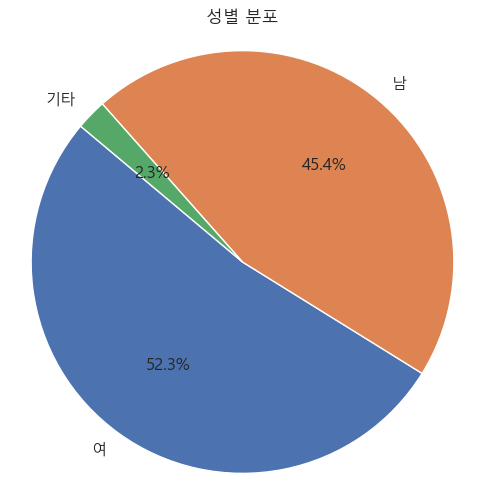

In [10]:
gender_counts = df["character_gender"].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(gender_counts, labels=gender_counts.index, autopct="%1.1f%%", startangle=140)
plt.title("성별 분포", fontproperties=font_prop)
plt.axis("equal")
plt.show()


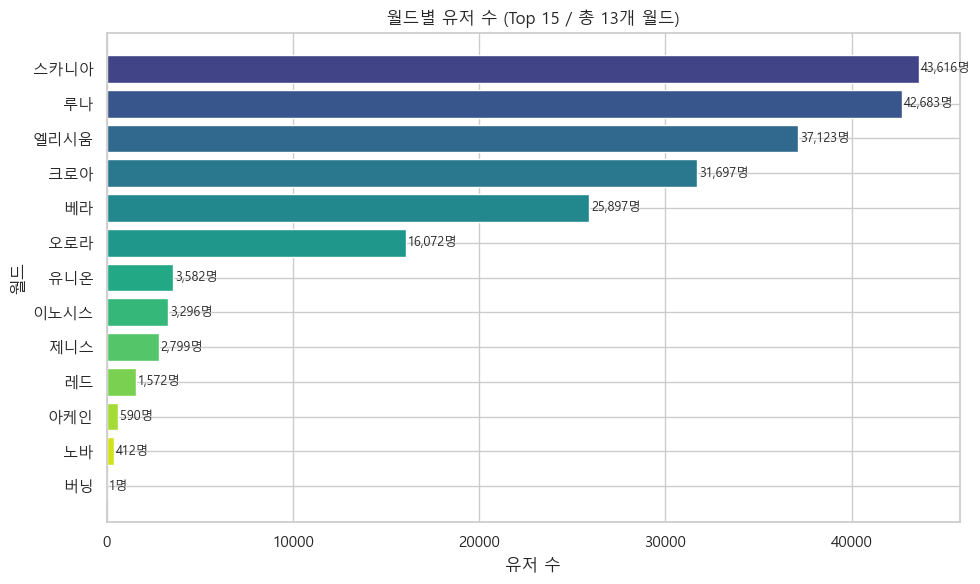

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# 1. Top 15 월드 기준 유저 수 계산
world_counts = df["world_name"].value_counts().head(15)
colors = cm.viridis(np.linspace(0.2, 1, len(world_counts)))  # 색상 점진 변화

# 2. 시각화
plt.figure(figsize=(10, 6))
bars = plt.barh(world_counts.index, world_counts.values, color=colors)

# 3. 수치 라벨 추가
for i, v in enumerate(world_counts.values):
    plt.text(v + 100, i, f"{v:,}명", va="center", fontsize=9)

# 4. 제목 및 축 설정
plt.title(f"월드별 유저 수 (Top 15 / 총 {df['world_name'].nunique()}개 월드)", fontproperties=font_prop)
plt.xlabel("유저 수", fontproperties=font_prop)
plt.ylabel("월드", fontproperties=font_prop)
plt.gca().invert_yaxis()  # 많은 월드가 위로
plt.tight_layout()
plt.show()
#스카니아, 루나, 베라 서버에 유저 집중.

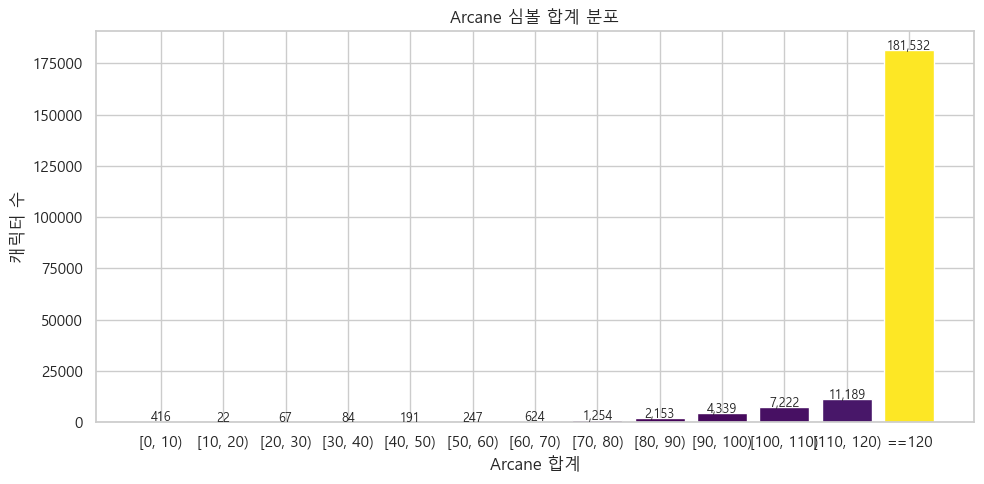

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# 1. 10단위 bin (right=False → 120은 제외됨)
bins = np.arange(0, 130, 10)  # [0,10), ..., [110,120)

# 2. 구간별 count
arcane_cut = pd.cut(df["arcane_sum"], bins=bins, right=False)
arcane_counts = arcane_cut.value_counts().sort_index()

# 3. 120값만 따로 집계
count_120 = (df["arcane_sum"] == 120).sum()
arcane_counts["==120"] = count_120  # 딕셔너리 추가처럼 작동

# 4. 시각화
plt.figure(figsize=(10, 5))
bars = plt.bar(arcane_counts.index.astype(str), arcane_counts.values, color=plt.cm.viridis(arcane_counts.values / arcane_counts.max()))

# 5. 수치 라벨 표시
for i, v in enumerate(arcane_counts.values):
    plt.text(i, v + 50, f"{v:,}", ha="center", fontsize=9)

# 6. 제목/축
plt.title("Arcane 심볼 합계 분포", fontproperties=font_prop)
plt.xlabel("Arcane 합계", fontproperties=font_prop)
plt.ylabel("캐릭터 수", fontproperties=font_prop)
plt.tight_layout()
plt.show()
#Arcane 심볼 강화는 고레벨 기본 스펙.거의 모든 270레벨 이상 유저는 Arcane 심볼 완성 상태

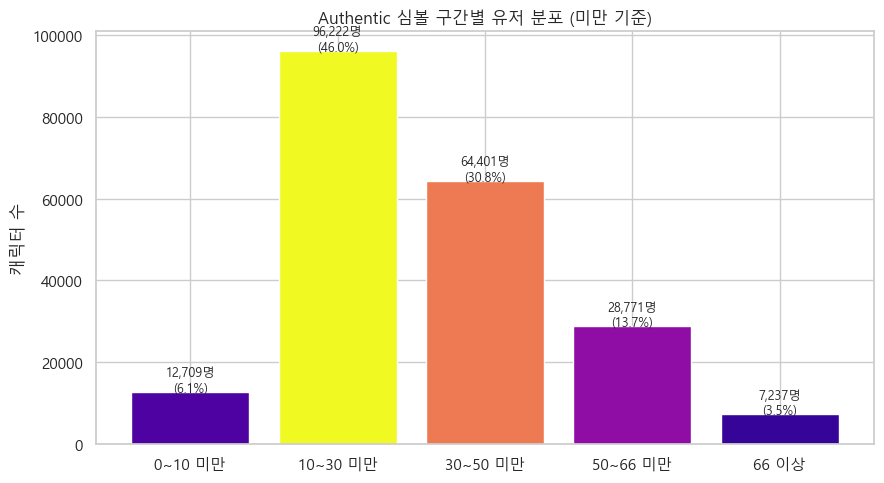

In [105]:
# 1. authentic_sum 구간 함수 (미만 기준)
def authentic_group(val):
    if val < 10:
        return "0~10 미만"
    elif val < 30:
        return "10~30 미만"
    elif val < 50:
        return "30~50 미만"
    elif val < 66:
        return "50~66 미만"
    else:
        return "66 이상"

df["authentic_group"] = df["authentic_sum"].apply(authentic_group)

# 2. 순서 고정 후 카운트
order = ["0~10 미만", "10~30 미만", "30~50 미만", "50~66 미만", "66 이상"]
auth_group_counts = df["authentic_group"].value_counts().reindex(order)

# 3. 시각화
plt.figure(figsize=(9, 5))
bars = plt.bar(auth_group_counts.index, auth_group_counts.values, color=plt.cm.plasma(auth_group_counts.values / auth_group_counts.max()))

# 4. 수치 + 퍼센트 라벨
total = auth_group_counts.sum()
for i, v in enumerate(auth_group_counts.values):
    percent = v / total * 100
    plt.text(i, v + 100, f"{v:,}명\n({percent:.1f}%)", ha="center", fontsize=9)

# 5. 제목 및 레이아웃
plt.title("Authentic 심볼 구간별 유저 분포 (미만 기준)", fontproperties=font_prop)
plt.ylabel("캐릭터 수", fontproperties=font_prop)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()
#10~30 미만 구간에 가장 많은 유저 존재 , Authentic 심볼은 아직 완성되지 않은 유저가 대다수

In [ ]:
# 22카루타() vs18에테 + 22앱솔  , 22 카루타+ 18아케인  , 17에테(윗잠유니크,에디에픽) 18에테(윗잠 유니크~레전,에디에픽) + 22앱솔 , 18에테 + 18아케인 , 에테 풀셋              해방여부 1  : 에테 + 1  해방여부 0 : 파프+1 앱솔+1 아케인+1

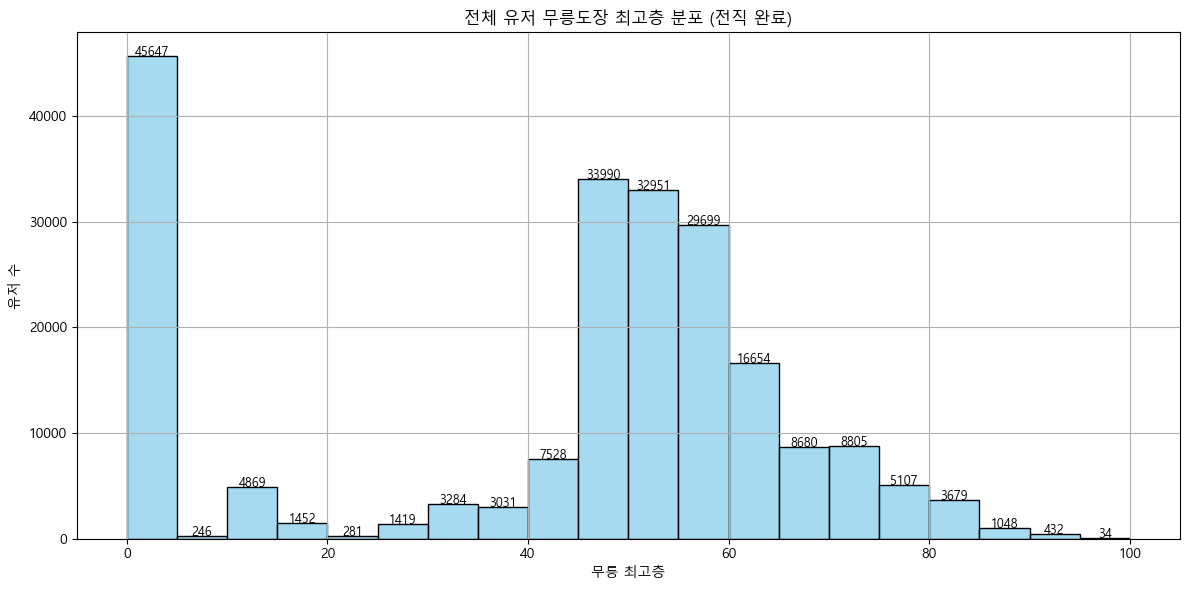

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# 전직 완료 유저 필터링
df_filtered = df[df['character_class_level'] == 6].copy()

# 히스토그램용 구간 설정 (5층 단위)
bins = np.arange(0, df_filtered['dojang_best_floor'].max() + 5, 5)
counts, edges = np.histogram(df_filtered['dojang_best_floor'], bins=bins)

# 시각화
plt.figure(figsize=(12, 6))
sns.histplot(df_filtered['dojang_best_floor'], bins=bins, color='skyblue', edgecolor='black')

# 구간별 유저 수 텍스트로 표시
for i in range(len(counts)):
    plt.text((edges[i] + edges[i+1]) / 2, counts[i] + 1, str(counts[i]), 
             ha='center', fontsize=9, color='black')

plt.title("전체 유저 무릉도장 최고층 분포 (전직 완료)")
plt.xlabel("무릉 최고층")
plt.ylabel("유저 수")
plt.grid(True)
plt.tight_layout()
plt.show()
#45~60층 유저가많고 80층이상은 상위 전루력 소수 유저 

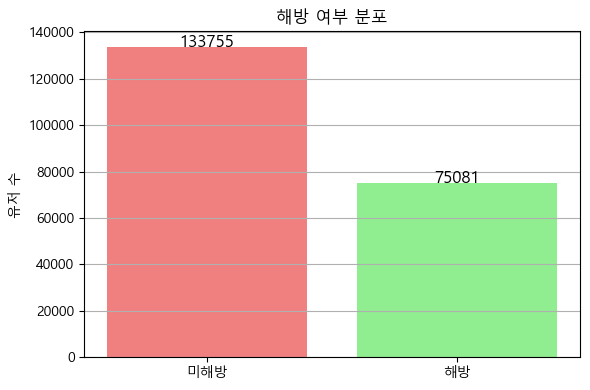

In [11]:
import matplotlib.pyplot as plt

# 해방 여부 카운트
liberation_counts = df_filtered['liberation_quest_clear_flag'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(6, 4))
bars = plt.bar(['미해방', '해방'], liberation_counts.values, color=['lightcoral', 'lightgreen'])
plt.title("해방 여부 분포")
plt.ylabel("유저 수")

# 막대 위에 숫자 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{int(yval)}", ha='center', fontsize=12)

plt.tight_layout()
plt.grid(axis='y')
plt.show()
#해방률은 전체적으로 약 35~40% 수준. 생각보다 해방까지 가는 유저는 소수

In [12]:
# 길드 가입 여부 컬럼 생성

df_filtered['guild_status'] = df_filtered['character_guild_name'].apply(
    lambda x: '미가입' if x == '미가입' else '가입'
)


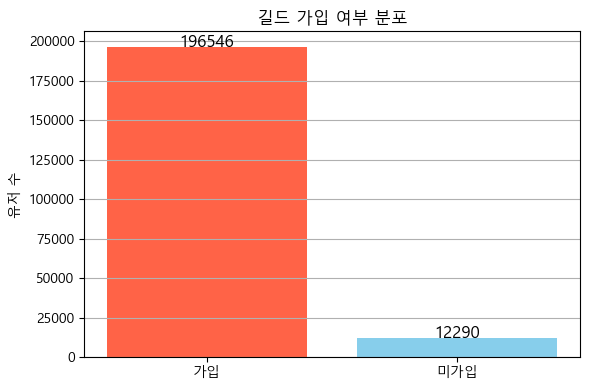

In [13]:
import matplotlib.pyplot as plt

# 길드 가입 여부 카운트
guild_counts = df_filtered['guild_status'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(6, 4))
bars = plt.bar(guild_counts.index, guild_counts.values, color=['tomato', 'skyblue'])
plt.title("길드 가입 여부 분포")
plt.ylabel("유저 수")

# 막대 위 숫자 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{int(yval)}", ha='center', fontsize=12)

plt.tight_layout()
plt.grid(axis='y')
plt.show()

#전체 유저 중 약 94% 이상이 길드에 가입되어 있음. 미가입자 비율은 6% 미만으로 극히 적음.

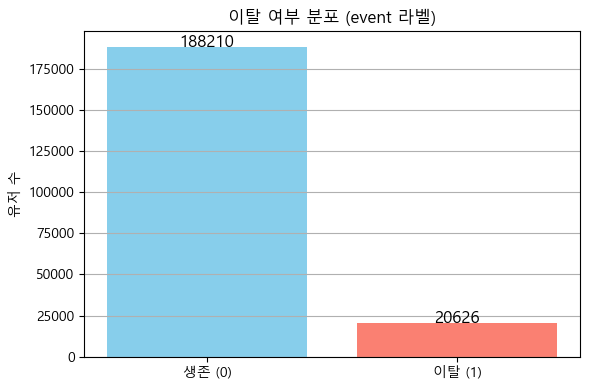

In [14]:
import matplotlib.pyplot as plt

# 이탈 여부 카운트
event_counts = df_filtered['event'].value_counts().sort_index()

# 시각화
plt.figure(figsize=(6, 4))
bars = plt.bar(['생존 (0)', '이탈 (1)'], event_counts.values, color=['skyblue', 'salmon'])
plt.title("이탈 여부 분포 (event 라벨)")
plt.ylabel("유저 수")

# 막대 위에 숫자 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{int(yval)}", ha='center', fontsize=12)

plt.tight_layout()
plt.grid(axis='y')
plt.show()
#이탈율 약 10프로내외 

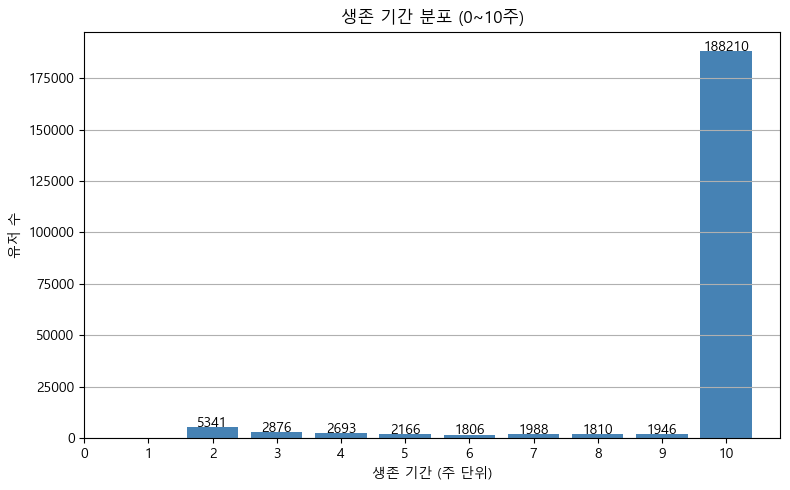

In [16]:
import matplotlib.pyplot as plt

# 0~10 사이 값만 필터링
duration_counts = df_filtered['duration'].value_counts().sort_index()
duration_counts = duration_counts[duration_counts.index <= 10]

# 시각화
plt.figure(figsize=(8, 5))
bars = plt.bar(duration_counts.index, duration_counts.values, color='steelblue')

plt.title("생존 기간 분포 (0~10주)")
plt.xlabel("생존 기간 (주 단위)")
plt.ylabel("유저 수")
plt.xticks(range(0, 11))

# 막대 위에 숫자 표시
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 5, f"{int(yval)}", ha='center', fontsize=10)

plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [ ]:
#레벨 과 여러 컬럼들 조합으로 볼수있는 것들 
#레벨구간 × 이탈여부 , 레벨구간 × 심볼 합계 (arcane_sum, authentic_sum) , 레벨구간 × 무릉도장 층수, 레벨구간 × 해방 여부 , 레벨구간 × 길드 가입 여부, 레벨구간 × 생존 기간(duration) 

In [19]:
bins = [270, 275, 280, 285, 290, 295, 300]
labels = ['270~274', '275~279', '280~284', '285~289', '290~294', '295~299']
df_filtered['level_group'] = pd.cut(df_filtered['character_level'], bins=bins, labels=labels, right=False)



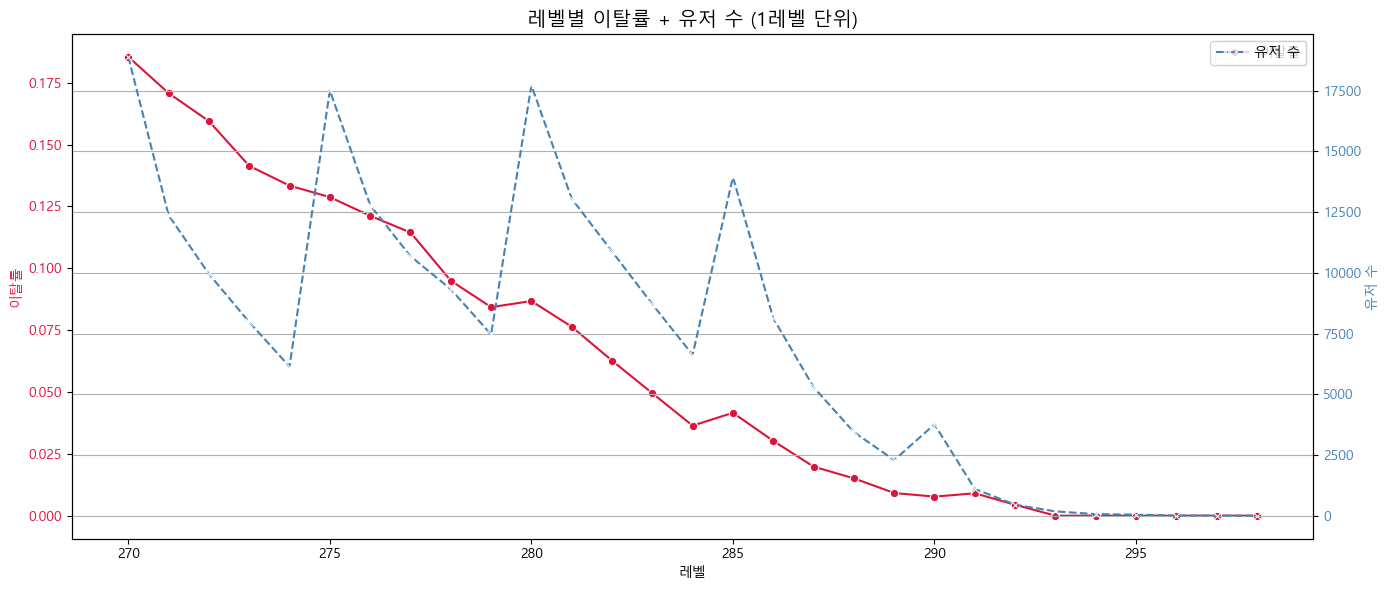

In [27]:
# 레벨별로 이탈률 계산
level_stats = df_filtered.groupby('character_level', observed=True)['event'].agg(['mean', 'count', 'sum']).reset_index()
level_stats.columns = ['레벨', '이탈률', '유저수', '이탈자수']
import matplotlib.pyplot as plt
import seaborn as sns


# 오른쪽 y축에 유저 수 선 추가
fig, ax1 = plt.subplots(figsize=(14, 6))

sns.lineplot(data=level_stats, x='레벨', y='이탈률', ax=ax1, color='crimson', label='이탈률', marker='o')
ax1.set_ylabel("이탈률", color='crimson')
ax1.tick_params(axis='y', labelcolor='crimson')

ax2 = ax1.twinx()
sns.lineplot(data=level_stats, x='레벨', y='유저수', ax=ax2, color='steelblue', label='유저 수', linestyle='--', marker='x')
ax2.set_ylabel("유저 수", color='steelblue')
ax2.tick_params(axis='y', labelcolor='steelblue')

plt.title("레벨별 이탈률 + 유저 수 (1레벨 단위)", fontsize=14)
ax1.set_xlabel("레벨")
plt.grid(True)
plt.tight_layout()
plt.show()
#저레벨 구간(270~275) 이탈율이 가장 높음 (약 17% 수준).레벨이 높아질수록 이탈율은 감소 → 생존한 유저들이 점점 정착하는 구조.특히 285 이상부터는 이탈율이 2~3%로 매우 낮아짐.
#→ 고렙 유저는 이탈 확률이 극히 낮은 코어층임을 알 수 있음.

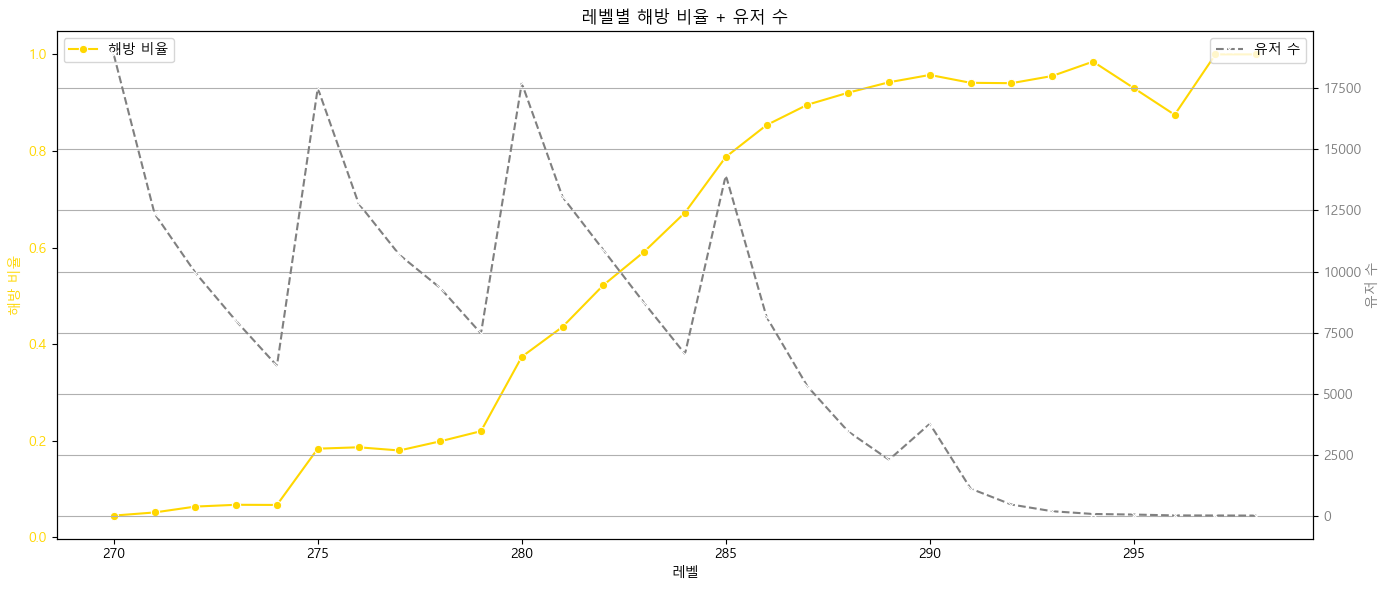

In [29]:
# 해방 비율 + 유저 수 계산
lib_stats = df_filtered.groupby('character_level')['liberation_quest_clear_flag'].agg(['mean', 'count']).reset_index()
lib_stats.columns = ['레벨', '해방비율', '유저수']

# 시각화
fig, ax1 = plt.subplots(figsize=(14, 6))

# 해방 비율 (왼쪽 y축)
sns.lineplot(data=lib_stats, x='레벨', y='해방비율', ax=ax1, marker='o', color='gold', label='해방 비율')
ax1.set_ylabel("해방 비율", color='gold')
ax1.tick_params(axis='y', labelcolor='gold')

# 유저 수 (오른쪽 y축)
ax2 = ax1.twinx()
sns.lineplot(data=lib_stats, x='레벨', y='유저수', ax=ax2, color='gray', linestyle='--', marker='x', label='유저 수')
ax2.set_ylabel("유저 수", color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

plt.title("레벨별 해방 비율 + 유저 수")
plt.grid(True)
plt.tight_layout()
plt.show()
#레벨이 올라가면서 해방률 급격히 증가. 285 레벨 이후 해방률은 90% 이상까지 올라감 285 찍은 유저들은 거의 대부분 해방을 완료했다

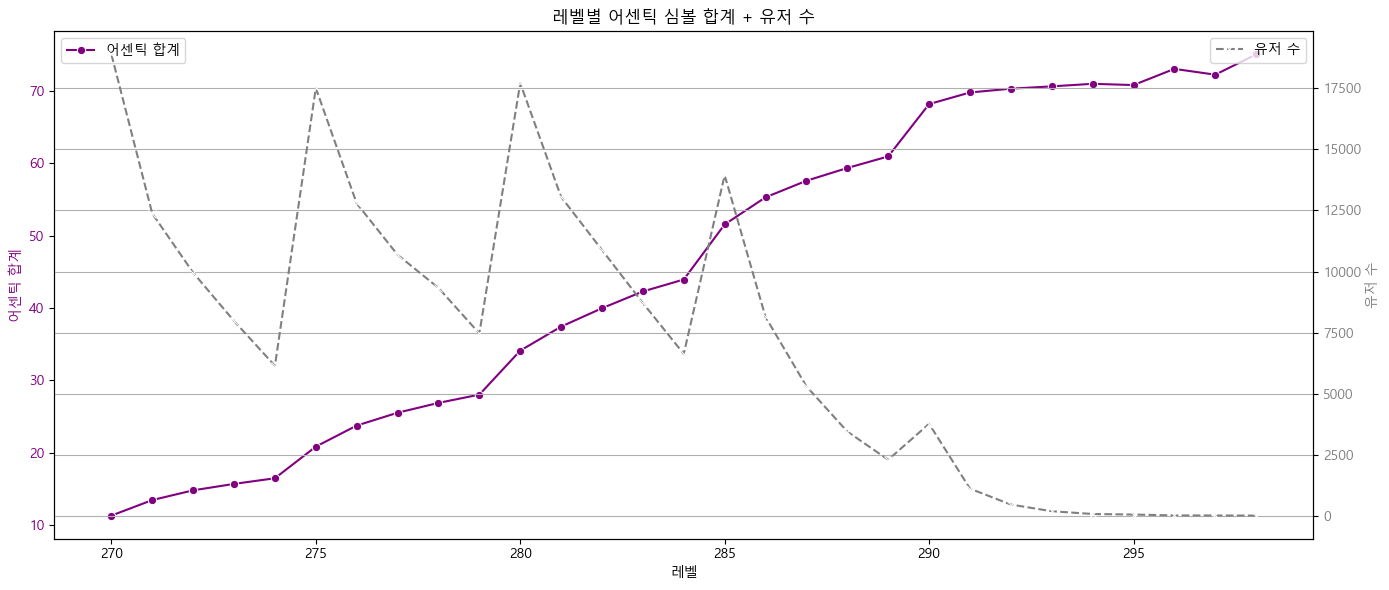

In [31]:
authen_stats = df_filtered.groupby('character_level')['authentic_sum'].agg(['mean', 'count']).reset_index()
authen_stats.columns = ['레벨', '어센틱합계', '유저수']

fig, ax1 = plt.subplots(figsize=(14, 6))

# 어센틱 평균
sns.lineplot(data=authen_stats, x='레벨', y='어센틱합계', ax=ax1, color='purple', marker='o', label='어센틱 합계')
ax1.set_ylabel("어센틱 합계", color='purple')
ax1.tick_params(axis='y', labelcolor='purple')

# 유저 수
ax2 = ax1.twinx()
sns.lineplot(data=authen_stats, x='레벨', y='유저수', ax=ax2, color='gray', linestyle='--', marker='x', label='유저 수')
ax2.set_ylabel("유저 수", color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

plt.title("레벨별 어센틱 심볼 합계 + 유저 수")
plt.grid(True)
plt.tight_layout()
plt.show()
#레벨이 올라갈수록 어센틱 심볼 합계도 자연스럽게 상승.285레벨 이후부터 어센틱 합계가 급격히 증가.어센틱 심볼 강화가 고레벨 성장의 핵심 조건임을 보여줌.

In [32]:
# 무릉 기록이 있는 유저만
df_dojang = df_filtered[df_filtered['dojang_best_floor'] > 0]

# 레벨별 평균 무릉 층수
dojang_stats = df_dojang.groupby('character_level')['dojang_best_floor'].mean().reset_index()


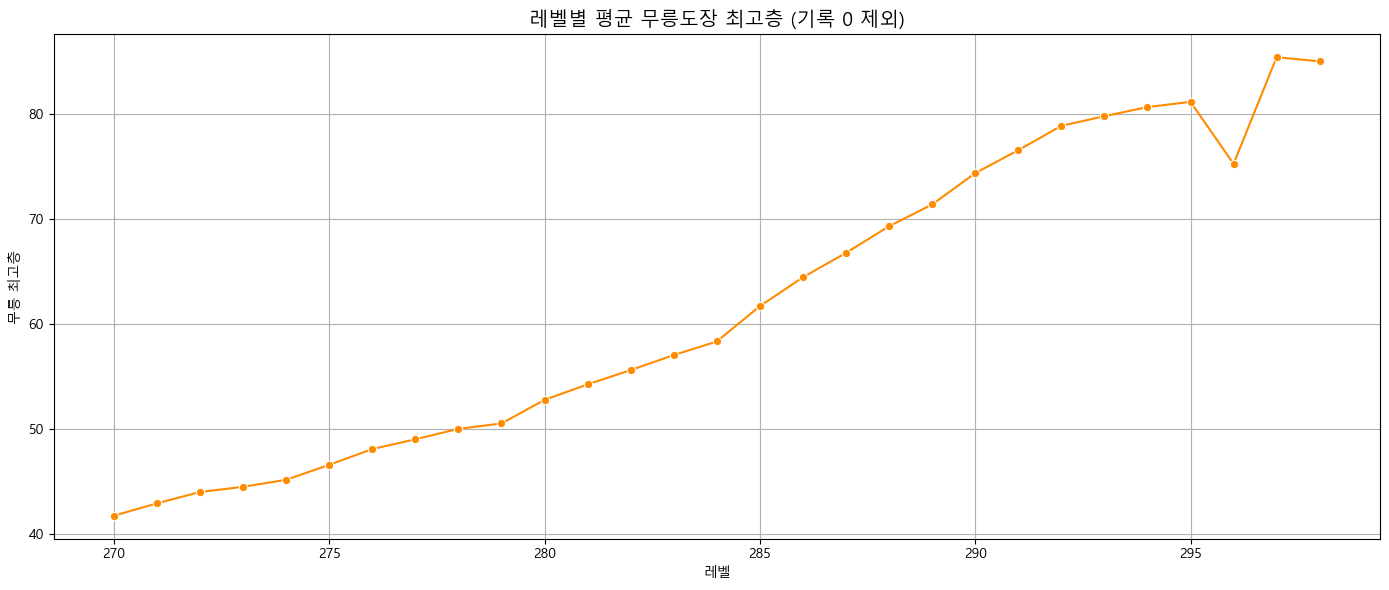

In [33]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=dojang_stats, x='character_level', y='dojang_best_floor', marker='o', color='darkorange')
plt.title("레벨별 평균 무릉도장 최고층 (기록 0 제외)", fontsize=14)
plt.xlabel("레벨")
plt.ylabel("무릉 최고층")
plt.grid(True)
plt.tight_layout()
plt.show()
#레벨이 올라갈수록 무릉도장 최고층수 평균도 상승 (자연스러운 현상).특히 285레벨 이후부터 급격한 상승 ->고레벨 유저들은 전투력과도 직결된 스펙 상승이 나타남.

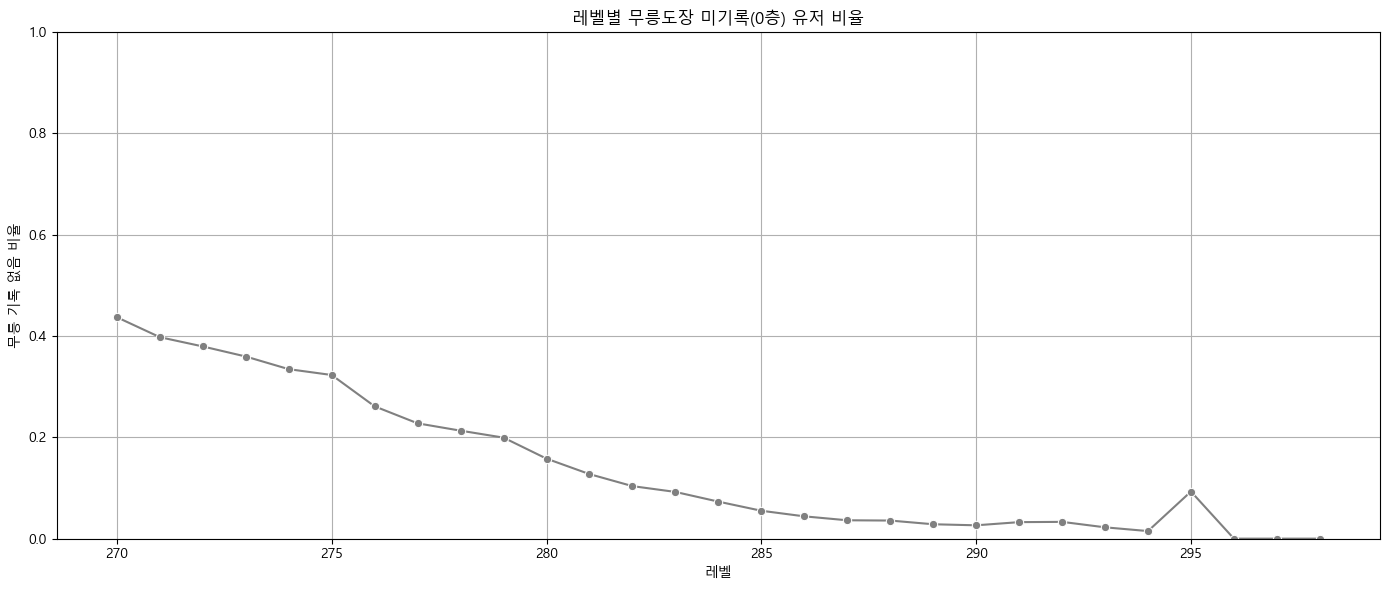

In [36]:
no_dojang_rate = df_filtered.groupby('character_level')['dojang_best_floor'].apply(lambda x: (x == 0).mean())
no_dojang_df = no_dojang_rate.reset_index()
no_dojang_df.columns = ['레벨', '무릉_기록_없음_비율']

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(14, 6))
sns.lineplot(data=no_dojang_df, x='레벨', y='무릉_기록_없음_비율', marker='o', color='gray')
plt.title("레벨별 무릉도장 미기록(0층) 유저 비율")
plt.xlabel("레벨")
plt.ylabel("무릉 기록 없음 비율")
plt.ylim(0, 1)
plt.grid(True)
plt.tight_layout()
plt.show()



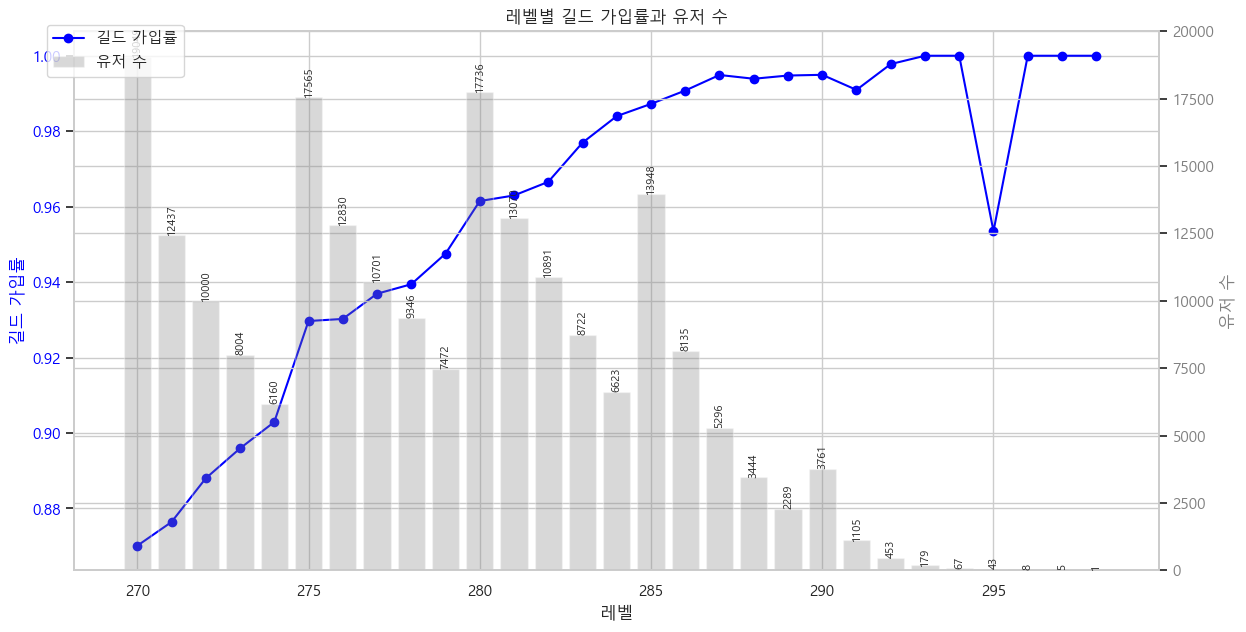

In [13]:
import matplotlib.pyplot as plt

# 길드 가입 여부 컬럼 생성 (df 기준)
df['guild_status'] = df['character_guild_name'].apply(
    lambda x: '미가입' if x == '미가입' else '가입'
)

# 레벨별 유저 수 계산
user_count_by_level = df['character_level'].value_counts().sort_index()

# 레벨별 길드 가입률 계산
guild_rate = (df['guild_status'] == '가입').groupby(df['character_level']).mean()

# 두 개 같이 그리기
fig, ax1 = plt.subplots(figsize=(14,7))

# 첫 번째 y축: 길드 가입률
ax1.plot(guild_rate.index, guild_rate.values, color='blue', marker='o', label='길드 가입률')
ax1.set_xlabel('레벨')
ax1.set_ylabel('길드 가입률', color='blue')
ax1.tick_params(axis='y', labelcolor='blue')

# 두 번째 y축: 유저 수
ax2 = ax1.twinx()
bars = ax2.bar(user_count_by_level.index, user_count_by_level.values, color='gray', alpha=0.3, label='유저 수')
ax2.set_ylabel('유저 수', color='gray')
ax2.tick_params(axis='y', labelcolor='gray')

# 🔥 막대 위에 유저 수 표시 추가
for bar in bars:
    height = bar.get_height()
    if height > 0:  # 높이 0인 경우는 생략
        ax2.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{int(height)}',  # 정수로 표시
            ha='center', va='bottom', fontsize=8, rotation=90  # 글자 크기, 방향
        )

# 제목
plt.title('레벨별 길드 가입률과 유저 수')

# 범례
fig.legend(loc="upper left", bbox_to_anchor=(0.1,0.9))

plt.grid(True)
plt.show()
#레벨이 높아질수록 길드 가입률은 증가 (270 기준 87% → 295 이상 99% 이상). 고레벨 유저는 거의 무조건 길드 소속.→ 고레벨 성장에는 길드 버프, 길드 코어 혜택 같은 지원이 중요함.

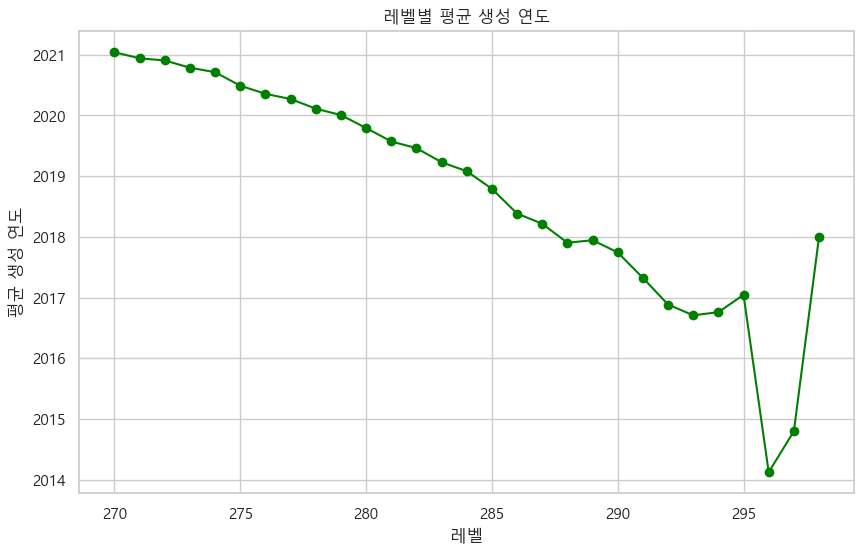

In [16]:
# 생성일을 datetime 타입으로 변환
df['character_date_create'] = pd.to_datetime(df['character_date_create'], errors='coerce')

# 생성 연도 추출
df['create_year'] = df['character_date_create'].dt.year

# 레벨별 평균 생성 연도 계산
create_year_by_level = df.groupby('character_level')['create_year'].mean()

# 시각화
plt.figure(figsize=(10,6))
plt.plot(create_year_by_level.index, create_year_by_level.values, marker='o', color='green')
plt.title('레벨별 평균 생성 연도')
plt.xlabel('레벨')
plt.ylabel('평균 생성 연도')
plt.grid(True)
plt.show()
#신규 유저들은 고레벨 진입 자체가 힘든 구조.

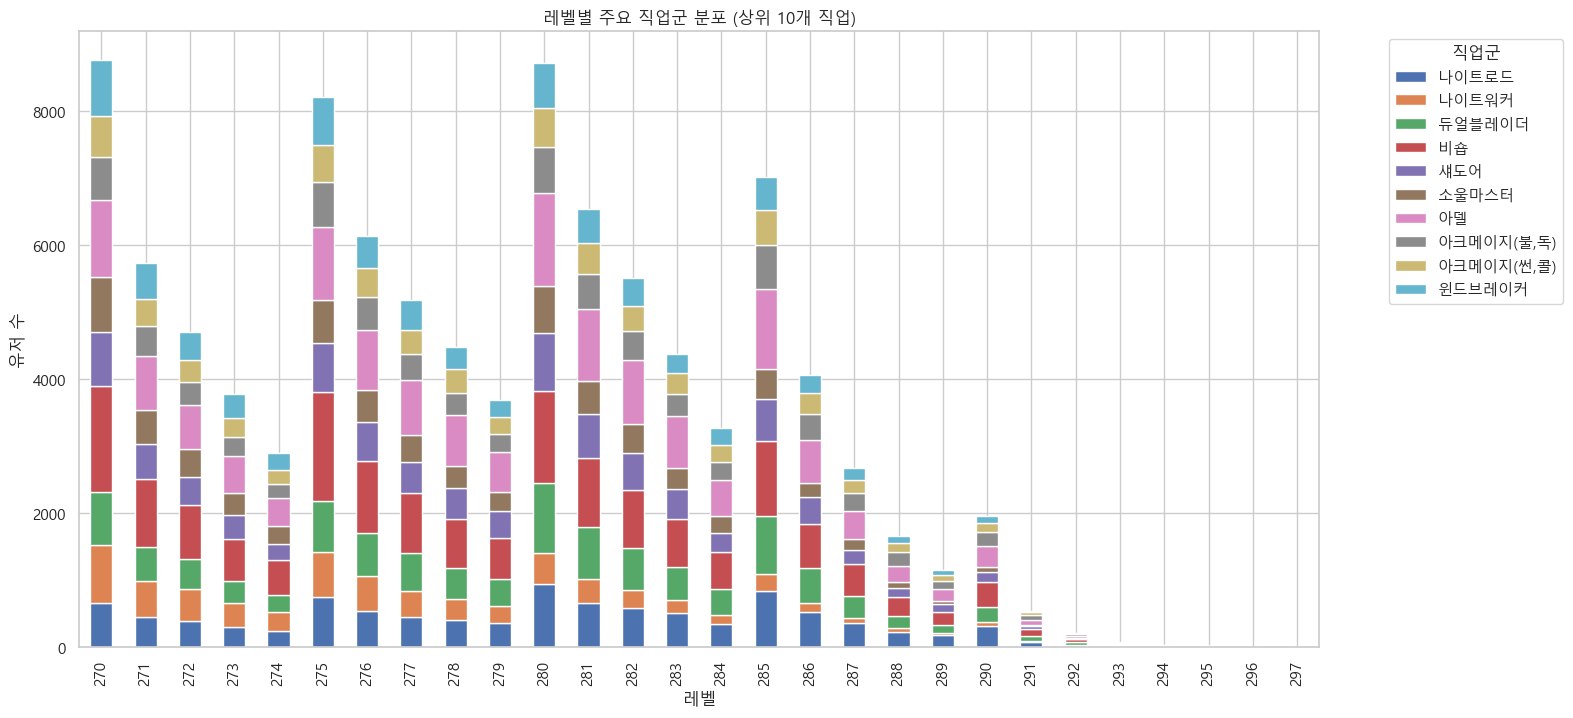

In [17]:
# 상위 10개 직업군만 보기
top_classes = df['character_class'].value_counts().head(10).index

# top 직업군 필터링
df_top_class = df[df['character_class'].isin(top_classes)]

# 피벗 테이블 생성: 레벨별 직업군별 유저 수
pivot_class_level = df_top_class.pivot_table(index='character_level', columns='character_class', aggfunc='size', fill_value=0)

# 시각화 (스택 바 차트)
pivot_class_level.plot(kind='bar', stacked=True, figsize=(16,8))
plt.title('레벨별 주요 직업군 분포 (상위 10개 직업)')
plt.xlabel('레벨')
plt.ylabel('유저 수')
plt.legend(title='직업군', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()
#

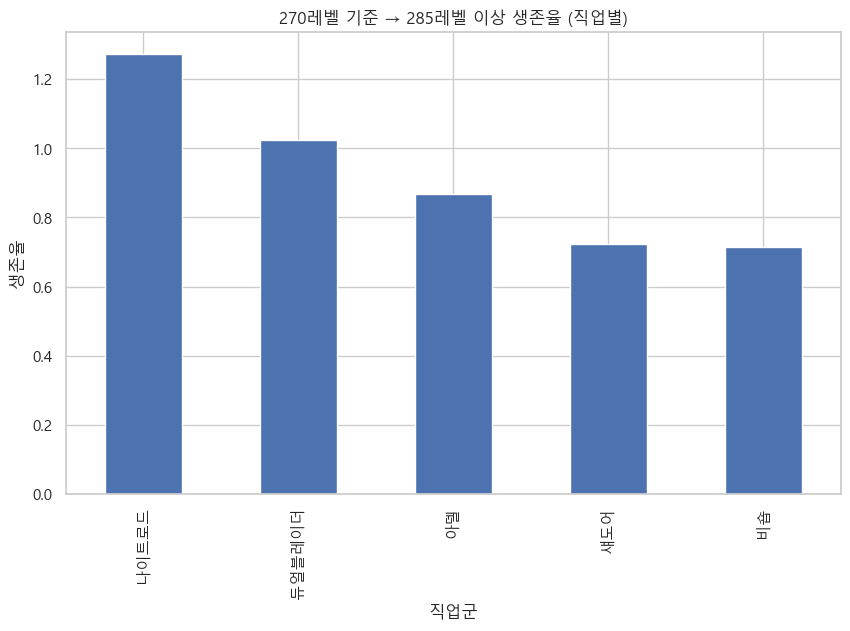

In [20]:
# 1. 레벨 그룹 생성
def level_group(level):
    return (level // 5) * 5
df['level_group'] = df['character_level'].apply(level_group)

# 2. Top 직업군만 필터링
top_classes = df['character_class'].value_counts().head(5).index
df_top = df[df['character_class'].isin(top_classes)]

# 3. 270레벨 기준 인원
base_270 = df_top[df_top['level_group'] == 270]['character_class'].value_counts()

# 4. 285레벨 이상 인원
above_285 = df_top[df_top['character_level'] >= 285]['character_class'].value_counts()

# 5. 생존율 계산
survival_rate = (above_285 / base_270).fillna(0)

# 6. 결과 시각화
survival_rate.sort_values(ascending=False).plot(kind='bar', figsize=(10,6))
plt.title('270레벨 기준 → 285레벨 이상 생존율 (직업별)')
plt.ylabel('생존율')
plt.xlabel('직업군')
plt.grid(True)
plt.show()


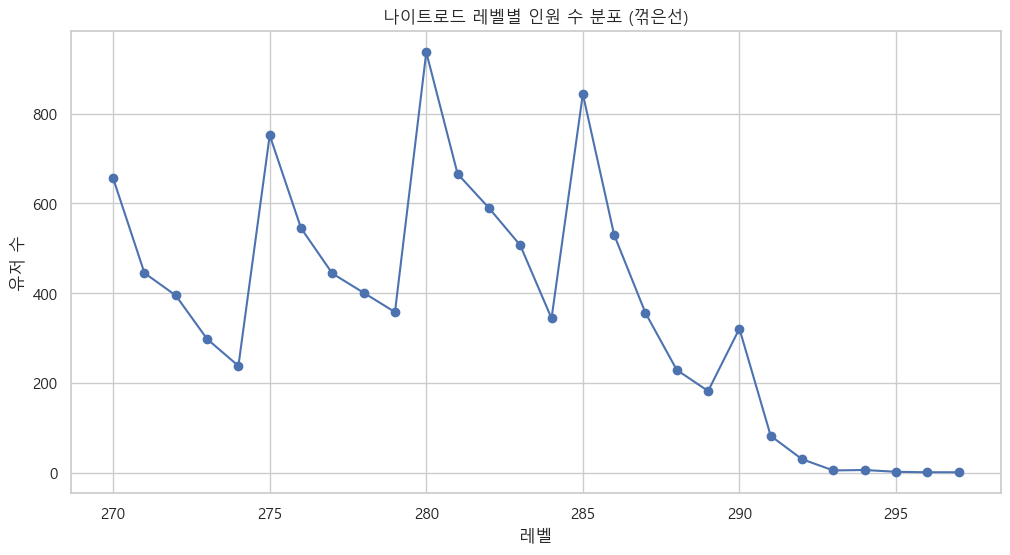

In [22]:
import matplotlib.pyplot as plt

# 나이트로드 필터링
df_nightlord = df[df['character_class'] == '나이트로드']

# 레벨별 유저 수 세기
nightlord_level_count = df_nightlord['character_level'].value_counts().sort_index()

# 꺾은선 그래프 그리기
plt.figure(figsize=(12,6))
plt.plot(nightlord_level_count.index, nightlord_level_count.values, marker='o', linestyle='-')
plt.title('나이트로드 레벨별 인원 수 분포 (꺾은선)')
plt.xlabel('레벨')
plt.ylabel('유저 수')
plt.grid(True)
plt.show()


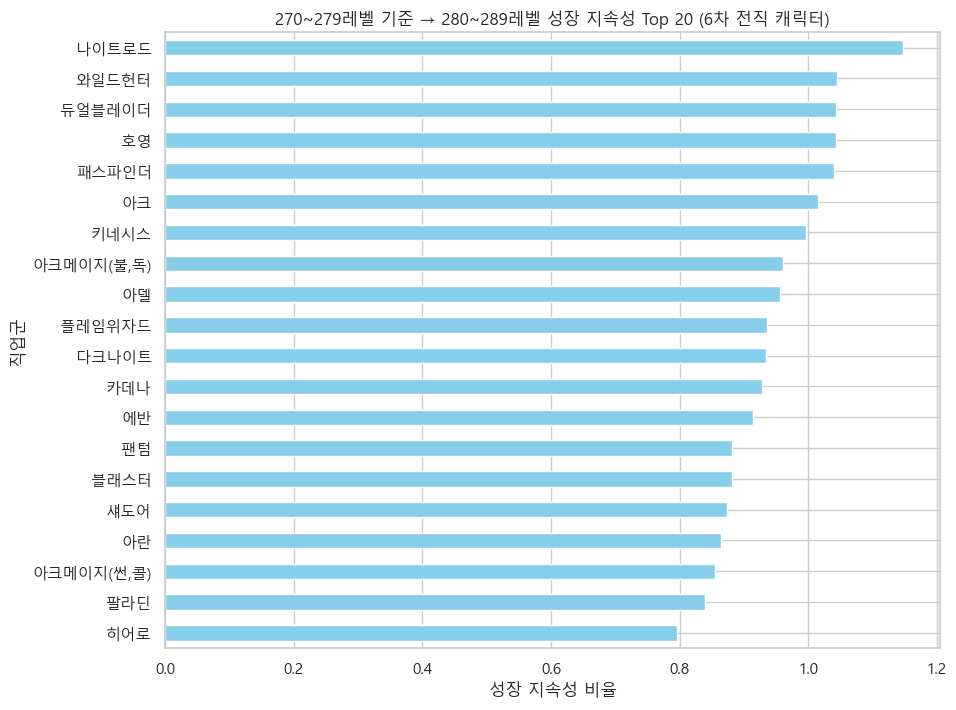

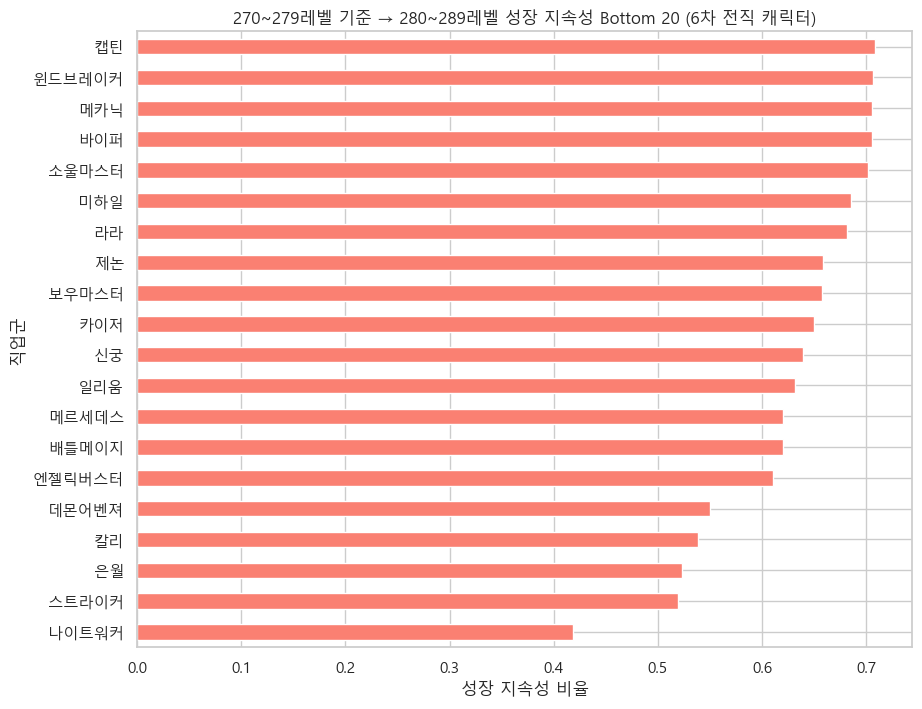

In [5]:
import matplotlib.pyplot as plt

# 6차 전직 캐릭터만 필터링
filtered_df = df[df["character_class_level"] == 6]

# 직업별 270~279레벨 기준 인원수
base_270_279 = filtered_df[(filtered_df['character_level'] >= 270) & (filtered_df['character_level'] <= 279)]['character_class'].value_counts()

# 직업별 280~289레벨 목표 인원수
above_280_289 = filtered_df[(filtered_df['character_level'] >= 280) & (filtered_df['character_level'] <= 289)]['character_class'].value_counts()

# 성장 지속성 비율 계산 (fillna(0)로 0 처리)
growth_continuity_rate = (above_280_289 / base_270_279).fillna(0)

# 정렬
growth_continuity_rate_sorted = growth_continuity_rate.sort_values(ascending=False)

# Top 20
top20 = growth_continuity_rate_sorted.head(20)

plt.figure(figsize=(10,8))
top20.plot(kind='barh', color='skyblue')
plt.title('270~279레벨 기준 → 280~289레벨 성장 지속성 Top 20 (6차 전직 캐릭터)')
plt.xlabel('성장 지속성 비율')
plt.ylabel('직업군')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

# Bottom 20
bottom20 = growth_continuity_rate_sorted.tail(20)

plt.figure(figsize=(10,8))
bottom20.plot(kind='barh', color='salmon')
plt.title('270~279레벨 기준 → 280~289레벨 성장 지속성 Bottom 20 (6차 전직 캐릭터)')
plt.xlabel('성장 지속성 비율')
plt.ylabel('직업군')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()


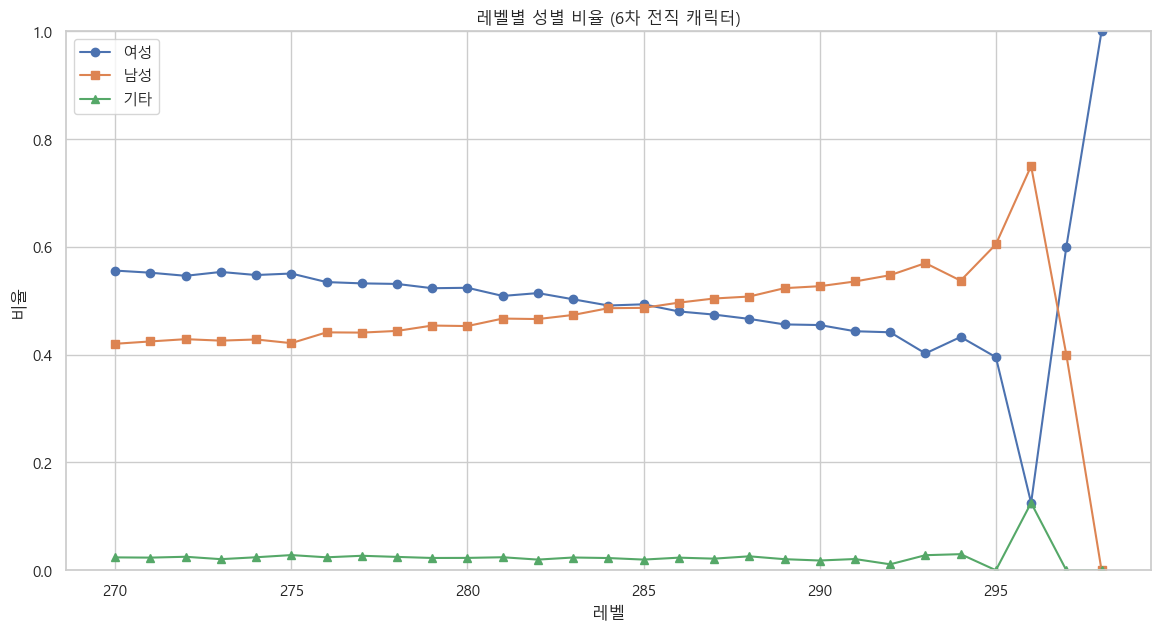

In [34]:
import matplotlib.pyplot as plt

# 6차 전직 캐릭터만 필터링
filtered_df = df[df['character_class_level'] == 6]

# 전체 유저 수 (레벨별)
total_by_level = filtered_df['character_level'].value_counts().sort_index()

# 여성 유저 수
female_by_level = filtered_df[filtered_df['character_gender'] == '여']['character_level'].value_counts().sort_index()

# 남성 유저 수
male_by_level = filtered_df[filtered_df['character_gender'] == '남']['character_level'].value_counts().sort_index()

# 기타 유저 수
other_by_level = filtered_df[filtered_df['character_gender'] == '기타']['character_level'].value_counts().sort_index()

# 비율 계산
female_ratio = (female_by_level / total_by_level).fillna(0)
male_ratio = (male_by_level / total_by_level).fillna(0)
other_ratio = (other_by_level / total_by_level).fillna(0)

# 꺾은선 그래프 그리기
plt.figure(figsize=(14,7))
plt.plot(female_ratio.index, female_ratio.values, marker='o', label='여성')
plt.plot(male_ratio.index, male_ratio.values, marker='s', label='남성')
plt.plot(other_ratio.index, other_ratio.values, marker='^', label='기타')
plt.title('레벨별 성별 비율 (6차 전직 캐릭터)')
plt.xlabel('레벨')
plt.ylabel('비율')
plt.grid(True)
plt.legend()
plt.ylim(0, 1)  # 전체 비율 0~100%
plt.show()
#저레벨에서는 여성 유저 비율이 더 높음 (여 55% vs 남 43%).그러나 고레벨(285 이상)로 갈수록 남성 비율이 급상승.

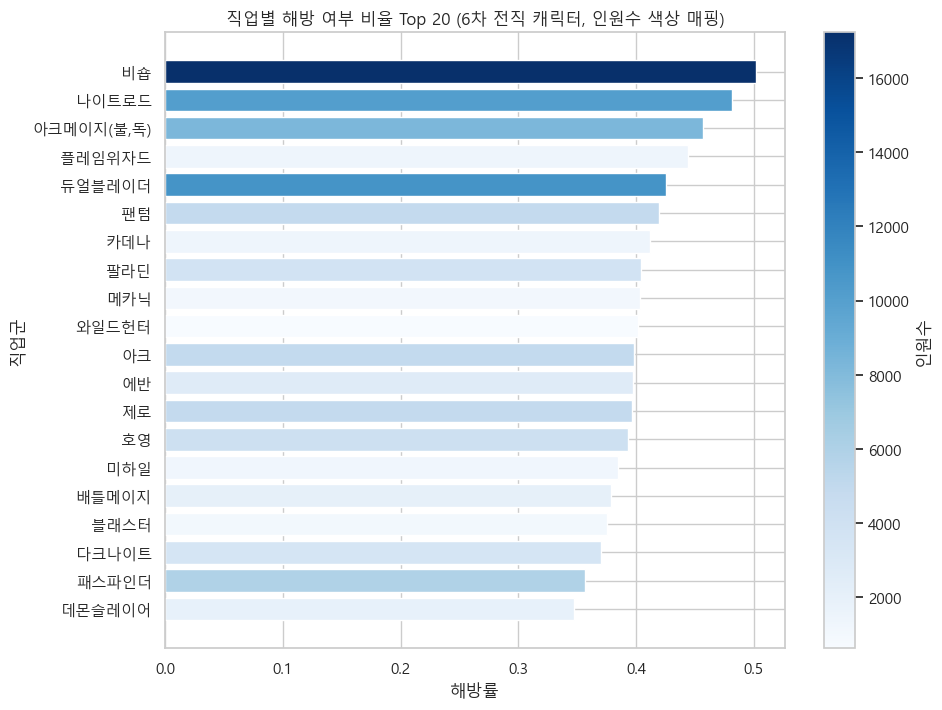

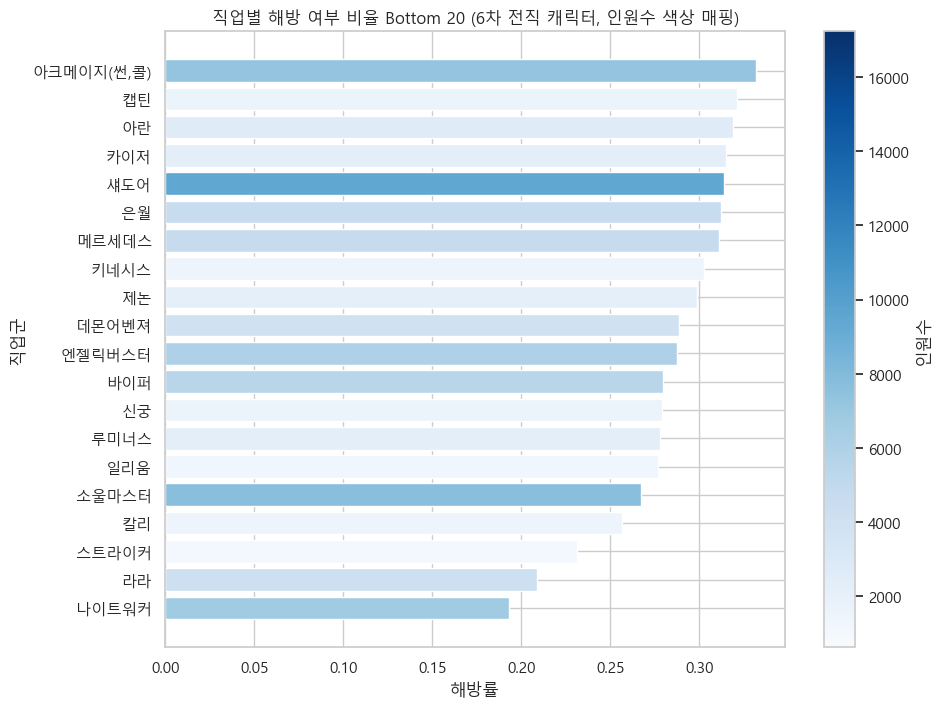

In [11]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# 6차 전직 캐릭터만 필터링
filtered_df = df[df['character_class_level'] == 6]

# 직업별 해방률(mean)과 인원수(count) 둘 다 계산
liberation_rate = filtered_df.groupby('character_class')['liberation_quest_clear_flag'].mean()
liberation_count = filtered_df.groupby('character_class')['liberation_quest_clear_flag'].count()

# 해방률 높은 순, 낮은 순 따로 정렬
liberation_rate_sorted = liberation_rate.sort_values(ascending=False)
liberation_count_sorted = liberation_count[liberation_rate_sorted.index]

# Normalize 인원수 (색깔용)
norm = colors.Normalize(vmin=liberation_count_sorted.min(), vmax=liberation_count_sorted.max())
cmap = cm.Blues
mapped_colors = cmap(norm(liberation_count_sorted))

# Top 20
top20_idx = liberation_rate_sorted.head(20).index
top20_rate = liberation_rate_sorted.loc[top20_idx]
top20_colors = mapped_colors[:20]

fig, ax = plt.subplots(figsize=(10,8))
bars = ax.barh(top20_idx, top20_rate, color=top20_colors)
ax.set_title('직업별 해방 여부 비율 Top 20 (6차 전직 캐릭터, 인원수 색상 매핑)')
ax.set_xlabel('해방률')
ax.set_ylabel('직업군')
ax.invert_yaxis()
ax.grid(True)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='인원수')
plt.show()

# Bottom 20
bottom20_idx = liberation_rate_sorted.tail(20).index
bottom20_rate = liberation_rate_sorted.loc[bottom20_idx]
bottom20_colors = mapped_colors[-20:]

fig, ax = plt.subplots(figsize=(10,8))
bars = ax.barh(bottom20_idx, bottom20_rate, color=bottom20_colors)
ax.set_title('직업별 해방 여부 비율 Bottom 20 (6차 전직 캐릭터, 인원수 색상 매핑)')
ax.set_xlabel('해방률')
ax.set_ylabel('직업군')
ax.invert_yaxis()
ax.grid(True)
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='인원수')
plt.show()
#비숍, 나이트로드 해방 비율 높음. 라라 스커 나워등은 해방 비율 낮음 

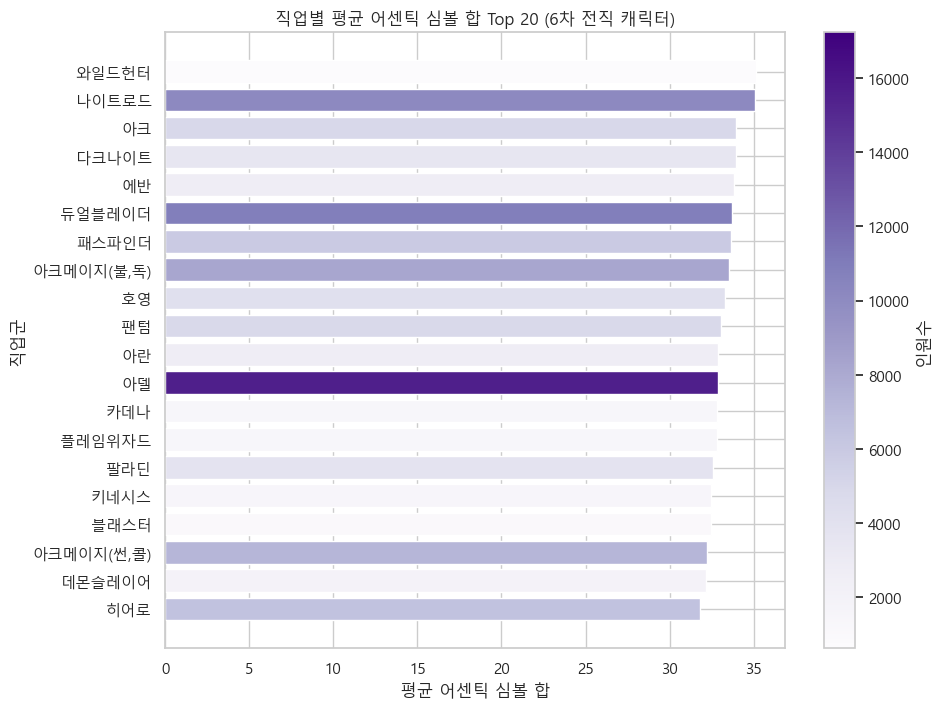

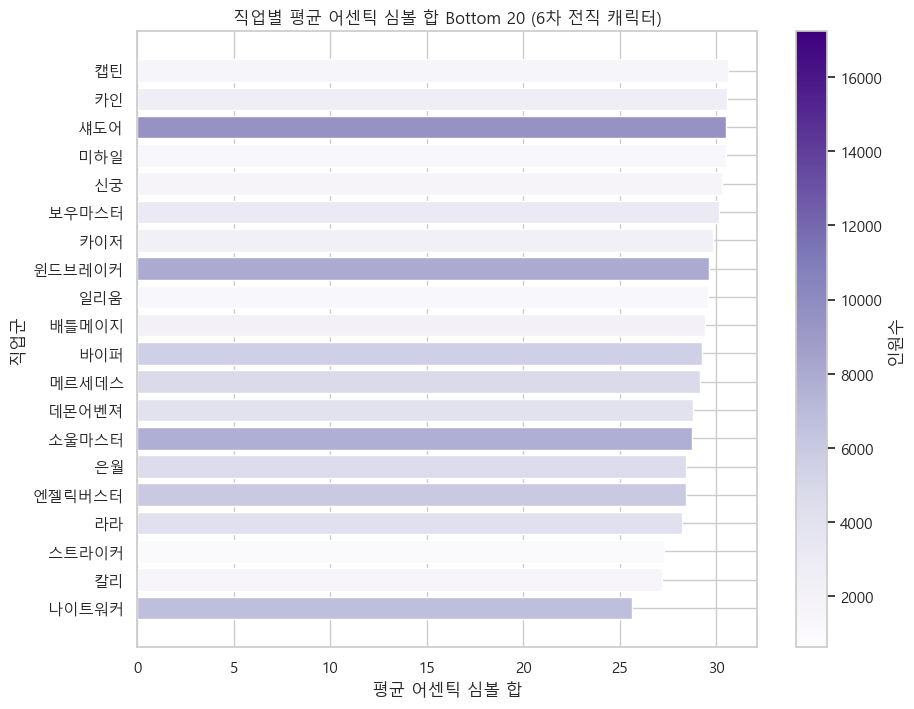

In [13]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors

# 6차 전직 캐릭터만 필터링
filtered_df = df[df['character_class_level'] == 6]

# 직업별 어센틱 심볼 평균과 인원수 계산
authentic_mean = filtered_df.groupby('character_class')['authentic_sum'].mean()
authentic_count = filtered_df.groupby('character_class')['authentic_sum'].count()

# 어센틱 심볼 평균 높은 순 정렬
authentic_mean_sorted = authentic_mean.sort_values(ascending=False)
authentic_count_sorted = authentic_count[authentic_mean_sorted.index]

# Normalize 인원수 (색깔용)
norm = colors.Normalize(vmin=authentic_count_sorted.min(), vmax=authentic_count_sorted.max())
cmap = cm.Purples  # 보라색 컬러맵 사용 (심볼 느낌)
mapped_colors = cmap(norm(authentic_count_sorted))

# Top20 추출
top20_idx = authentic_mean_sorted.head(20).index
top20_mean = authentic_mean_sorted.loc[top20_idx]
top20_colors = mapped_colors[:20]

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10,8))
bars = ax.barh(top20_idx, top20_mean, color=top20_colors)
ax.set_title('직업별 평균 어센틱 심볼 합 Top 20 (6차 전직 캐릭터)')
ax.set_xlabel('평균 어센틱 심볼 합')
ax.set_ylabel('직업군')
ax.invert_yaxis()
ax.grid(True)

# Colorbar 추가
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='인원수')

plt.show()
# Bottom 20 추출
bottom20_idx = authentic_mean_sorted.tail(20).index
bottom20_mean = authentic_mean_sorted.loc[bottom20_idx]
bottom20_colors = mapped_colors[-20:]  # 색깔도 순서 맞춰줌

# 그래프 그리기
fig, ax = plt.subplots(figsize=(10,8))
bars = ax.barh(bottom20_idx, bottom20_mean, color=bottom20_colors)
ax.set_title('직업별 평균 어센틱 심볼 합 Bottom 20 (6차 전직 캐릭터)')
ax.set_xlabel('평균 어센틱 심볼 합')
ax.set_ylabel('직업군')
ax.invert_yaxis()
ax.grid(True)

# Colorbar 추가
sm = cm.ScalarMappable(cmap=cmap, norm=norm)
sm.set_array([])
fig.colorbar(sm, ax=ax, label='인원수')

plt.show()

#와헌 나로 아크 는 어센틱 심볼 합 평균이 높고  ,  나워 스커,칼리는 합평균이 낮음 


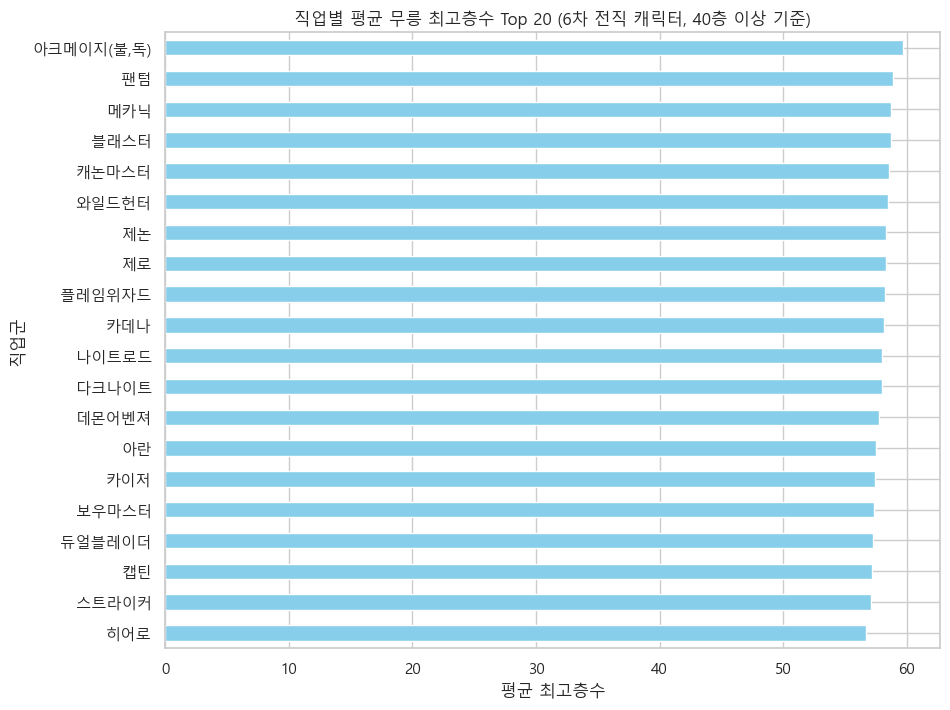

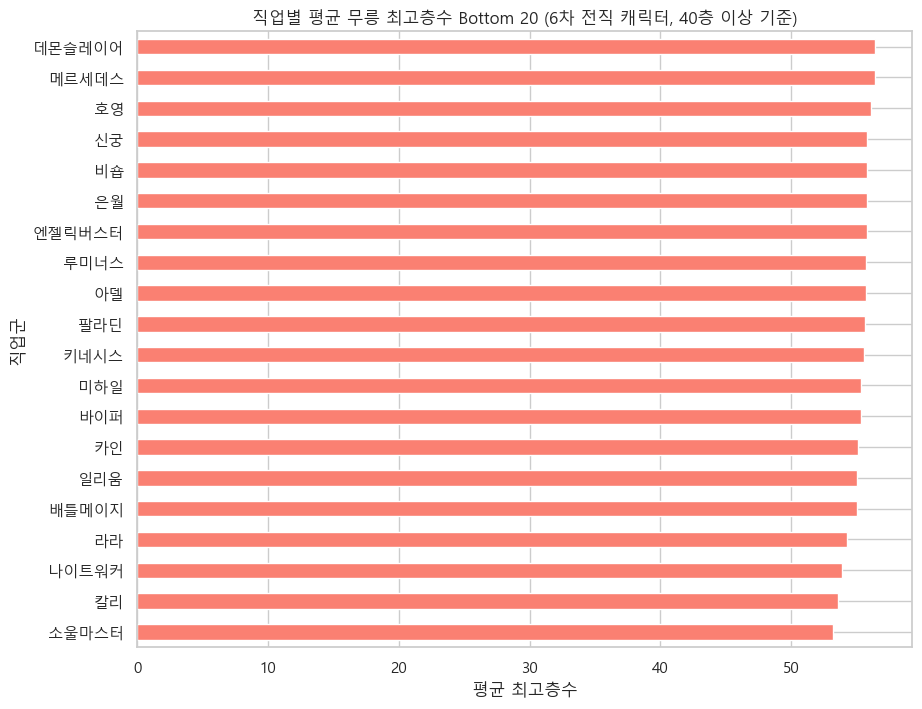

In [9]:
# 6차 전직 캐릭터만 필터링
filtered_df = df[df["character_class_level"] == 6]

# 무릉 40층 이상만 필터링
filtered_df = filtered_df[filtered_df['dojang_best_floor'] >= 40]

# 1. 직업별 무릉 최고층수 평균 계산
dojang_mean = filtered_df.groupby('character_class')['dojang_best_floor'].mean()

# 2. 정렬
dojang_mean_sorted = dojang_mean.sort_values(ascending=False)

# 3. Top20
top20 = dojang_mean_sorted.head(20)

plt.figure(figsize=(10,8))
top20.plot(kind='barh', color='skyblue')
plt.title('직업별 평균 무릉 최고층수 Top 20 (6차 전직 캐릭터, 40층 이상 기준)')
plt.xlabel('평균 최고층수')
plt.ylabel('직업군')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

# 4. Bottom20
bottom20 = dojang_mean_sorted.tail(20)

plt.figure(figsize=(10,8))
bottom20.plot(kind='barh', color='salmon')
plt.title('직업별 평균 무릉 최고층수 Bottom 20 (6차 전직 캐릭터, 40층 이상 기준)')
plt.xlabel('평균 최고층수')
plt.ylabel('직업군')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()
#특정 직업군이 무릉에서 강세 (평딜직업 ) 

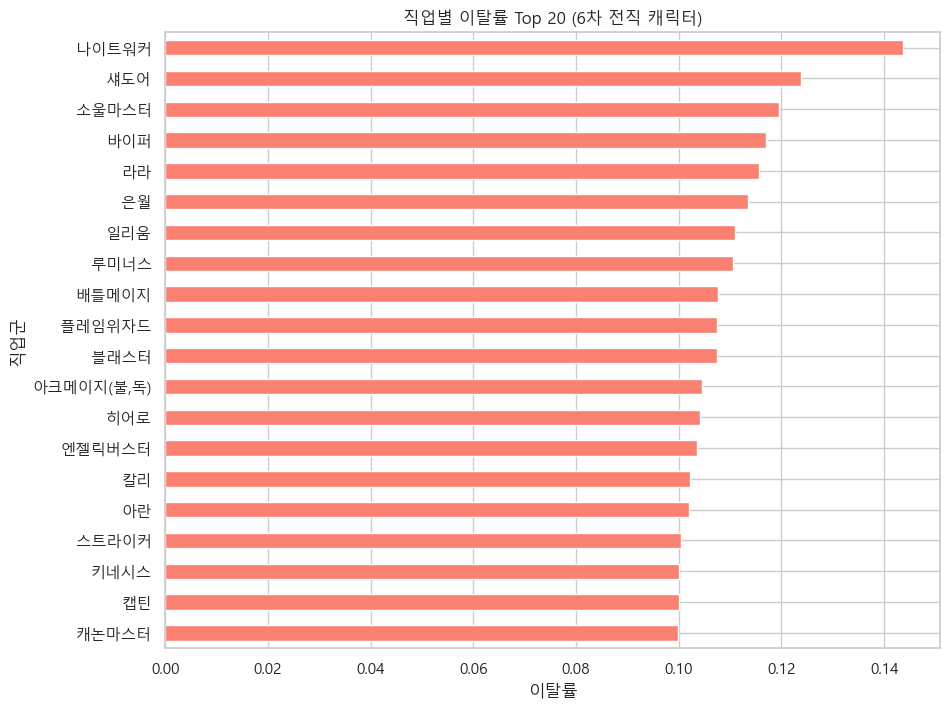

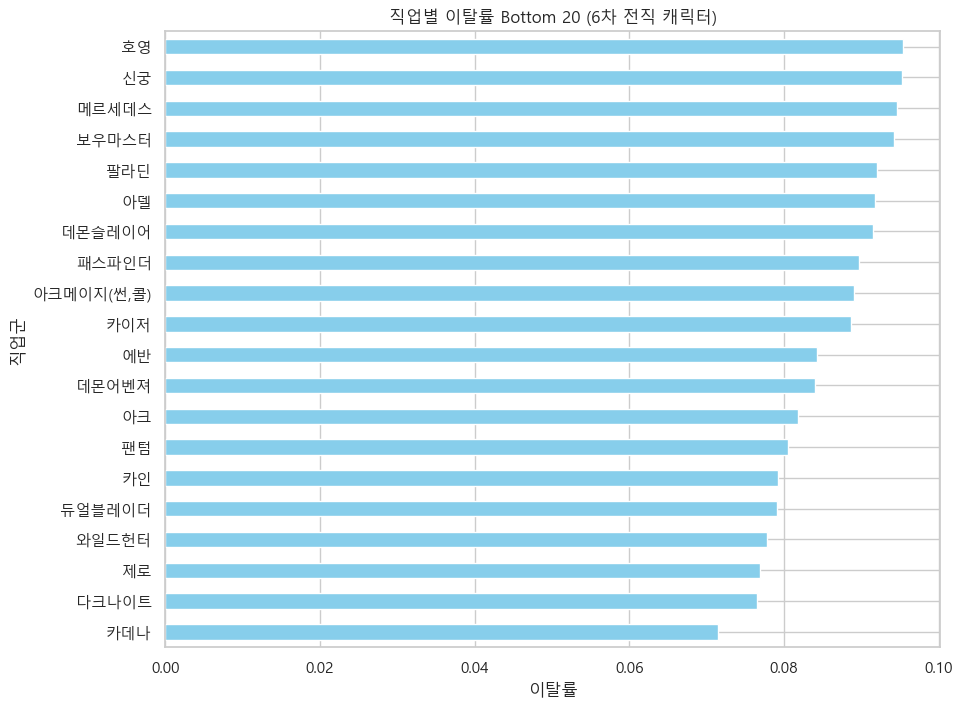

In [7]:
import matplotlib.pyplot as plt

# 6차 전직 캐릭터만 필터링
filtered_df = df[df['character_class_level'] == 6]

# 직업별 이탈률(event 평균) 계산
event_mean = filtered_df.groupby('character_class')['event'].mean()

# 정렬
event_mean_sorted = event_mean.sort_values(ascending=False)

# Top 20 (이탈률 높은 직업)
top20 = event_mean_sorted.head(20)

plt.figure(figsize=(10,8))
top20.plot(kind='barh', color='salmon')
plt.title('직업별 이탈률 Top 20 (6차 전직 캐릭터)')
plt.xlabel('이탈률')
plt.ylabel('직업군')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()

# Bottom 20 (이탈률 낮은 직업)
bottom20 = event_mean_sorted.tail(20)

plt.figure(figsize=(10,8))
bottom20.plot(kind='barh', color='skyblue')
plt.title('직업별 이탈률 Bottom 20 (6차 전직 캐릭터)')
plt.xlabel('이탈률')
plt.ylabel('직업군')
plt.grid(True)
plt.gca().invert_yaxis()
plt.show()
# 나워, 섀도어, 소울마스터 이탈률 높음. 반면 제로 닼나, 카데나 이탈율 낮음 

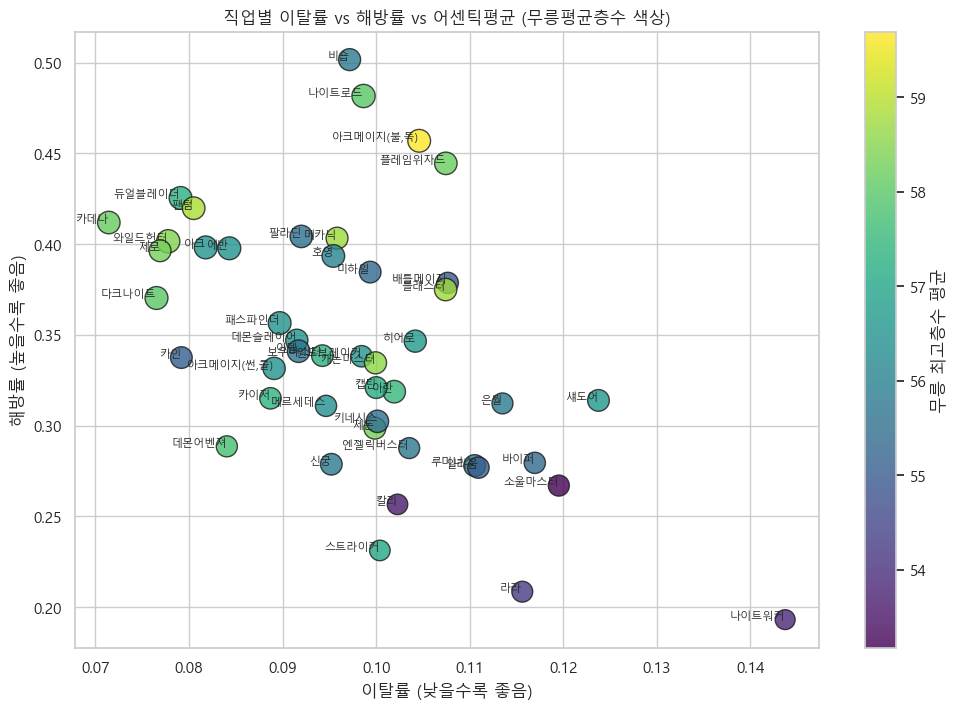

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# ✅ 직업별 데이터 준비
# survival_rate, liberation_rate, dojang_mean, event_mean은 이미 있다고 가정

# authentic_sum_mean 직접 계산 추가 (요거 새로 추가해야 함)
authentic_sum_mean = filtered_df.groupby('character_class')['authentic_sum'].mean()

# 1. 데이터 통합
merged_df = pd.DataFrame({
    '이탈률': event_mean,
    '해방률': liberation_rate,
    '어센틱평균': authentic_sum_mean,
    '무릉평균층수': dojang_mean
}).dropna()

# 2. Scatter Plot 그리기
plt.figure(figsize=(12,8))
scatter = plt.scatter(
    merged_df['이탈률'],
    merged_df['해방률'],
    s=merged_df['어센틱평균'] * 8,   # 점 크기: 어센틱합 평균
    c=merged_df['무릉평균층수'],      # 색상: 무릉평균
    cmap='viridis',
    alpha=0.8,
    edgecolors='k'
)

plt.title('직업별 이탈률 vs 해방률 vs 어센틱평균 (무릉평균층수 색상)')
plt.xlabel('이탈률 (낮을수록 좋음)')
plt.ylabel('해방률 (높을수록 좋음)')
plt.colorbar(scatter, label='무릉 최고층수 평균')
plt.grid(True)

# 3. 직업 이름 찍기
for idx, row in merged_df.iterrows():
    plt.text(row['이탈률'], row['해방률'], idx, fontsize=8, ha='right')

plt.show()


In [ ]:
#레벨별 이탈율 차이	카이제곱 독립성 검정 (Chi-Square Test)	"레벨 구간별로 이탈율이 통계적으로 다른가?" 검정
#직업별 해방률 차이	카이제곱 독립성 검정	"직업마다 해방 성공률 차이가 유의한가?" 검정
#직업별 생존율 차이	카이제곱 독립성 검정	"직업군별 생존 성공 비율이 차이나는가?"
#성별에 따른 생존율 차이	카이제곱 독립성 검정	"성별(남/여/기타)에 따라 생존율이 통계적으로 다른가?"
#월드(서버)별 이탈율 차이	카이제곱 독립성 검정	"서버별로 이탈율에 차이가 있는가?"
#생존기간 평균 비교 (레벨 그룹별)	ANOVA (분산분석)	"270274 vs 275279 vs 280~284 구간 생존기간 평균 차이"
#어센틱 심볼 점수 평균 비교 (레벨 그룹별)	ANOVA (분산분석)	"레벨 구간별로 심볼 강화 속도에 차이가 있는가?"
#고레벨 유저 성별 분포 차이	카이제곱 독립성 검정	"고레벨(285 이상) 유저 성별 비율이 다른가?" 

In [46]:
# 6차 전직 이상 직업만 필터링
filtered_df = df[df["character_class_level"] == 6]

# 직업군별 표본 수 확인
class_counts = filtered_df['character_class'].value_counts()

# 5000명 이상 직업군
large_class = class_counts[class_counts >= 5000].index

# 5000명 미만 직업군
small_class = class_counts[class_counts < 5000].index


In [47]:
import pandas as pd
import scipy.stats as stats

# 5000명 이상 직업군 필터링
filtered_large_class_df = filtered_df[filtered_df['character_class'].isin(large_class)]

# 카이제곱 검정: 직업군별 이탈율 차이
contingency_table = pd.crosstab(filtered_large_class_df['character_class'], filtered_large_class_df['event'])

# 카이제곱 검정
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# p-value 확인
print(f'Chi2 값: {chi2}')
print(f'p-value: {p_value}')

# 유의미한 차이가 있는지 확인
if p_value < 0.05:
    print("5000명 이상 직업군에 따라 이탈율 차이가 유의미하게 다릅니다.")
else:
    print("5000명 이상 직업군에 따른 이탈율 차이는 유의미하지 않습니다.")


Chi2 값: 326.26056626627513
p-value: 7.549862513431131e-62
5000명 이상 직업군에 따라 이탈율 차이가 유의미하게 다릅니다.


In [49]:
import numpy as np

# Cramér's V 계산 함수
def cramers_v(chi2, n, r, c):
    return np.sqrt(chi2 / (n * min(r - 1, c - 1)))

# 카이제곱 검정 결과 (예시)
contingency_table = pd.crosstab(filtered_df['character_class'], filtered_df['event'])
chi2, p_value, dof, expected = stats.chi2_contingency(contingency_table)

# Cramér's V 계산
n = contingency_table.sum().sum()  # 전체 샘플 수
r, c = contingency_table.shape  # 행, 열의 수
cramers_v_value = cramers_v(chi2, n, r, c)

# 결과 출력
print(f"Cramér's V: {cramers_v_value}")

# 해석
if cramers_v_value < 0.1:
    print("약한 관계")
elif cramers_v_value < 0.3:
    print("중간 정도의 관계")
else:
    print("강한 관계")


Cramér's V: 0.04984855203492614
약한 관계


In [48]:
# 5000명 미만 직업군 필터링
filtered_small_class_df = filtered_df[filtered_df['character_class'].isin(small_class)]

# Fisher's Exact Test: 직업군별 해방 여부 (예시로 해방 여부 분석)
contingency_table_fisher = pd.crosstab(filtered_small_class_df['character_class'], filtered_small_class_df['liberation_quest_clear_flag'])

# Fisher's Exact Test 수행
oddsratio, p_value_fisher = stats.fisher_exact(contingency_table_fisher)

# p-value 확인
print(f'Fisher’s Exact Test p-value: {p_value_fisher}')

# 유의미한 차이가 있는지 확인
if p_value_fisher < 0.05:
    print("5000명 미만 직업군에 따라 해방률 차이가 유의미하게 다릅니다.")
else:
    print("5000명 미만 직업군에 따른 해방률 차이는 유의미하지 않습니다.")


Fisher’s Exact Test p-value: 0.0001
5000명 미만 직업군에 따라 해방률 차이가 유의미하게 다릅니다.


In [21]:
import pandas as pd
from scipy.stats import chi2_contingency, f_oneway

# ✅ 1. 전처리: 280레벨 도달 여부 컬럼 생성
filtered_df['level_280_flag'] = filtered_df['character_level'].apply(lambda x: 1 if x >= 280 else 0)

# ✅ 2. 가설 1: 직업군 × 이탈여부(event) 카이제곱 검정
table_1 = pd.crosstab(filtered_df['character_class'], filtered_df['event'])  # 'event' 컬럼 사용
chi2_1, p_1, dof_1, expected_1 = chi2_contingency(table_1)
print("가설 1 (직업군별 이탈여부 분포 차이)")
print(f"Chi2: {chi2_1:.4f}, p-value: {p_1:.4f}\n")

# ✅ 3. 가설 2: 직업군 × 해방여부(liberation_quest_clear_flag) 카이제곱 검정
table_2 = pd.crosstab(filtered_df['character_class'], filtered_df['liberation_quest_clear_flag'])
chi2_2, p_2, dof_2, expected_2 = chi2_contingency(table_2)
print("가설 2 (직업군별 해방여부 분포 차이)")
print(f"Chi2: {chi2_2:.4f}, p-value: {p_2:.4f}\n")

# ✅ 4. 가설 3: 직업군별 어센틱 심볼 합 평균 차이 (ANOVA)
grouped_authentic = [group['authentic_sum'].values for name, group in filtered_df.groupby('character_class')]
anova_f, anova_p = f_oneway(*grouped_authentic)
print("가설 3 (직업군별 어센틱 심볼 성장 수준 차이)")
print(f"F-statistic: {anova_f:.4f}, p-value: {anova_p:.4f}\n")

# ✅ 5. 가설 4: 직업군 × 280레벨 도달 여부(level_280_flag) 카이제곱 검정
table_4 = pd.crosstab(filtered_df['character_class'], filtered_df['level_280_flag'])
chi2_4, p_4, dof_4, expected_4 = chi2_contingency(table_4)
print("가설 4 (직업군별 280레벨 도달 비율 차이)")
print(f"Chi2: {chi2_4:.4f}, p-value: {p_4:.4f}")

import numpy as np

# 크래머스 V 함수 정의
def cramers_v(chi2, n, min_dim):
    return np.sqrt(chi2 / (n * (min_dim - 1)))

# 표본 수
n_total = len(filtered_df)

# 직업군 수
n_job_classes = filtered_df['character_class'].nunique()

# 1. 가설 1 (이탈 여부) 크래머스 V
v1 = cramers_v(chi2_1, n_total, min(n_job_classes, 2))
print(f"가설 1 Cramér's V (직업군 × 이탈 여부): {v1:.4f}")

# 2. 가설 2 (해방 여부) 크래머스 V
v2 = cramers_v(chi2_2, n_total, min(n_job_classes, 2))
print(f"가설 2 Cramér's V (직업군 × 해방 여부): {v2:.4f}")

# 3. 가설 4 (280레벨 도달 여부) 크래머스 V
v4 = cramers_v(chi2_4, n_total, min(n_job_classes, 2))
print(f"가설 4 Cramér's V (직업군 × 280레벨 도달 여부): {v4:.4f}")

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ✅ Tukey HSD 사후검정
tukey_result = pairwise_tukeyhsd(
    endog=filtered_df['authentic_sum'],           # 어센틱 심볼 합
    groups=filtered_df['character_class'],         # 직업군
    alpha=0.05                                     # 유의수준 5%
)

print(tukey_result.summary())



C:\Users\qhwhr\AppData\Local\Temp\ipykernel_28016\1255673597.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['level_280_flag'] = filtered_df['character_level'].apply(lambda x: 1 if x >= 280 else 0)


가설 1 (직업군별 이탈여부 분포 차이)
Chi2: 518.9320, p-value: 0.0000

가설 2 (직업군별 해방여부 분포 차이)
Chi2: 5554.9483, p-value: 0.0000

가설 3 (직업군별 어센틱 심볼 성장 수준 차이)
F-statistic: 82.5971, p-value: 0.0000

가설 4 (직업군별 280레벨 도달 비율 차이)
Chi2: 2734.5568, p-value: 0.0000
가설 1 Cramér's V (직업군 × 이탈 여부): 0.0498
가설 2 Cramér's V (직업군 × 해방 여부): 0.1631
가설 4 Cramér's V (직업군 × 280레벨 도달 여부): 0.1144
     Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1     group2   meandiff p-adj   lower    upper  reject
-------------------------------------------------------------
     나이트로드      나이트워커  -9.4396    0.0 -10.4725 -8.4067   True
     나이트로드      다크나이트  -1.1373 0.2107  -2.4249  0.1503  False
     나이트로드     데몬슬레이어  -2.9071    0.0  -4.5333 -1.2809   True
     나이트로드      데몬어벤져  -6.3019    0.0  -7.5288 -5.0751   True
     나이트로드     듀얼블레이더  -1.3954    0.0  -2.3031 -0.4878   True
     나이트로드         라라   -6.835    0.0   -8.041  -5.629   True
     나이트로드       루미너스  -4.3087    0.0  -5.8314  -2.786   True
     나이트로드      메르세데

In [22]:
import pandas as pd
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ✅ Tukey HSD 사후검정
tukey_result = pairwise_tukeyhsd(
    endog=filtered_df['authentic_sum'],          
    groups=filtered_df['character_class'],         
    alpha=0.05
)

# ✅ 결과를 DataFrame으로 변환
tukey_df = pd.DataFrame(data=tukey_result._results_table.data[1:], columns=tukey_result._results_table.data[0])

# ✅ 'reject == True'인 쌍만 필터링
significant_pairs = tukey_df[tukey_df['reject'] == True]

# ✅ 평균차이(meandiff) 절댓값이 큰 순서대로 정렬
significant_pairs['abs_meandiff'] = significant_pairs['meandiff'].abs()
significant_pairs_sorted = significant_pairs.sort_values(by='abs_meandiff', ascending=False)

# ✅ 상위 10개만 보기
print(significant_pairs_sorted[['group1', 'group2', 'meandiff', 'p-adj']].head(10))


    group1      group2  meandiff  p-adj
70   나이트워커       와일드헌터    9.4761    0.0
0    나이트로드       나이트워커   -9.4396    0.0
65   나이트워커          아크    8.3307    0.0
45   나이트워커       다크나이트    8.3023    0.0
68   나이트워커          에반    8.1841    0.0
48   나이트워커      듀얼블레이더    8.0441    0.0
84   나이트워커       패스파인더    8.0262    0.0
872  와일드헌터          칼리   -7.9146    0.0
35   나이트로드          칼리   -7.8780    0.0
66   나이트워커  아크메이지(불,독)    7.8658    0.0


C:\Users\qhwhr\AppData\Local\Temp\ipykernel_28016\3006237193.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  significant_pairs['abs_meandiff'] = significant_pairs['meandiff'].abs()


In [20]:
!pip install statsmodels



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip



  Using cached patsy-1.0.1-py2.py3-none-any.whl.metadata (3.3 kB)
   ---------------------------------------- 0.0/9.8 MB ? eta -:--:--
   --------- ------------------------------ 2.4/9.8 MB 12.2 MB/s eta 0:00:01
   ------------------- -------------------- 4.7/9.8 MB 11.9 MB/s eta 0:00:01
   ----------------------------- ---------- 7.3/9.8 MB 11.9 MB/s eta 0:00:01
   ---------------------------------------  9.7/9.8 MB 11.8 MB/s eta 0:00:01
   ---------------------------------------- 9.8/9.8 MB 11.5 MB/s eta 0:00:00
Using cached patsy-1.0.1-py2.py3-none-any.whl (232 kB)


In [51]:
pip install scikit-survival


   ---------------------------------------- 0.0/832.6 kB ? eta -:--:--
   --------------------------------------- 832.6/832.6 kB 12.1 MB/s eta 0:00:00



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [55]:
import pandas as pd
from sksurv.ensemble import RandomSurvivalForest
from sksurv.metrics import concordance_index_censored
from sksurv.util import Surv
from sklearn.model_selection import train_test_split

# ✅ 6차 전직 캐릭터만 필터링
filtered_df = df[df["character_class_level"] == 6]

# ✅ 필요한 컬럼 선택
X = filtered_df[['character_level', 'arcane_sum', 'authentic_sum',
                 'liberation_quest_clear_flag', 'guild_status', 'world_name', 'character_gender', 'character_class']]

# ✅ 범주형 컬럼 원핫 인코딩
X = pd.get_dummies(X, columns=['guild_status', 'world_name', 'character_gender', 'character_class'])

# ✅ y (생존 데이터) 준비
y = Surv.from_arrays(
    event=filtered_df['event'].astype(bool),
    time=filtered_df['duration']
)

# ✅ train/test 분리
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ✅ SRF 모델 정의
srf = RandomSurvivalForest(
    n_estimators=100,
    min_samples_split=10,
    min_samples_leaf=15,
    max_features="sqrt",
    n_jobs=-1,
    random_state=42
)

# ✅ 모델 학습
srf.fit(X_train, y_train)

# ✅ 모델 평가 (C-index)
c_index = concordance_index_censored(
    y_test['event'], 
    y_test['time'],
    srf.predict(X_test)
)

print(f"Concordance Index (C-index): {c_index[0]:.4f}")


Concordance Index (C-index): 0.6841


In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import numpy as np

# ✅ Permutation Importance 계산
result = permutation_importance(
    srf, X, y, n_repeats=10, random_state=42, n_jobs=-1
)

importances = result.importances_mean
features = X.columns

# ✅ 중요도 내림차순 정렬
indices = np.argsort(importances)[::-1]

# ✅ 상위 20개 feature 보기
top_n = 20

# ✅ 시각화
plt.figure(figsize=(12, 8))
plt.bar(range(top_n), importances[indices[:top_n]], align="center")
plt.xticks(range(top_n), [features[i] for i in indices[:top_n]], rotation=90)
plt.title("Feature Importance (Permutation Importance for SRF)")
plt.ylabel("Importance")
plt.tight_layout()
plt.show()


C:\Users\qhwhr\anaconda3\envs\DBA4\Lib\site-packages\sksurv\metrics.py:140: RuntimeWarning: overflow encountered in scalar add
  concordant += n_con


In [23]:
# ✅ 6차 전직 캐릭터만 필터링
filtered_df = df[(df['character_class_level'] == 6) & (df['character_level'] >= 270)].copy()


In [ ]:
#레벨 구간	가성비 심볼합 하한선	가성비 기준 (%)	설명
#270~274	18 이상	약 54.5%	(오디움 33)
#275~279	28 이상	약 63.6%	(도원경 44)
#280~284	38 이상	약 69.1%	
#285~289	48 이상	약 72.7%	
#290+	68 이상	약 88.3%	  

In [9]:
def assign_segment(row):
    level = row['character_level']
    authentic_sum = row['authentic_sum']

    if 270 <= level < 275:
        threshold = 18
    elif 275 <= level < 280:
        threshold = 28
    elif 280 <= level < 285:
        threshold = 38
    elif 285 <= level < 290:
        threshold = 48
    elif level >= 290:
        threshold = 68
    else:
        return '대상 외'

    if authentic_sum >= threshold:
        return '일반 캐릭터'
    else:
        return '레벨 대비 저성장'

df['segment'] = df.apply(assign_segment, axis=1)


In [133]:
# 1. 세그먼트별 유저 수
segment_counts = df['segment'].value_counts()
print(segment_counts)

# 2. 세그먼트별 평균 레벨
avg_level = df.groupby('segment')['character_level'].mean()
print(avg_level)

# 3. 세그먼트별 평균 무릉
avg_dojang = df.groupby('segment')['dojang_best_floor'].mean()
print(avg_dojang)

# 4. 세그먼트별 이탈률
# 이탈 여부 컬럼이 있다고 가정: 'churn_flag' (1=이탈, 0=생존)
churn_rate = df.groupby('segment')['event'].mean()
print(churn_rate)


segment
레벨 대비 저성장    117405
일반 유저         91935
Name: count, dtype: int64
segment
레벨 대비 저성장    275.964099
일반 유저        281.649415
Name: character_level, dtype: float64
segment
레벨 대비 저성장    33.840177
일반 유저        52.078436
Name: dojang_best_floor, dtype: float64
segment
레벨 대비 저성장    0.123027
일반 유저        0.069071
Name: event, dtype: float64


In [ ]:
def assign_segment(row):
    level = row['character_level']
    authentic_sum = row['authentic_sum']

    if 270 <= level < 275:
        threshold = 18
    elif 275 <= level < 280:
        threshold = 28
    elif 280 <= level < 285:
        threshold = 38
    elif 285 <= level < 290:
        threshold = 48
    elif level >= 290:
        threshold = 68
    else:
        return '대상 외'

    if authentic_sum >= threshold:
        return '일반 캐릭터'
    else:
        return '레벨 대비 저성장'

df['segment'] = df.apply(assign_segment, axis=1)
import matplotlib.pyplot as plt
import pandas as pd

# 세그먼트별 이탈여부 분포 계산
event_dist = df.groupby(['segment', 'event']).size().unstack().fillna(0)
event_dist_percent = event_dist.div(event_dist.sum(axis=1), axis=0) * 100

# 시각화
event_dist_percent.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('세그먼트별 이탈여부 분포 (%)')
plt.ylabel('비율 (%)')
plt.xlabel('세그먼트')
plt.xticks(rotation=0)  
plt.legend(title='상태', labels=['유지', '이탈'])
plt.tight_layout()
plt.savefig("segment_status_ratio_with_table.png", dpi=300)
plt.show()

# 3. Kaplan-Meier 이탈곡선 (label 기반으로 컬럼명 처리)
kmf = KaplanMeierFitter()
plt.figure(figsize=(8,6))

for value, label in zip([0,1], ['일반 캐릭터', '저성장 캐릭터']):
    mask = df['segment_flag'] == value
    kmf.fit(df[mask]['duration'], df[mask]['event'], label=label)
    
    col_name = kmf.survival_function_.columns[0]  # 컬럼명 자동 추출
    plt.step(
        kmf.survival_function_.index,
        1 - kmf.survival_function_[col_name],
        where="post",
        label=label
    )

plt.title('예측 이탈곡선: 세그먼트별')
plt.xlabel('기간 (주)')
plt.ylabel('이탈 확률')

plt.ylim(0, 0.15)  
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("segment_churn_curve.png", dpi=300)
plt.show()



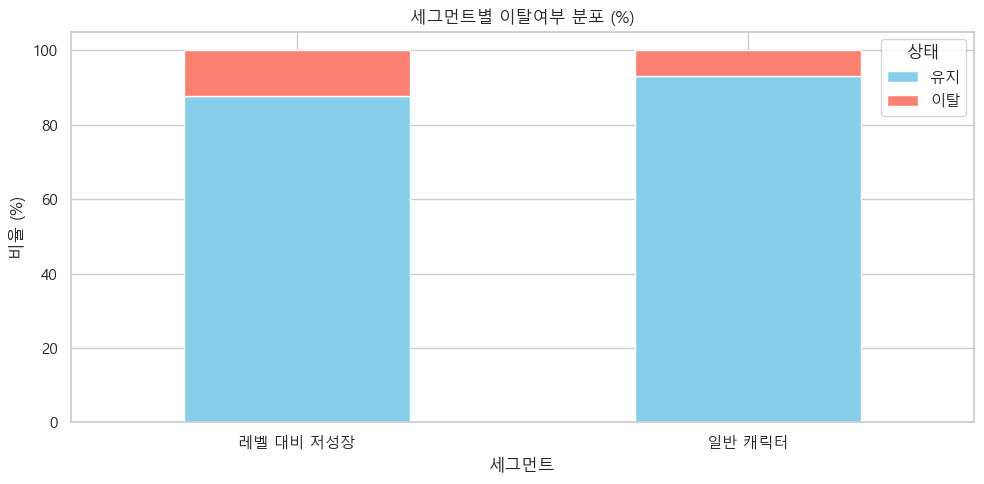

In [10]:
import matplotlib.pyplot as plt
import pandas as pd

# 세그먼트별 이탈여부 분포 계산
event_dist = df.groupby(['segment', 'event']).size().unstack().fillna(0)
event_dist_percent = event_dist.div(event_dist.sum(axis=1), axis=0) * 100

# 시각화
event_dist_percent.plot(kind='bar', stacked=True, color=['skyblue', 'salmon'])
plt.title('세그먼트별 이탈여부 분포 (%)')
plt.ylabel('비율 (%)')
plt.xlabel('세그먼트')
plt.xticks(rotation=0)  
plt.legend(title='상태', labels=['유지', '이탈'])
plt.tight_layout()
plt.savefig("segment_status_ratio_with_table.png", dpi=300)
plt.show()


In [31]:
# 오류 방지를 위해 reset_index 생략하고 수치만 계산하여 출력
rate_df = (
    df.groupby(['segment', 'event']).size()
    .groupby(level=0)
    .apply(lambda x: 100 * x / x.sum())
    .unstack()
    .rename(columns={0: '유지', 1: '이탈'})
    .round(2)
)

rate_df


,event,유지,이탈
segment,segment,,
레벨 대비 저성장,레벨 대비 저성장,87.70,12.30
일반 유저,일반 유저,93.09,6.91


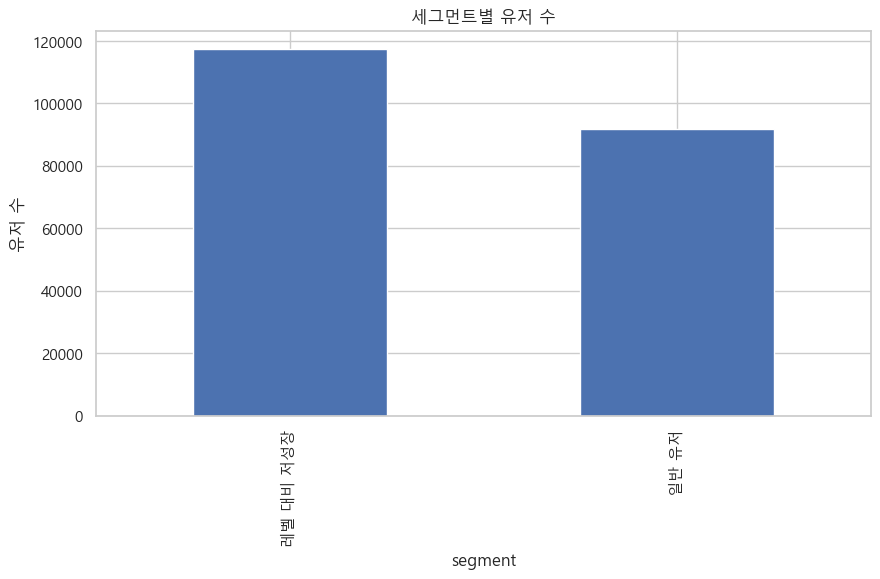

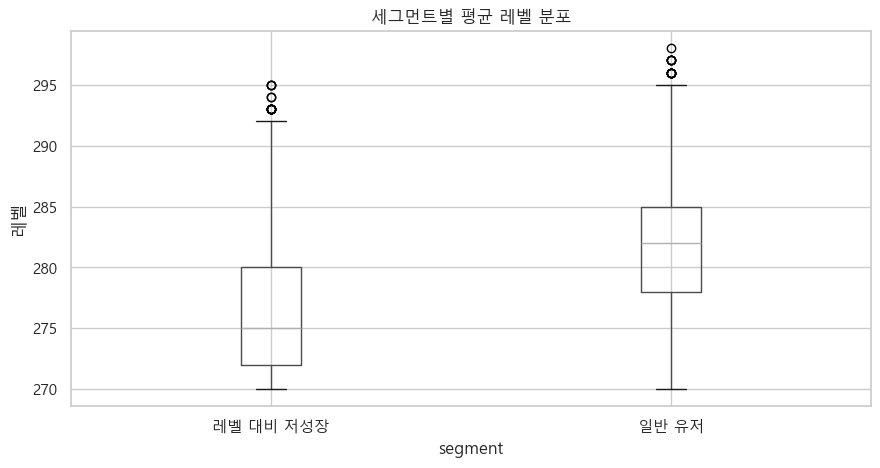

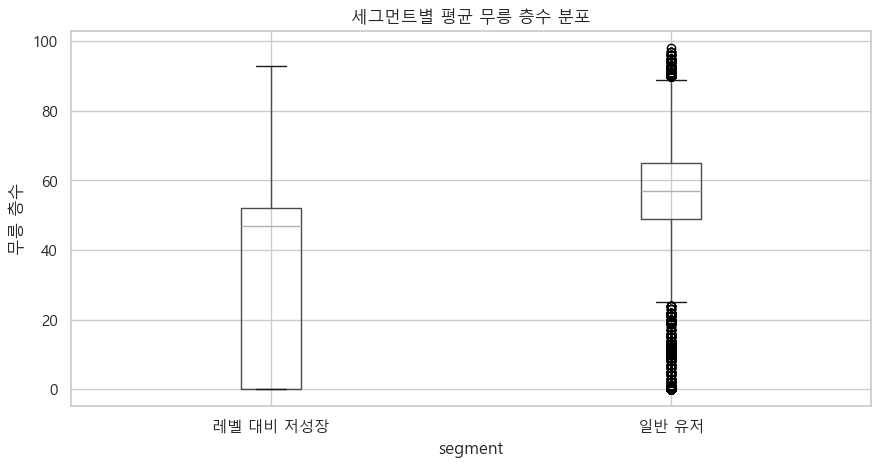

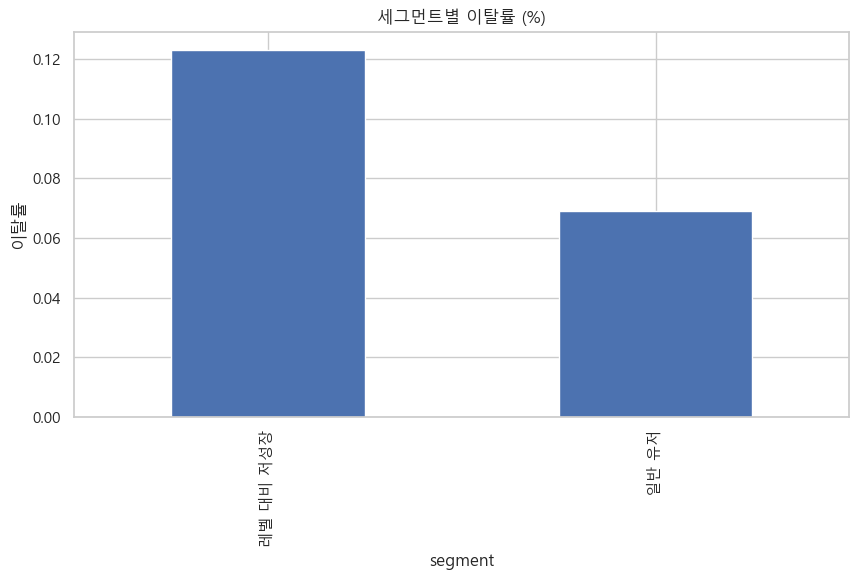

In [137]:
import matplotlib.pyplot as plt

# 1. 세그먼트별 유저 수
segment_counts = df['segment'].value_counts()
segment_counts.plot(kind='bar')
plt.title('세그먼트별 유저 수')
plt.ylabel('유저 수')
plt.show()

# 2. 세그먼트별 평균 레벨 (박스플롯)
df.boxplot(column='character_level', by='segment')
plt.title('세그먼트별 평균 레벨 분포')
plt.suptitle('')
plt.ylabel('레벨')
plt.show()

# 3. 세그먼트별 평균 무릉 층수 (박스플롯)
df.boxplot(column='dojang_best_floor', by='segment')
plt.title('세그먼트별 평균 무릉 층수 분포')
plt.suptitle('')
plt.ylabel('무릉 층수')
plt.show()

# 4. 세그먼트별 이탈률
churn_rate = df.groupby('segment')['event'].mean()
churn_rate.plot(kind='bar')
plt.title('세그먼트별 이탈률 (%)')
plt.ylabel('이탈률')
plt.show()


In [15]:
# 세그먼트별 유저 수
segment_counts = df['segment'].value_counts()

# 전체 대비 비율
segment_ratio = segment_counts / segment_counts.sum() * 100
print(segment_ratio)


segment
레벨 대비 저성장    56.083405
일반 유저        43.916595
Name: count, dtype: float64


In [16]:
# 세그먼트별 평균 어센틱 심볼합
avg_authentic_sum = df.groupby('segment')['authentic_sum'].mean()
print(avg_authentic_sum)


segment
레벨 대비 저성장    21.241668
일반 유저        44.149290
Name: authentic_sum, dtype: float64


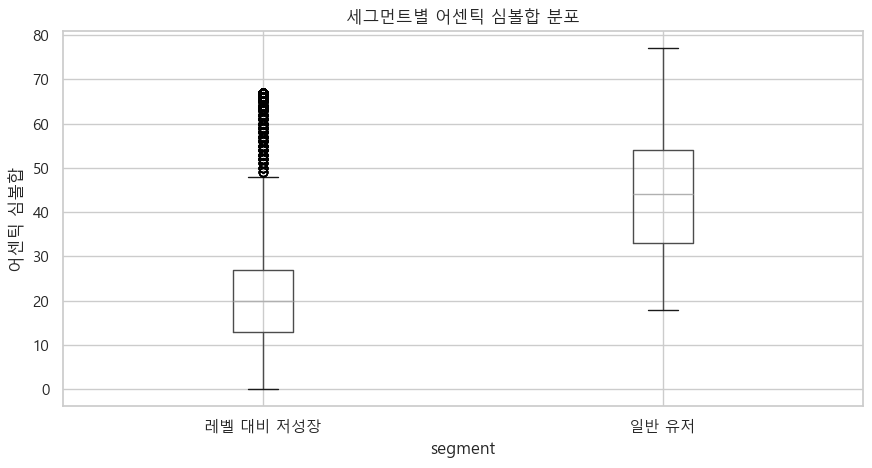

In [17]:
import matplotlib.pyplot as plt

# 세그먼트별 어센틱 심볼합 박스플롯
df.boxplot(column='authentic_sum', by='segment')
plt.title('세그먼트별 어센틱 심볼합 분포')
plt.suptitle('')
plt.ylabel('어센틱 심볼합')
plt.show()


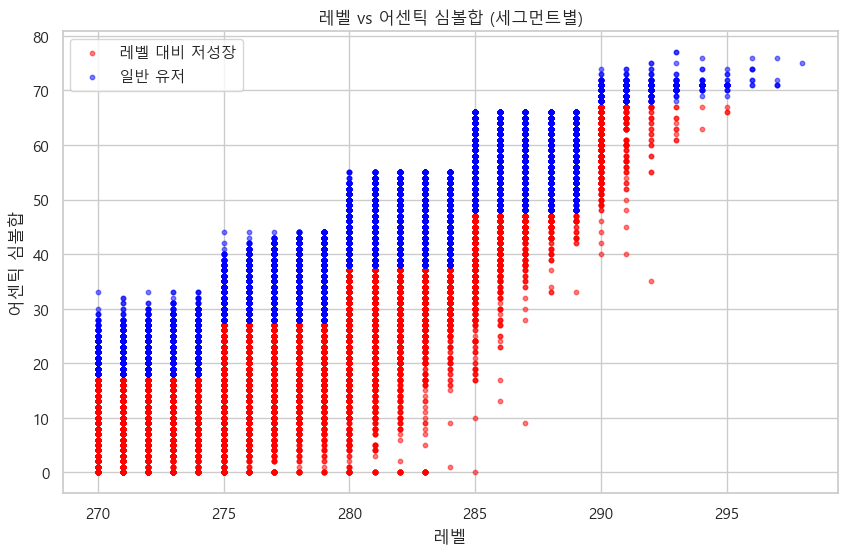

In [108]:
import matplotlib.pyplot as plt

# 세그먼트별 색깔 지정
colors = {'레벨 대비 저성장': 'red', '일반 유저': 'blue'}

# 산점도 그리기
plt.figure(figsize=(10, 6))

for segment, color in colors.items():
    subset = df[df['segment'] == segment]
    plt.scatter(subset['character_level'], subset['authentic_sum'], label=segment, alpha=0.5, c=color, s=10)

plt.title('레벨 vs 어센틱 심볼합 (세그먼트별)')
plt.xlabel('레벨')
plt.ylabel('어센틱 심볼합')
plt.legend()
plt.grid(True)
plt.show()


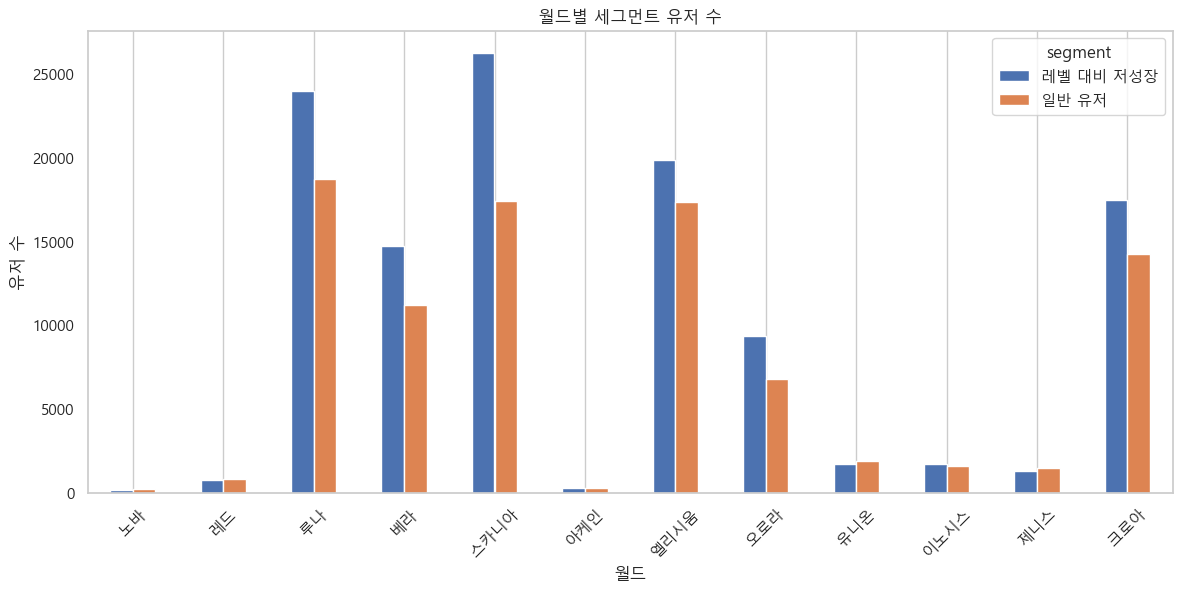

In [109]:
import matplotlib.pyplot as plt

# 한글 깨짐 방지 (한국어 환경이면 추가)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 1. 세그먼트별 월드 유저 수
world_segment_counts = df.groupby(['world_name', 'segment']).size().unstack(fill_value=0)
world_segment_counts.plot(kind='bar', figsize=(14,6))
plt.title('월드별 세그먼트 유저 수')
plt.ylabel('유저 수')
plt.xlabel('월드')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()



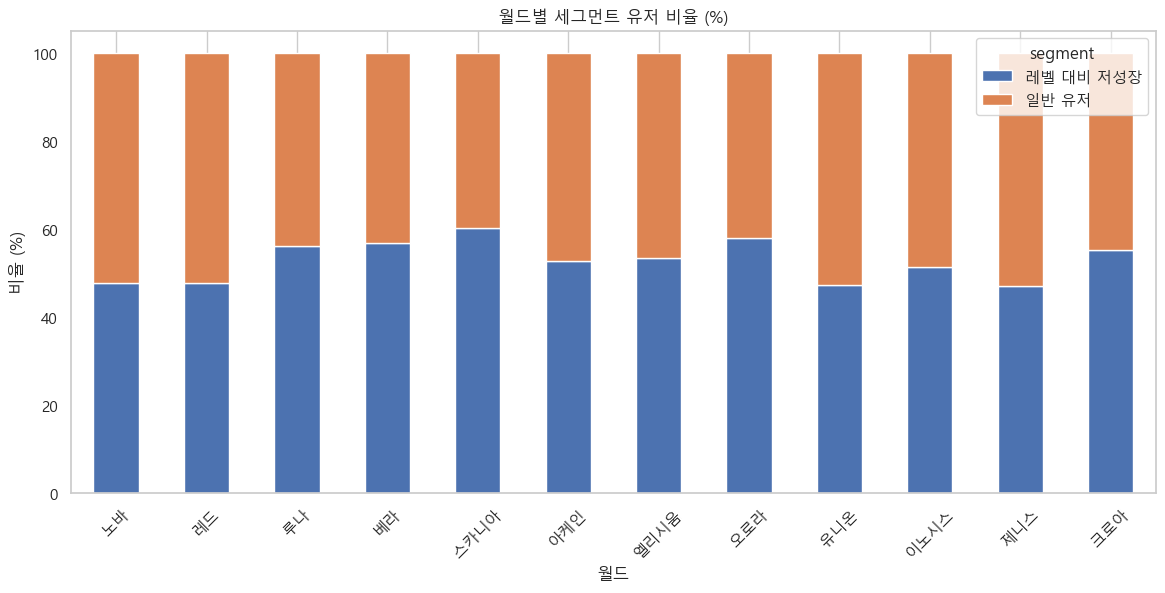

In [25]:
# 2. 세그먼트별 월드 유저 비율
world_segment_ratio = world_segment_counts.div(world_segment_counts.sum(axis=1), axis=0) * 100
world_segment_ratio.plot(kind='bar', stacked=True, figsize=(14,6))
plt.title('월드별 세그먼트 유저 비율 (%)')
plt.ylabel('비율 (%)')
plt.xlabel('월드')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

In [27]:
# 3. 세그먼트별 월드 평균 레벨 & 평균 심볼합
world_level_mean = df.groupby(['world_name', 'segment'])['character_level'].mean().unstack()
world_authentic_sum_mean = df.groupby(['world_name', 'segment'])['authentic_sum'].mean().unstack()


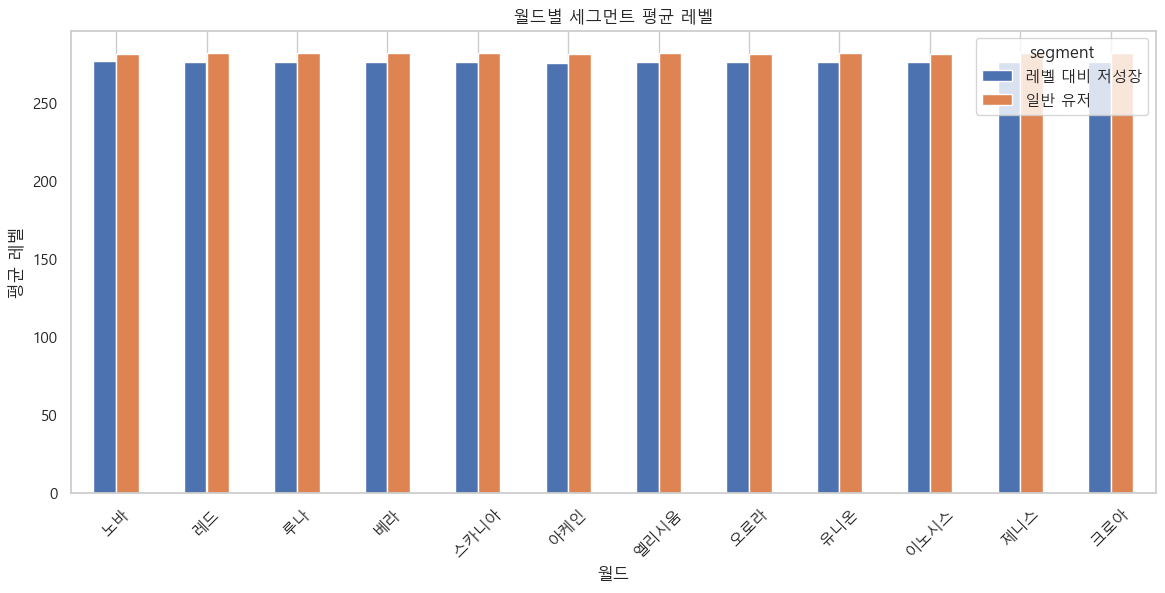

In [28]:
# 월드별 평균 레벨
world_level_mean.plot(kind='bar', figsize=(14,6))
plt.title('월드별 세그먼트 평균 레벨')
plt.ylabel('평균 레벨')
plt.xlabel('월드')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


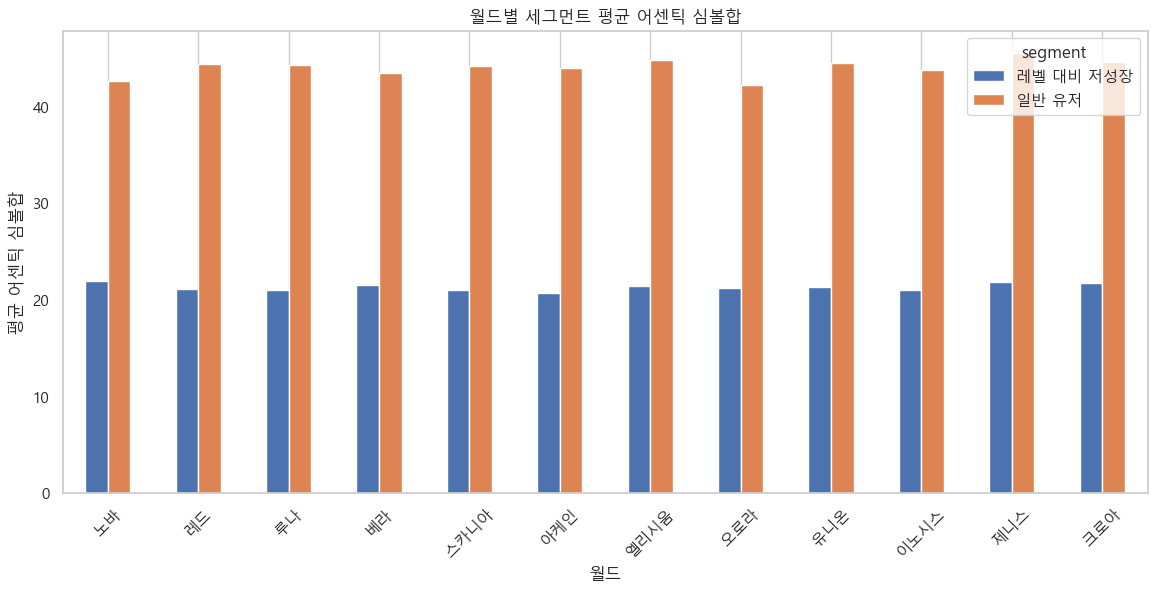

In [29]:
# 월드별 평균 심볼합
world_authentic_sum_mean.plot(kind='bar', figsize=(14,6))
plt.title('월드별 세그먼트 평균 어센틱 심볼합')
plt.ylabel('평균 어센틱 심볼합')
plt.xlabel('월드')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

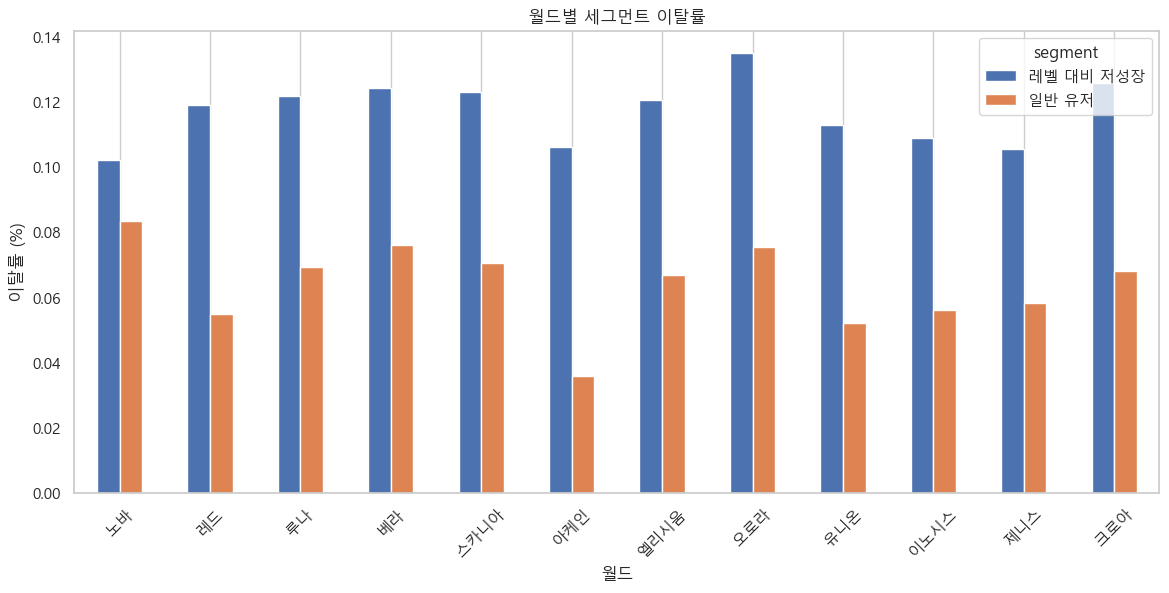

In [30]:
# 4. 세그먼트별 월드 이탈률
world_event_rate = df.groupby(['world_name', 'segment'])['event'].mean().unstack()
world_event_rate.plot(kind='bar', figsize=(14,6))
plt.title('월드별 세그먼트 이탈률')
plt.ylabel('이탈률 (%)')
plt.xlabel('월드')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


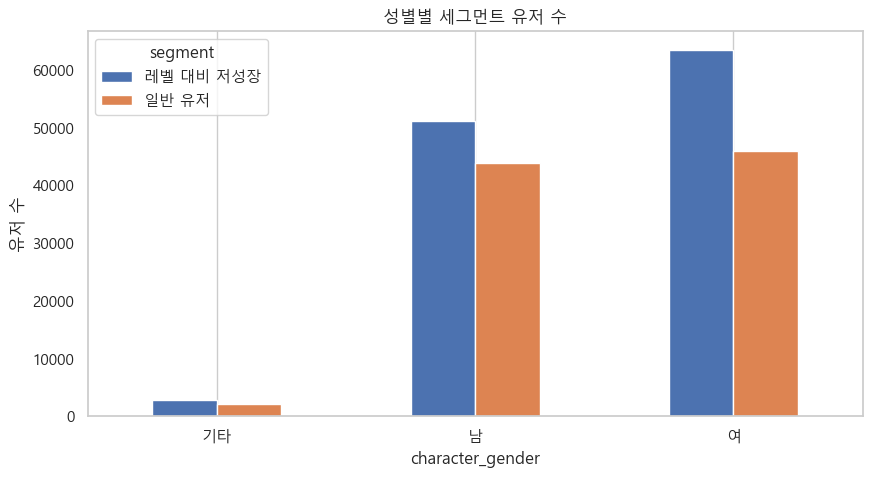

In [31]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (필요 시)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 1. 성별 × 세그먼트 유저 수
gender_segment_counts = df.groupby(['character_gender', 'segment']).size().unstack(fill_value=0)
gender_segment_counts.plot(kind='bar', figsize=(10,5))
plt.title('성별별 세그먼트 유저 수')
plt.ylabel('유저 수')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

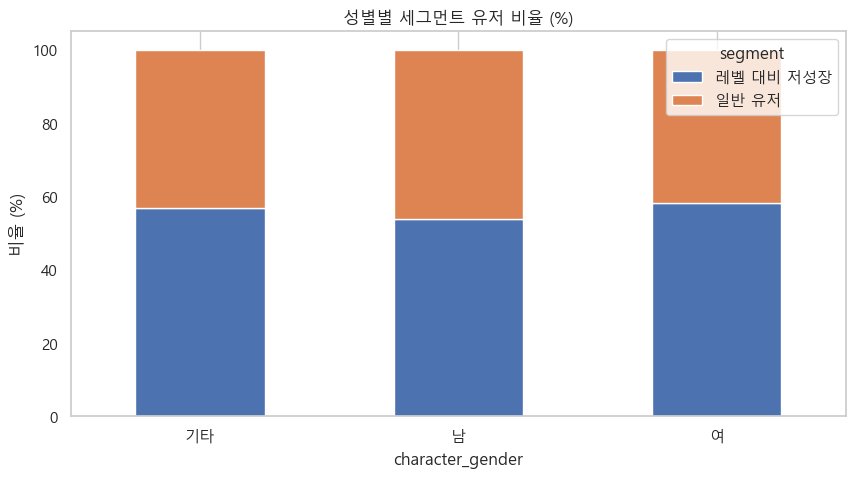

In [32]:

# 2. 성별 × 세그먼트 유저 비율
gender_segment_ratio = gender_segment_counts.div(gender_segment_counts.sum(axis=1), axis=0) * 100
gender_segment_ratio.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('성별별 세그먼트 유저 비율 (%)')
plt.ylabel('비율 (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


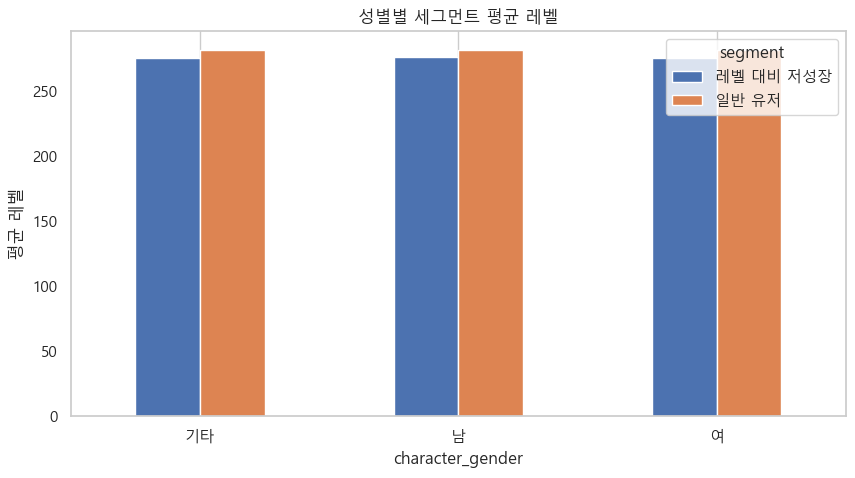

In [33]:
# 3. 성별 × 세그먼트 평균 레벨
gender_level_mean = df.groupby(['character_gender', 'segment'])['character_level'].mean().unstack()
gender_level_mean.plot(kind='bar', figsize=(10,5))
plt.title('성별별 세그먼트 평균 레벨')
plt.ylabel('평균 레벨')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

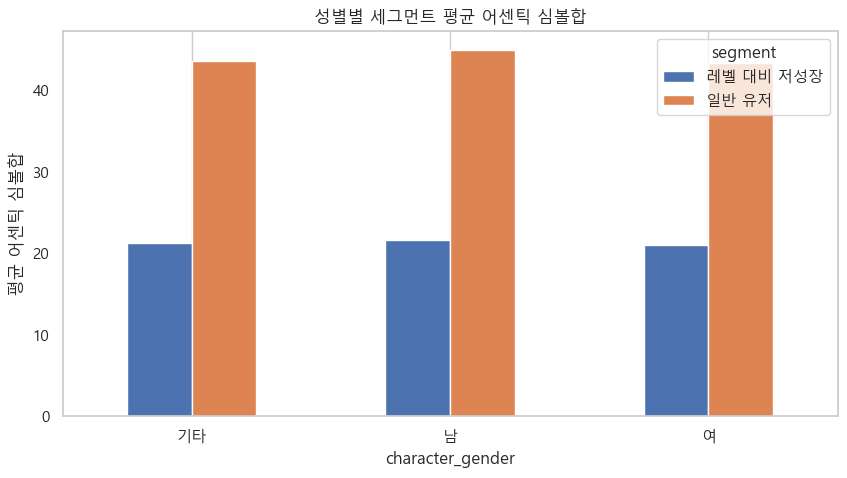

In [34]:
# 4. 성별 × 세그먼트 평균 어센틱 심볼합
gender_authentic_mean = df.groupby(['character_gender', 'segment'])['authentic_sum'].mean().unstack()
gender_authentic_mean.plot(kind='bar', figsize=(10,5))
plt.title('성별별 세그먼트 평균 어센틱 심볼합')
plt.ylabel('평균 어센틱 심볼합')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

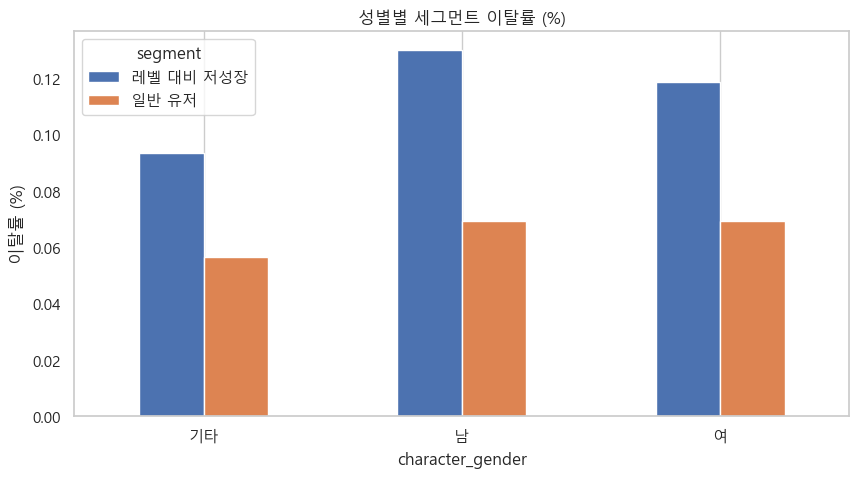

In [35]:
# 5. 성별 × 세그먼트 이탈률
gender_event_rate = df.groupby(['character_gender', 'segment'])['event'].mean().unstack()
gender_event_rate.plot(kind='bar', figsize=(10,5))
plt.title('성별별 세그먼트 이탈률 (%)')
plt.ylabel('이탈률 (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()

In [77]:
# 길드 가입 여부 플래그 만들기
df['guild_join_flag'] = df['character_guild_name'].apply(lambda x: 0 if x == '미가입' else 1)


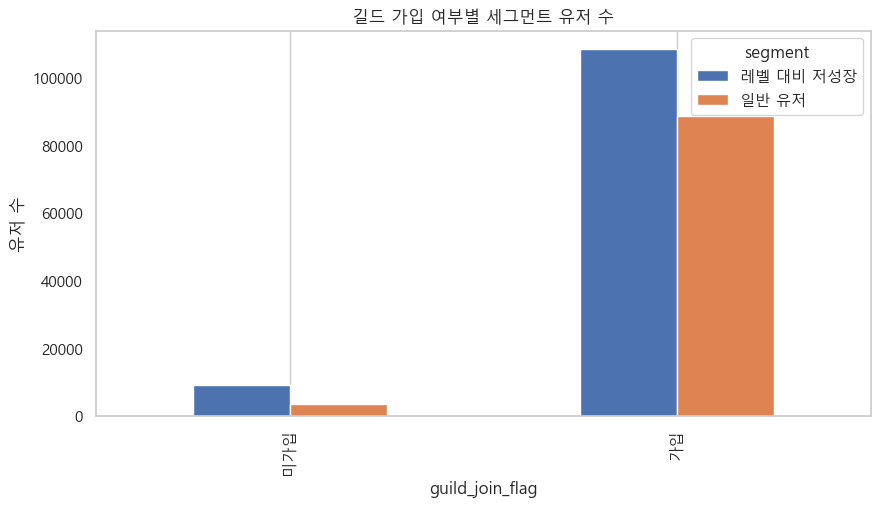

In [75]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (필요 시)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 길드 가입 여부 플래그 생성
df['guild_join_flag'] = df['character_guild_name'].apply(lambda x: 0 if x == '미가입' else 1)

# 1. 길드 가입 여부 × 세그먼트 유저 수
guild_segment_counts = df.groupby(['guild_join_flag', 'segment']).size().unstack(fill_value=0)
guild_segment_counts.plot(kind='bar', figsize=(10,5))
plt.title('길드 가입 여부별 세그먼트 유저 수')
plt.ylabel('유저 수')
plt.xticks(ticks=[0,1], labels=['미가입', '가입'])

plt.grid(axis='y')
plt.show()


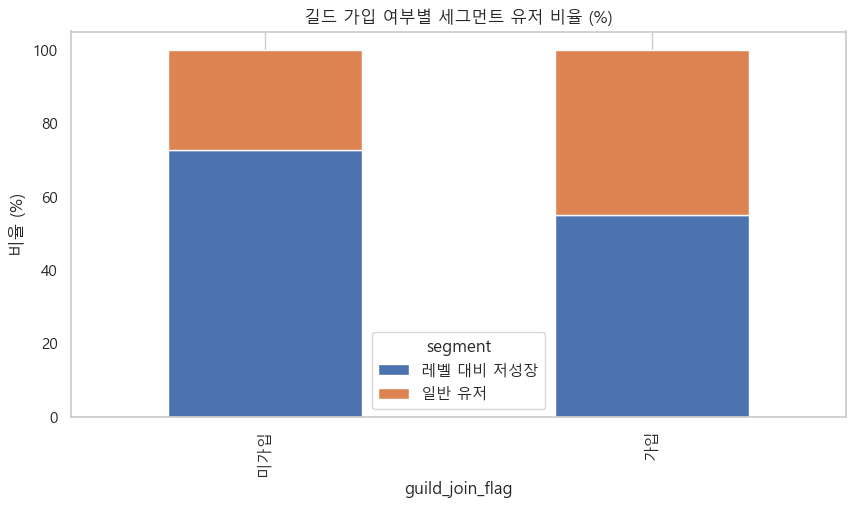

In [43]:

# 2. 길드 가입 여부 × 세그먼트 유저 비율
guild_segment_ratio = guild_segment_counts.div(guild_segment_counts.sum(axis=1), axis=0) * 100
guild_segment_ratio.plot(kind='bar', stacked=True, figsize=(10,5))
plt.title('길드 가입 여부별 세그먼트 유저 비율 (%)')
plt.ylabel('비율 (%)')
plt.xticks(ticks=[0,1], labels=['미가입', '가입'])

plt.grid(axis='y')
plt.show()

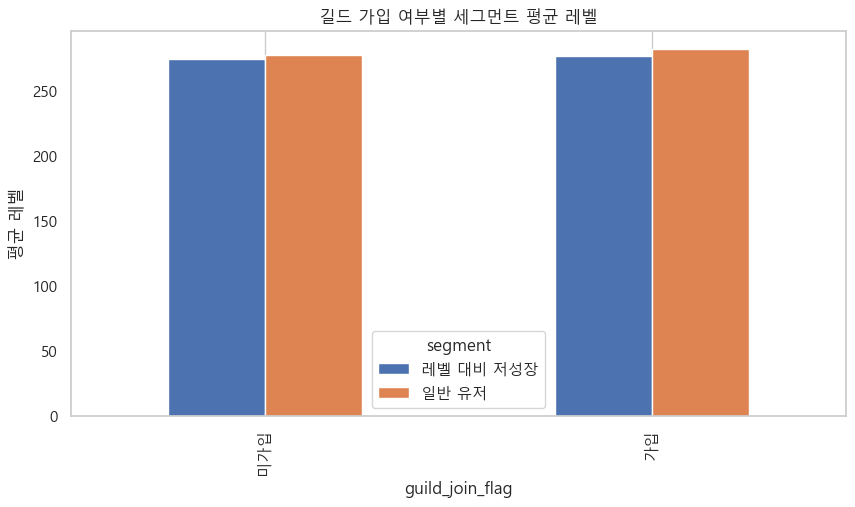

In [44]:
# 3. 길드 가입 여부 × 세그먼트 평균 레벨
guild_level_mean = df.groupby(['guild_join_flag', 'segment'])['character_level'].mean().unstack()
guild_level_mean.plot(kind='bar', figsize=(10,5))
plt.title('길드 가입 여부별 세그먼트 평균 레벨')
plt.ylabel('평균 레벨')
plt.xticks(ticks=[0,1], labels=['미가입', '가입'])

plt.grid(axis='y')
plt.show()


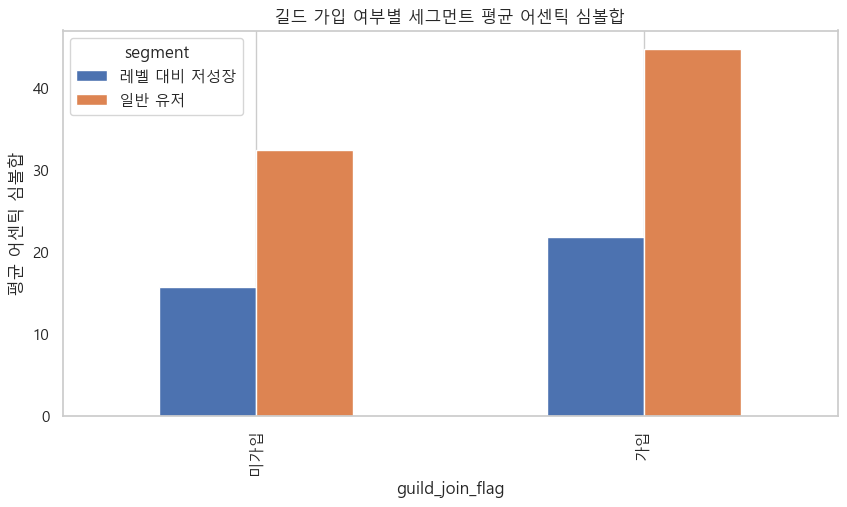

In [45]:

# 4. 길드 가입 여부 × 세그먼트 평균 어센틱 심볼합
guild_authentic_mean = df.groupby(['guild_join_flag', 'segment'])['authentic_sum'].mean().unstack()
guild_authentic_mean.plot(kind='bar', figsize=(10,5))
plt.title('길드 가입 여부별 세그먼트 평균 어센틱 심볼합')
plt.ylabel('평균 어센틱 심볼합')
plt.xticks(ticks=[0,1], labels=['미가입', '가입'])

plt.grid(axis='y')
plt.show()

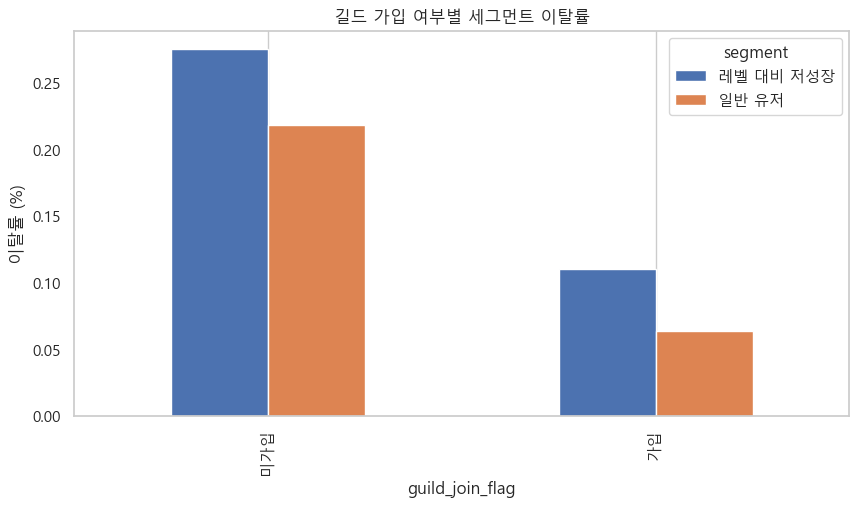

In [46]:
# 5. 길드 가입 여부 × 세그먼트 이탈률
guild_event_rate = df.groupby(['guild_join_flag', 'segment'])['event'].mean().unstack()
guild_event_rate.plot(kind='bar', figsize=(10,5))
plt.title('길드 가입 여부별 세그먼트 이탈률')
plt.ylabel('이탈률 (%)')
plt.xticks(ticks=[0,1], labels=['미가입', '가입'])

plt.grid(axis='y')
plt.show()

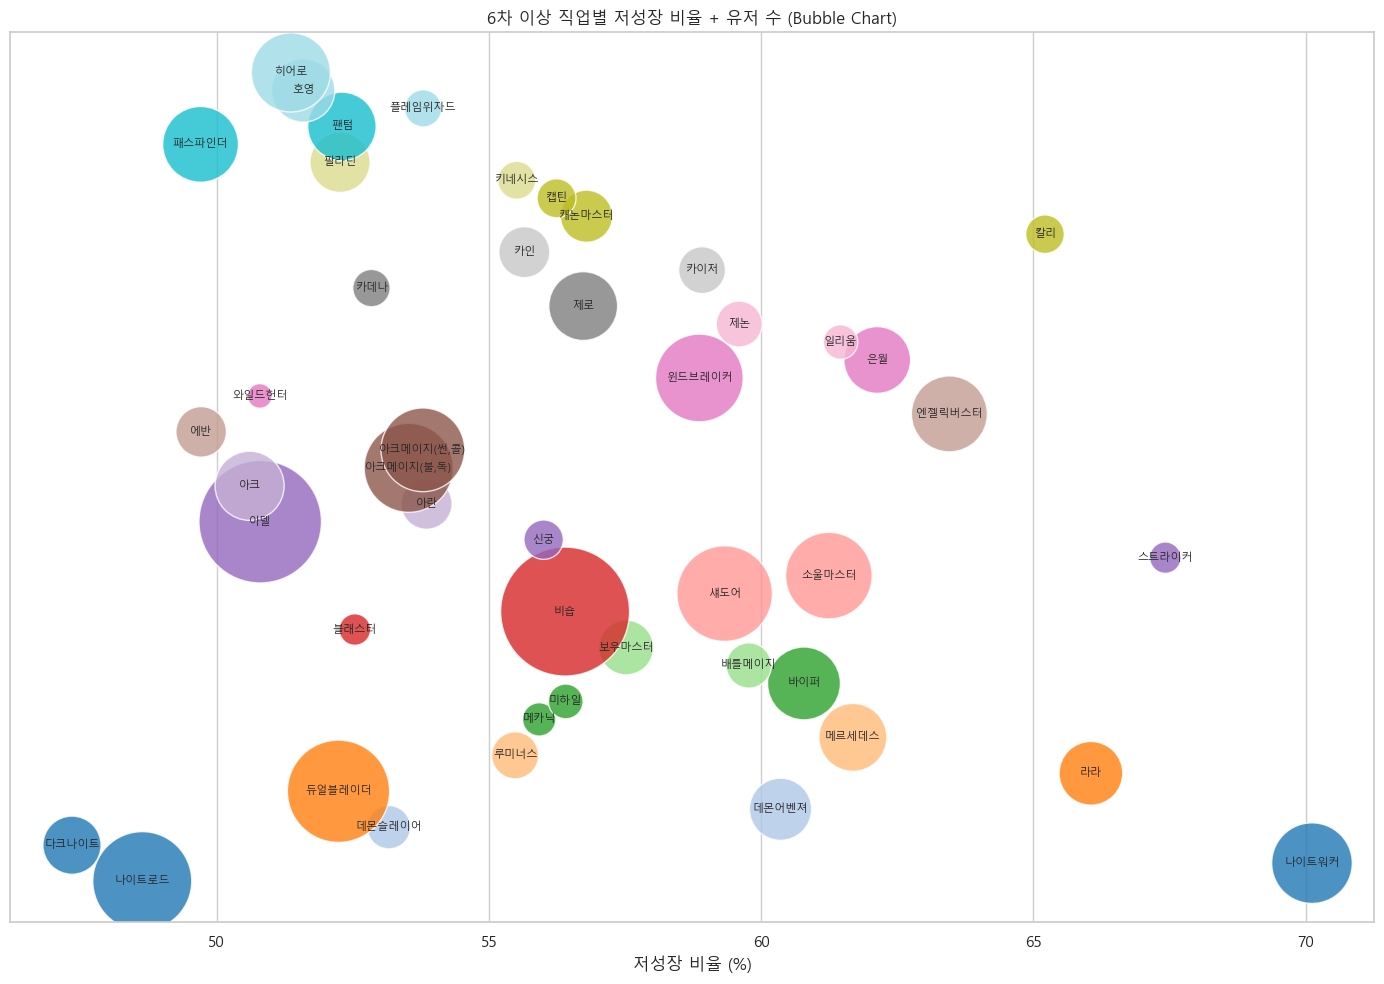

In [51]:
import matplotlib.pyplot as plt
import seaborn as sns

# 6차 이상만 필터링
filtered_df = df[df['character_class_level'] == 6]

# 저성장 비율 + 유저 수 계산
segment_ratio_by_class = (
    filtered_df.groupby('character_class')['segment']
    .value_counts(normalize=True)
    .unstack()
    .fillna(0)
)

class_counts = filtered_df['character_class'].value_counts()

# merge
merged = segment_ratio_by_class[['레벨 대비 저성장']].merge(
    class_counts.rename('user_count'), left_index=True, right_index=True
)

# 시각화
plt.figure(figsize=(14, 10))
scatter = plt.scatter(
    merged['레벨 대비 저성장'] * 100,
    range(len(merged)),
    s=merged['user_count'] / 2,
    c=range(len(merged)),
    cmap='tab20',
    alpha=0.8,
    edgecolors='w'
)

# 직업명 텍스트 표시
for i, (job, row) in enumerate(merged.iterrows()):
    x = row['레벨 대비 저성장'] * 100
    y = i
    plt.text(x, y, job, fontsize=8, va='center', ha='center')

# 축 설정
plt.yticks([])  # y축 눈금 제거
plt.xlabel('저성장 비율 (%)')
plt.title('6차 이상 직업별 저성장 비율 + 유저 수 (Bubble Chart)')
plt.grid(True)
plt.tight_layout()
plt.show()


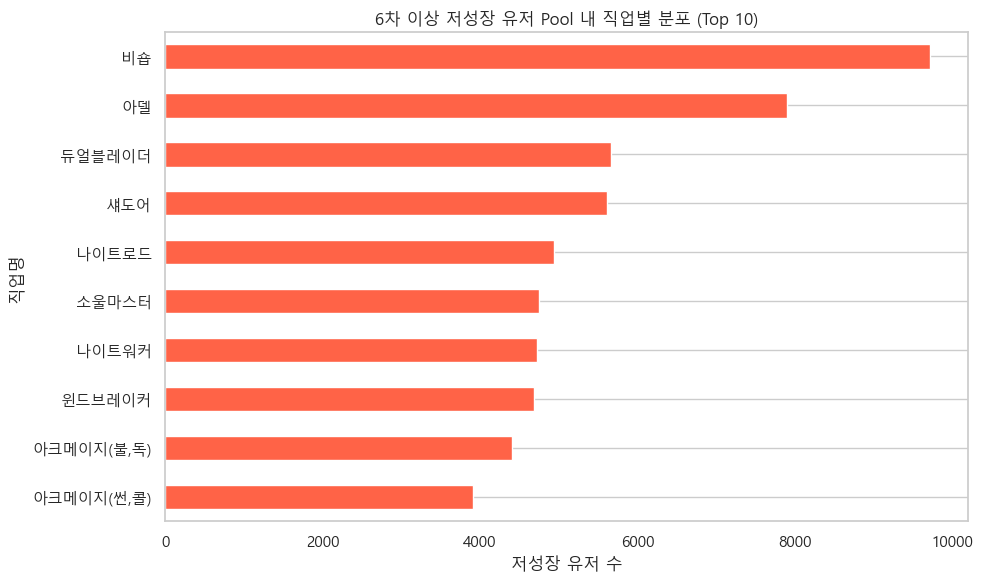

In [52]:
import matplotlib.pyplot as plt

# 6차 이상 & 저성장 유저만 필터링
filtered_df = df[(df['character_class_level'] == 6) & (df['segment'] == '레벨 대비 저성장')]

# 직업별 저성장 유저 수 집계
low_growth_job_counts = filtered_df['character_class'].value_counts()

# Top 10 직업만 추출
top10_low_growth_jobs = low_growth_job_counts.head(10)

# 막대그래프
plt.figure(figsize=(10,6))
top10_low_growth_jobs.plot(kind='barh', color='tomato')
plt.title('6차 이상 저성장 유저 Pool 내 직업별 분포 (Top 10)')
plt.xlabel('저성장 유저 수')
plt.ylabel('직업명')
plt.gca().invert_yaxis()  # 높은 수가 위로 오게
plt.grid(axis='x')
plt.tight_layout()
plt.show()


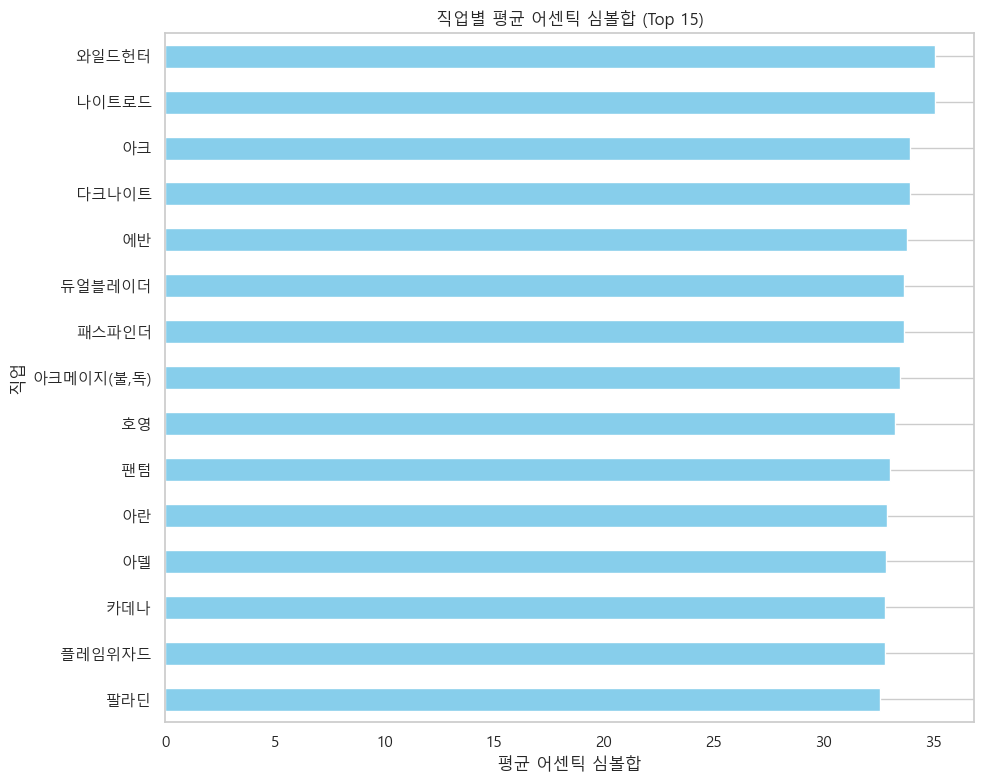

In [53]:
import matplotlib.pyplot as plt

# 6차 이상 캐릭터만 필터링
filtered_df = df[df["character_class_level"] == 6]

# 직업별 평균 어센틱 심볼합 계산
mean_authentic = filtered_df.groupby("character_class")["authentic_sum"].mean().sort_values(ascending=False)

# 상위 15개 시각화
plt.figure(figsize=(10,8))
mean_authentic.head(15).plot(kind='barh', color='skyblue')
plt.title('직업별 평균 어센틱 심볼합 (Top 15)')
plt.xlabel('평균 어센틱 심볼합')
plt.ylabel('직업')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


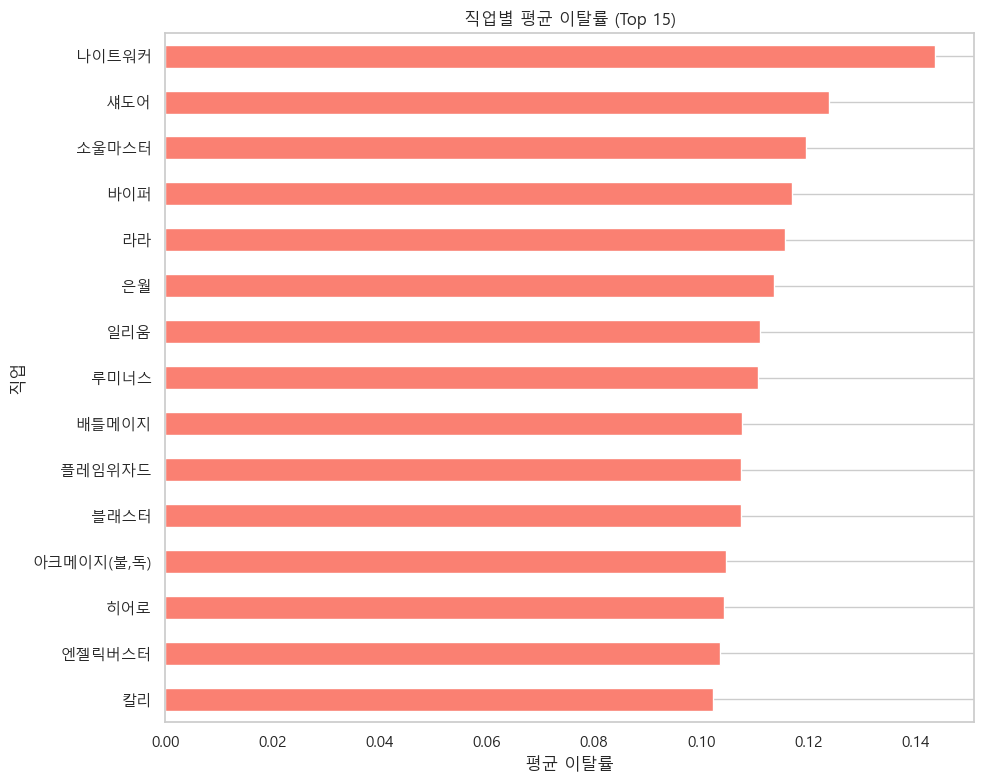

In [54]:
import matplotlib.pyplot as plt

# 6차 이상만 필터링
filtered_df = df[df["character_class_level"] == 6]

# 직업별 평균 이탈률 계산
mean_event = (
    filtered_df.groupby("character_class")["event"]
    .mean()
    .sort_values(ascending=False)  # 이탈률 높은 순서
)

# 상위 15개만 시각화
plt.figure(figsize=(10,8))
mean_event.head(15).plot(kind='barh', color='salmon')
plt.title('직업별 평균 이탈률 (Top 15)')
plt.xlabel('평균 이탈률')
plt.ylabel('직업')
plt.gca().invert_yaxis()
plt.grid(axis='x')
plt.tight_layout()
plt.show()


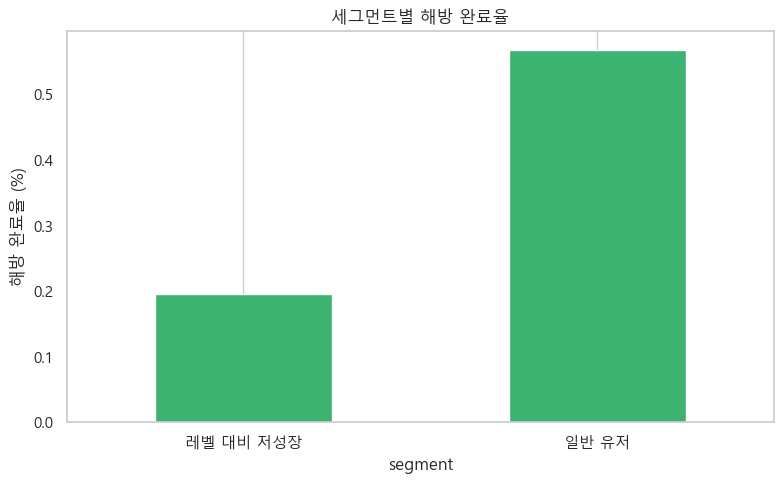

In [55]:
import matplotlib.pyplot as plt

# 한글 폰트 설정 (필요 시)
plt.rcParams['font.family'] = 'Malgun Gothic'

# 해방 완료율 계산
liberation_rate_by_segment = df.groupby('segment')['liberation_quest_clear_flag'].mean()

# 시각화
plt.figure(figsize=(8,5))
liberation_rate_by_segment.plot(kind='bar', color='mediumseagreen')
plt.title('세그먼트별 해방 완료율')
plt.ylabel('해방 완료율 (%)')
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


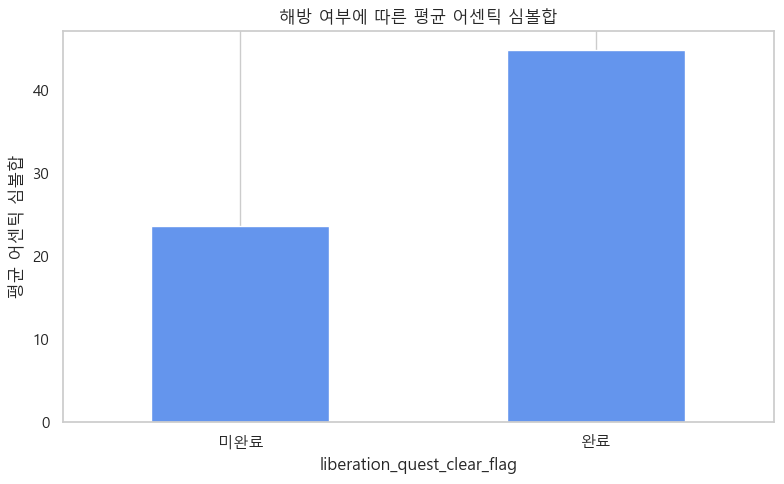

In [56]:
import matplotlib.pyplot as plt

# 해방 여부별 평균 어센틱 심볼합
authentic_by_liberation = df.groupby('liberation_quest_clear_flag')['authentic_sum'].mean()

# 시각화
plt.figure(figsize=(8,5))
authentic_by_liberation.plot(kind='bar', color='cornflowerblue')
plt.title('해방 여부에 따른 평균 어센틱 심볼합')
plt.ylabel('평균 어센틱 심볼합')
plt.xticks([0, 1], ['미완료', '완료'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


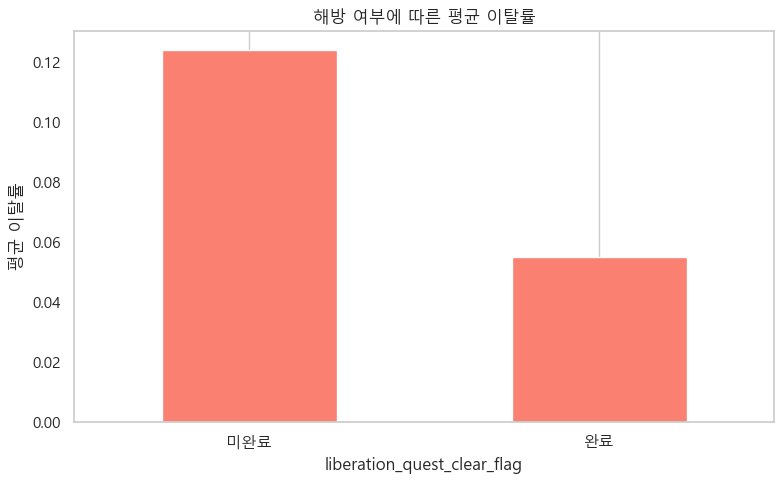

In [57]:
# 해방 여부별 평균 이탈률
event_by_liberation = df.groupby('liberation_quest_clear_flag')['event'].mean()

# 시각화
plt.figure(figsize=(8,5))
event_by_liberation.plot(kind='bar', color='salmon')
plt.title('해방 여부에 따른 평균 이탈률')
plt.ylabel('평균 이탈률')
plt.xticks([0, 1], ['미완료', '완료'], rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [60]:
def classify_set_combo_v2(row):
    luba = row['set_lubatiss_count']
    abs = row['set_absorlab_count']
    arc = row['set_arcane_count']
    eter = row['set_eternal_count']

    if eter >= 6:
        return '에테르넬 풀셋'
    elif eter >= 2 and arc >= 3:
        return '에테르넬 + 아케인'
    elif eter >= 2 and abs >= 3:
        return '에테르넬 + 앱솔'
    elif luba >= 2 and arc >= 3:
        return '루타비스 + 아케인'
    elif luba >= 2 and abs >= 3:
        return '루타비스 + 앱솔'
    else:
        return '기타 or 세트 없음'

df['set_combo'] = df.apply(classify_set_combo_v2, axis=1)


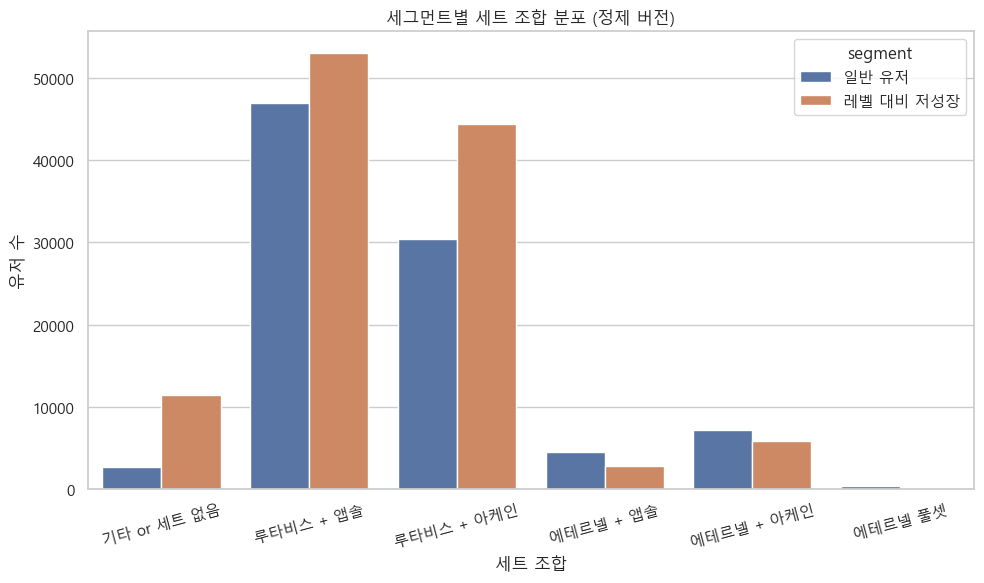

In [61]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='set_combo', hue='segment', order=[
    '기타 or 세트 없음', '루타비스 + 앱솔', '루타비스 + 아케인',
    '에테르넬 + 앱솔', '에테르넬 + 아케인', '에테르넬 풀셋'
])
plt.title('세그먼트별 세트 조합 분포 (정제 버전)')
plt.xlabel('세트 조합')
plt.ylabel('유저 수')
plt.xticks(rotation=15)
plt.tight_layout()
plt.show()


In [62]:
df_etc = df[df['set_combo'] == '기타 or 세트 없음']
df_etc[['character_name', 'set_lubatiss_count', 'set_absorlab_count', 'set_arcane_count', 'set_eternal_count']].sample(10)


,character_name,set_lubatiss_count,set_absorlab_count,set_arcane_count,set_eternal_count
194559,비숍카무,0,0,1,3
126983,나로늡,0,0,0,0
177946,naro말하면,0,0,0,0
146665,영리고편,1,5,1,0
82615,와이뚜뚜,4,2,0,1
152453,룬크레이오즈,0,0,7,0
168358,향자,0,0,0,0
176301,GASRED,0,0,1,0
185326,특수병,0,0,0,0
61897,윤경헌,4,2,0,1


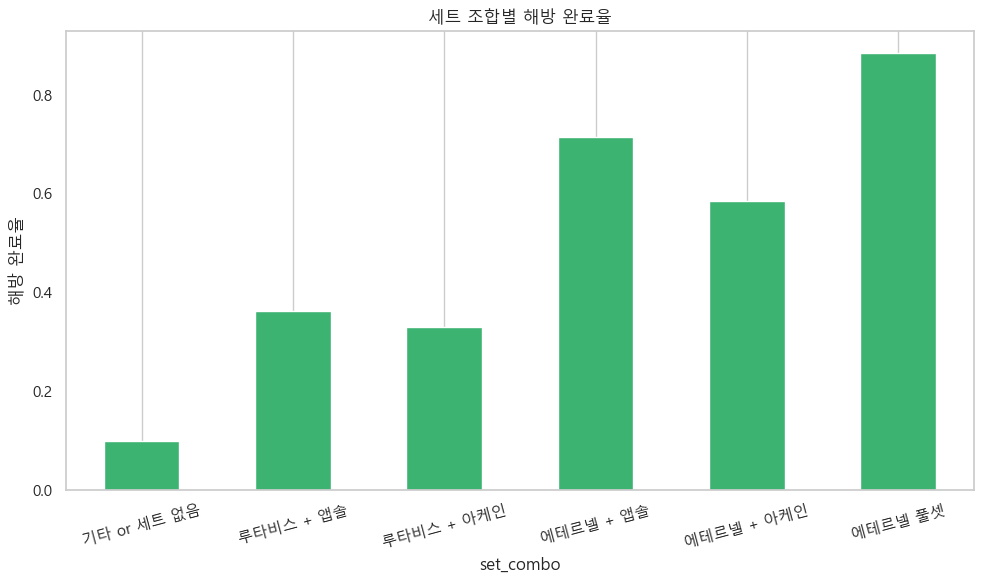

In [63]:
import matplotlib.pyplot as plt

# 세트 조합별 해방 완료율
liberation_by_set_combo = df.groupby('set_combo')['liberation_quest_clear_flag'].mean()

# 시각화
plt.figure(figsize=(10,6))
liberation_by_set_combo.loc[
    ['기타 or 세트 없음', '루타비스 + 앱솔', '루타비스 + 아케인', '에테르넬 + 앱솔', '에테르넬 + 아케인', '에테르넬 풀셋']
].plot(kind='bar', color='mediumseagreen')
plt.title('세트 조합별 해방 완료율')
plt.ylabel('해방 완료율')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


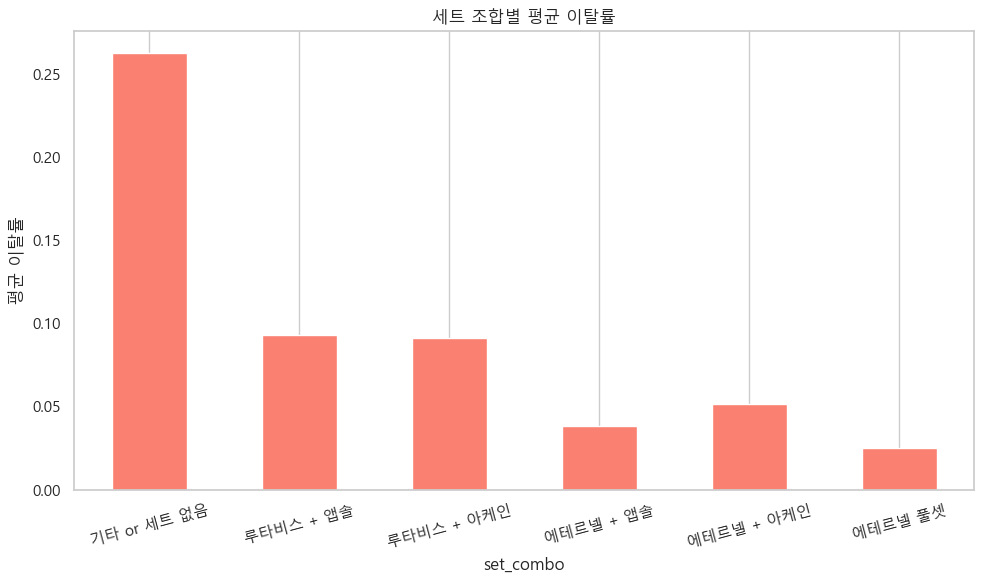

In [64]:
# 세트 조합별 평균 이탈률
event_by_set_combo = df.groupby('set_combo')['event'].mean()

# 시각화
plt.figure(figsize=(10,6))
event_by_set_combo.loc[
    ['기타 or 세트 없음', '루타비스 + 앱솔', '루타비스 + 아케인', '에테르넬 + 앱솔', '에테르넬 + 아케인', '에테르넬 풀셋']
].plot(kind='bar', color='salmon')
plt.title('세트 조합별 평균 이탈률')
plt.ylabel('평균 이탈률')
plt.xticks(rotation=15)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [66]:
import pandas as pd
import scipy.stats as stats
import numpy as np

# 에테르넬 3세트 이상 여부 이진화
df['eternal_3set_flag'] = (df['set_eternal_count'] >= 3).astype(int)

# 교차표 만들기
contingency = pd.crosstab(df['eternal_3set_flag'], df['event'])

# 카이제곱 검정
chi2, p, dof, expected = stats.chi2_contingency(contingency)

# Cramér's V 계산
n = contingency.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape)-1)))

# 결과 출력
print(f"Chi2: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Cramér's V: {cramers_v:.4f}")


Chi2: 661.0237
P-value: 0.0000
Cramér's V: 0.0562


In [67]:
import scipy.stats as stats
import numpy as np
import pandas as pd

# 교차표 생성
contingency = pd.crosstab(df['segment'], df['event'])

# 카이제곱 검정
chi2, p, dof, expected = stats.chi2_contingency(contingency)

# Cramér's V 계산
n = contingency.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape) - 1)))

# 결과 출력
print(f"Chi2: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Cramér's V: {cramers_v:.4f}")


Chi2: 1677.2476
P-value: 0.0000
Cramér's V: 0.0895


In [78]:
# 6차 이상 캐릭터만 필터링
df_filtered = df[df['character_class_level'] == 6].copy()

# 필요한 컬럼 추출
columns_to_use = [
    'character_class',              # 직업
    'eternal_3set_flag',             # 에테르넬 3세트 여부
    'guild_join_flag',               # 길드 미가입 여부
    'liberation_quest_clear_flag',   # 해방 완료 여부
    'character_level',               # 레벨
    'authentic_sum',                 # 어센틱 심볼 합
    'event'                          # Target (이탈 여부)
]

df_model = df_filtered[columns_to_use].copy()


# One-Hot Encoding (character_class만)
df_model = pd.get_dummies(df_model, columns=['character_class'], drop_first=True)
# X 데이터 전체를 float으로 변환
X = X.astype(float)
# 확인
df_model.head()


,eternal_3set_flag,guild_join_flag,liberation_quest_clear_flag,character_level,authentic_sum,event,character_class_나이트워커,character_class_다크나이트,character_class_데몬슬레이어,character_class_데몬어벤져,...,character_class_칼리,character_class_캐논마스터,character_class_캡틴,character_class_키네시스,character_class_팔라딘,character_class_패스파인더,character_class_팬텀,character_class_플레임위자드,character_class_호영,character_class_히어로
0,0,1,True,289,61,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,0,1,True,291,58,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,0,1,False,289,66,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,0,1,False,289,66,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1,1,True,290,66,0,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [79]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# X 변수 (event 제외)
X = df_model.drop('event', axis=1)

# 👉 float으로 변환 (에러 방지)
X = X.astype(float)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

# 결과 출력
print(vif_data)


                        feature        VIF
0             eternal_3set_flag   1.159568
1               guild_join_flag  17.611767
2   liberation_quest_clear_flag   2.550078
3               character_level  42.095832
4                 authentic_sum   7.723268
5         character_class_나이트워커   1.676777
6         character_class_다크나이트   1.345008
7        character_class_데몬슬레이어   1.191947
8         character_class_데몬어벤져   1.396805
9        character_class_듀얼블레이더   2.067221
10           character_class_라라   1.421258
11         character_class_루미너스   1.226467
12        character_class_메르세데스   1.473448
13          character_class_메카닉   1.113284
14          character_class_미하일   1.123007
15          character_class_바이퍼   1.546233
16        character_class_배틀메이지   1.209528
17        character_class_보우마스터   1.305975
18         character_class_블래스터   1.101067
19           character_class_비숍   2.703090
20          character_class_섀도어   1.939429
21        character_class_소울마스터   1.772316
22        c

In [74]:
X.describe()

,eternal_3set_flag,guild_join_flag,liberation_quest_clear_flag,character_level,authentic_sum,character_class_나이트워커,character_class_다크나이트,character_class_데몬슬레이어,character_class_데몬어벤져,character_class_듀얼블레이더,...,character_class_칼리,character_class_캐논마스터,character_class_캡틴,character_class_키네시스,character_class_팔라딘,character_class_패스파인더,character_class_팬텀,character_class_플레임위자드,character_class_호영,character_class_히어로
count,208836.000000,208836.0,208836.000000,208836.000000,208836.000000,208836.000000,208836.000000,208836.000000,208836.000000,208836.000000,...,208836.000000,208836.000000,208836.000000,208836.000000,208836.000000,208836.000000,208836.000000,208836.000000,208836.000000,208836.000000
mean,0.088174,0.0,0.359521,278.472749,31.363003,0.032221,0.016769,0.009314,0.019144,0.051883,...,0.007350,0.013465,0.007518,0.007125,0.017957,0.028458,0.023200,0.006819,0.019872,0.031072
std,0.283549,0.0,0.479861,5.628780,16.763568,0.176588,0.128406,0.096056,0.137032,0.221791,...,0.085418,0.115256,0.086379,0.084110,0.132794,0.166277,0.150539,0.082294,0.139561,0.173513
min,0.000000,0.0,0.000000,270.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.0,0.000000,274.000000,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.0,0.000000,278.000000,28.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.0,1.000000,283.000000,43.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,0.0,1.000000,298.000000,77.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [80]:
import statsmodels.api as sm

# 독립변수(X)와 종속변수(y) 분리
X = df_model.drop('event', axis=1)
y = df_model['event']

# float으로 변환 (혹시 모를 타입 문제 대비)
X = X.astype(float)

# 상수항 추가 (절편)
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
model = sm.Logit(y, X)
result = model.fit()

# 결과 출력
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.301545
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  event   No. Observations:               208836
Model:                          Logit   Df Residuals:                   208785
Method:                           MLE   Df Model:                           50
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                 0.06458
Time:                        11:59:25   Log-Likelihood:                -62973.
converged:                       True   LL-Null:                       -67321.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          22.3653      0.920     24.323      0.000   

In [82]:
import numpy as np

# result.params : 계수(coef)
# result.pvalues : p-value

# 계수 + p-value 합치기
summary_df = pd.DataFrame({
    "coef": result.params,
    "pvalue": result.pvalues
})

# 오즈비 계산
summary_df["odds_ratio"] = np.exp(summary_df["coef"])

# p-value 0.05 이하만 필터
significant_features = summary_df[summary_df["pvalue"] < 0.05]

# 오즈비 기준 정렬
significant_features = significant_features.sort_values(by="odds_ratio", ascending=False)

# 출력
print(significant_features)


                                  coef         pvalue    odds_ratio
const                        22.365337  1.111499e-130  5.165860e+09
character_class_나이트워커         0.148985   2.610195e-03  1.160656e+00
character_class_섀도어           0.100633   3.216936e-02  1.105870e+00
authentic_sum                -0.006324   2.782840e-07  9.936957e-01
liberation_quest_clear_flag  -0.071975   1.228161e-03  9.305541e-01
character_level              -0.084492  1.769768e-134  9.189794e-01
character_class_비숍           -0.112671   9.058257e-03  8.934442e-01
character_class_엔젤릭버스터       -0.166100   2.655001e-03  8.469617e-01
character_class_패스파인더        -0.175344   2.353207e-03  8.391687e-01
character_class_팔라딘          -0.177939   7.954650e-03  8.369933e-01
character_class_아델           -0.187116   2.606176e-05  8.293473e-01
character_class_윈드브레이커       -0.193177   1.741497e-04  8.243359e-01
character_class_데몬슬레이어       -0.213189   1.465186e-02  8.080030e-01
character_class_아크메이지(썬,콜)   -0.224334   3.49187

In [12]:
df['segment']

0            일반 캐릭터
1         레벨 대비 저성장
2            일반 캐릭터
3            일반 캐릭터
4         레벨 대비 저성장
            ...    
209311       일반 캐릭터
209312    레벨 대비 저성장
209313    레벨 대비 저성장
209314       일반 캐릭터
209315       일반 캐릭터
Name: segment, Length: 209316, dtype: object

In [14]:
# 문자열 segment를 숫자형으로 변환: '레벨 대비 저성장' → 1, '일반 유저' → 0
df['segment_flag'] = df['segment'].apply(lambda x: 1 if x == '레벨 대비 저성장' else 0)


In [90]:
# 사용하고자 하는 feature만 추출 (event는 y로 분리)
features = [
    'eternal_3set_flag',
    'liberation_quest_clear_flag',
    'segment_flag'
] + [col for col in df_model.columns if col.startswith("character_class_")]

# X, y 정의
X = df_model[features]
y = df_model['event']

# 타입 변환
X = X.astype(float)


In [91]:
import statsmodels.api as sm

# 상수항 추가
X = sm.add_constant(X)

# 로지스틱 회귀 모델 적합
model = sm.Logit(y, X)
result = model.fit()

# 결과 출력
print(result.summary())


Optimization terminated successfully.
         Current function value: 0.312739
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  event   No. Observations:               208836
Model:                          Logit   Df Residuals:                   208787
Method:                           MLE   Df Model:                           48
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                 0.02986
Time:                        12:19:11   Log-Likelihood:                -65311.
converged:                       True   LL-Null:                       -67321.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                  coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const                          -2.0965      0.036    -57.787      0.000   

In [92]:
import numpy as np
summary_df = pd.DataFrame({
    "coef": result.params,
    "pvalue": result.pvalues,
    "odds_ratio": np.exp(result.params)
})

# 중요 변수만 보기
print(summary_df[summary_df['pvalue'] < 0.05].sort_values(by='odds_ratio'))


                                 coef         pvalue  odds_ratio
const                       -2.096542   0.000000e+00    0.122881
liberation_quest_clear_flag -0.687763  3.814569e-271    0.502699
eternal_3set_flag           -0.633242   4.593053e-66    0.530868
character_class_카데나         -0.407543   1.681379e-04    0.665283
character_class_카인          -0.359272   5.996662e-06    0.698185
character_class_데몬어벤져       -0.358395   7.087393e-08    0.698797
character_class_다크나이트       -0.352395   1.092708e-06    0.703003
character_class_제로          -0.346633   5.080838e-08    0.707065
character_class_와일드헌터       -0.324980   3.432417e-02    0.722542
character_class_듀얼블레이더      -0.302689   7.419831e-10    0.738829
character_class_아크          -0.278101   7.591618e-06    0.757220
character_class_팬텀          -0.275269   1.226307e-05    0.759368
character_class_카이저         -0.261958   1.336609e-03    0.769544
character_class_아크메이지(썬,콜)  -0.230717   1.574881e-05    0.793964
character_class_에반       

In [93]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

# 예측값 얻기 (확률 → 0.5 기준 이진 분류)
y_pred_prob = result.predict(X)
y_pred_label = (y_pred_prob >= 0.5).astype(int)

# 정확도, 정밀도, 재현율, F1, AUC
print("정확도:", accuracy_score(y, y_pred_label))
print("정밀도:", precision_score(y, y_pred_label))
print("재현율:", recall_score(y, y_pred_label))
print("F1 score:", f1_score(y, y_pred_label))
print("AUC score:", roc_auc_score(y, y_pred_prob))


정확도: 0.9012335038020265
정밀도: 0.0
재현율: 0.0
F1 score: 0.0
AUC score: 0.6293994432990297


C:\Users\qhwhr\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [94]:
import pandas as pd
from scipy.stats import chi2_contingency

cont = pd.crosstab(df['liberation_quest_clear_flag'], df['event'])
chi2, p, _, _ = chi2_contingency(cont)
print(f"Chi2 p-value: {p:.3f}")


Chi2 p-value: 0.000


In [95]:
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test

kmf0 = KaplanMeierFitter()
kmf1 = KaplanMeierFitter()

mask0 = df['liberation_quest_clear_flag']==0
mask1 = df['liberation_quest_clear_flag']==1

# fit each group
kmf0.fit(df.loc[mask0, 'duration'], df.loc[mask0, 'event'], label='미완료')
kmf1.fit(df.loc[mask1, 'duration'], df.loc[mask1, 'event'], label='완료')

# log-rank test
results = logrank_test(
    df.loc[mask0, 'duration'], df.loc[mask1, 'duration'],
    event_observed_A=df.loc[mask0, 'event'], event_observed_B=df.loc[mask1, 'event']
)
print(f"log-rank p-value: {results.p_value:.3f}")
km

log-rank p-value: 0.000


이탈률 (0=미착용, 1=착용):
eternal_3set_flag
0    0.104554
1    0.045183
Name: event, dtype: float64

[카이제곱 검정]
p-value: 0.0000
Cramér's V: 0.0562


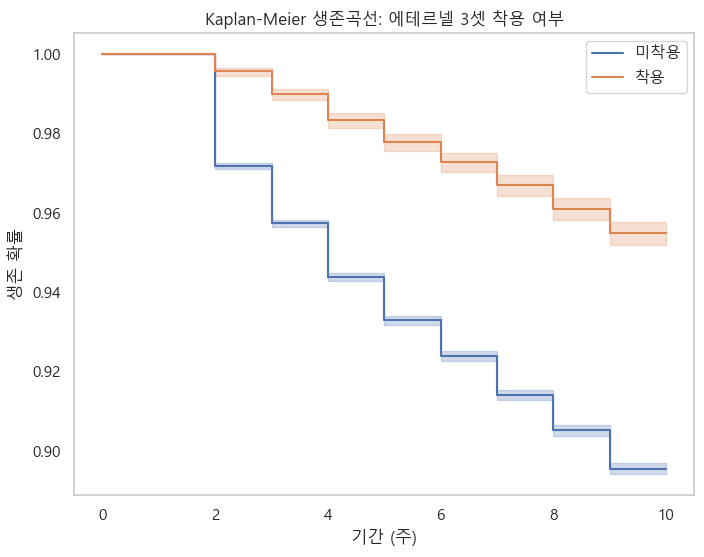


[로그랭크 검정]
p-value: 0.0000


<lifelines.CoxPHFitter: fitted with 209340 total observations, 188546 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 209340
number of events observed = 20794
   partial log-likelihood = -253287.85
         time fit was run = 2025-04-29 06:09:02 UTC

---
                   coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                          
eternal_3set_flag -0.88      0.42      0.04           -0.95           -0.81                0.39                0.45

                   cmp to      z      p  -log2(p)
covariate                                        
eternal_3set_flag    0.00 -24.76 <0.005    447.17
---
Concordance = 0.53
Partial AIC = 506577.71
log-likelihood ratio test = 811.22 on 1 df
-log2(p) of ll-ratio test = 590.33

In [113]:
import pandas as pd
import numpy as np
from scipy.stats import chi2_contingency
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter
from lifelines.statistics import logrank_test
from lifelines import CoxPHFitter

# 1. 에테르넬 3셋 착용 여부 그룹 만들기
df['eternal_3set_flag'] = df['eternal_3set_flag'].fillna(0)  # 혹시 결측치 있을 경우
df['eternal_3set_flag'] = df['eternal_3set_flag'].astype(int)

# 2. 이탈율 비교
grouped = df.groupby('eternal_3set_flag')['event'].mean()
print("이탈률 (0=미착용, 1=착용):")
print(grouped)

# 3. 카이제곱 검정 + 크리머 V 계산
contingency = pd.crosstab(df['eternal_3set_flag'], df['event'])
chi2, p, dof, expected = chi2_contingency(contingency)

# 크리머 V 계산
n = contingency.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency.shape)-1)))

print(f"\n[카이제곱 검정]")
print(f"p-value: {p:.4f}")
print(f"Cramér's V: {cramers_v:.4f}")

# 4. Kaplan-Meier 생존곡선
kmf0 = KaplanMeierFitter()
kmf1 = KaplanMeierFitter()

mask0 = df['eternal_3set_flag'] == 0
mask1 = df['eternal_3set_flag'] == 1

plt.figure(figsize=(8,6))
kmf0.fit(df.loc[mask0, 'duration'], df.loc[mask0, 'event'], label='미착용')
kmf1.fit(df.loc[mask1, 'duration'], df.loc[mask1, 'event'], label='착용')

kmf0.plot_survival_function()
kmf1.plot_survival_function()
plt.title('Kaplan-Meier 생존곡선: 에테르넬 3셋 착용 여부')
plt.xlabel('기간 (주)')
plt.ylabel('생존 확률')
plt.grid()
plt.show()

# 5. 로그랭크 검정
logrank_result = logrank_test(
    df.loc[mask0, 'duration'], df.loc[mask1, 'duration'],
    event_observed_A=df.loc[mask0, 'event'], event_observed_B=df.loc[mask1, 'event']
)
print(f"\n[로그랭크 검정]")
print(f"p-value: {logrank_result.p_value:.4f}")

# 6. Cox 비례위험모형 적합
cph_df = df[['duration', 'event', 'eternal_3set_flag']].copy()
cph = CoxPHFitter()
cph.fit(cph_df, duration_col='duration', event_col='event')
cph.print_summary()  # 계수(coef), hazard ratio(exp(coef)) 등 출력


📌 [카이제곱 검정 결과]
Chi2: 1676.0737
P-value: 0.0000
Cramér's V: 0.0895

 [Log-rank 검정 결과]


<lifelines.StatisticalResult: logrank_test>
               t_0 = -1
 null_distribution = chi squared
degrees_of_freedom = 1
         test_name = logrank_test

---
 test_statistic      p  -log2(p)
        1681.88 <0.005       inf

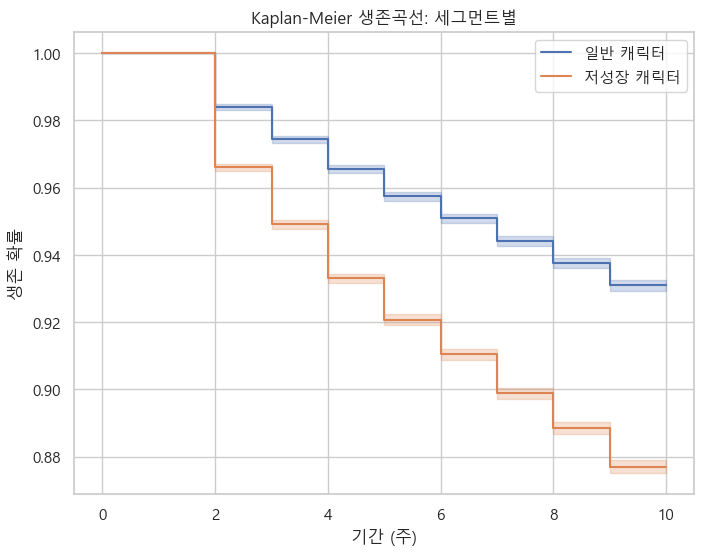

<lifelines.CoxPHFitter: fitted with 209316 total observations, 188525 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 209316
number of events observed = 20791
   partial log-likelihood = -252782.99
         time fit was run = 2025-05-12 01:18:51 UTC

---
              coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                     
segment_flag  0.61      1.84      0.02            0.58            0.64                1.78                1.89

              cmp to     z      p  -log2(p)
covariate                                  
segment_flag    0.00 40.39 <0.005       inf
---
Concordance = 0.57
Partial AIC = 505567.98
log-likelihood ratio test = 1743.04 on 1 df
-log2(p) of ll-ratio test = inf

In [15]:
from scipy.stats import chi2_contingency
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from lifelines import KaplanMeierFitter, CoxPHFitter
from lifelines.statistics import logrank_test
import seaborn as sns

# 1. 카이제곱 검정 + Cramér's V
contingency_table = pd.crosstab(df['segment_flag'], df['event'])
chi2, p, dof, expected = chi2_contingency(contingency_table)
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("📌 [카이제곱 검정 결과]")
print(f"Chi2: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Cramér's V: {cramers_v:.4f}")

# 2. Log-rank 검정
group0 = df[df['segment_flag'] == 0]
group1 = df[df['segment_flag'] == 1]

results = logrank_test(
    group0['duration'], group1['duration'],
    event_observed_A=group0['event'],
    event_observed_B=group1['event']
)

print("\n [Log-rank 검정 결과]")
results.print_summary()

# 3. Kaplan-Meier 생존곡선
kmf = KaplanMeierFitter()
plt.figure(figsize=(8,6))

for value, label in zip([0,1], ['일반 캐릭터', '저성장 캐릭터']):
    mask = df['segment_flag'] == value
    kmf.fit(df[mask]['duration'], df[mask]['event'], label=label)
    kmf.plot_survival_function(ci_show=True)

plt.title('Kaplan-Meier 생존곡선: 세그먼트별')
plt.xlabel('기간 (주)')
plt.ylabel('생존 확률')
plt.grid(True)
plt.savefig("segment_churn_rate.png", dpi=300)
plt.show()

# 4. Cox 비례위험모형
cph_df = df[['duration', 'event', 'segment_flag']]
cph = CoxPHFitter()
cph.fit(cph_df, duration_col='duration', event_col='event')
cph.print_summary()


In [23]:
# 세그먼트 별로 이탈자 수를 주차별로 확인
for value, label in zip([0,1], ['일반 캐릭터', '저성장 캐릭터']):
    print(f"\n📊 {label} 이탈자 수 (주차별)")
    subset = df[(df["segment_flag"] == value) & (df["event"] == 1)]
    churn_by_week = subset["duration"].value_counts().sort_index()
    print(churn_by_week)



📊 일반 캐릭터 이탈자 수 (주차별)
duration
2    1471
3     890
4     821
5     733
6     604
7     629
8     595
9     607
Name: count, dtype: int64

📊 저성장 캐릭터 이탈자 수 (주차별)
duration
2    3984
3    2001
4    1883
5    1437
6    1208
7    1369
8    1215
9    1344
Name: count, dtype: int64


In [61]:
df2[df2["duration"] == 1]["event"].value_counts()


Series([], Name: count, dtype: int64)

In [60]:
df2 = pd.read_csv("character_level_fill.csv", low_memory=False)

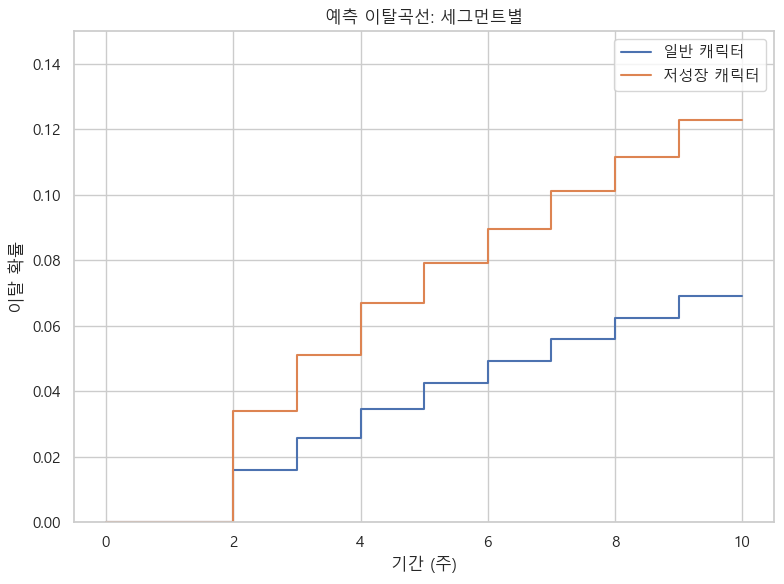

In [19]:
# 3. Kaplan-Meier 이탈곡선 (label 기반으로 컬럼명 처리)
kmf = KaplanMeierFitter()
plt.figure(figsize=(8,6))

for value, label in zip([0,1], ['일반 캐릭터', '저성장 캐릭터']):
    mask = df['segment_flag'] == value
    kmf.fit(df[mask]['duration'], df[mask]['event'], label=label)
    
    col_name = kmf.survival_function_.columns[0]  # 컬럼명 자동 추출
    plt.step(
        kmf.survival_function_.index,
        1 - kmf.survival_function_[col_name],
        where="post",
        label=label
    )

plt.title('예측 이탈곡선: 세그먼트별')
plt.xlabel('기간 (주)')
plt.ylabel('이탈 확률')

plt.ylim(0, 0.15)  # ✅ 범위를 줄여서 변화가 더 또렷하게 보이도록
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.savefig("segment_churn_curve.png", dpi=300)
plt.show()



In [115]:
# 1. 6차 이상만 필터링
filtered_df = df[df['character_class_level'] == 6]

# 2. 교차표 생성
contingency_table = pd.crosstab(filtered_df['character_class'], filtered_df['event'])

# 3. 카이제곱 검정 (expected 같이 출력)
chi2, p, dof, expected = chi2_contingency(contingency_table)

# 4. 기대도수 5 이하 셀 비율 확인
low_expected = (expected < 5).sum()
total_cells = expected.size
low_expected_ratio = low_expected / total_cells

print(f"전체 셀 수: {total_cells}")
print(f"기대도수 5 이하 셀 수: {low_expected}")
print(f"비율: {low_expected_ratio:.4f}")


전체 셀 수: 92
기대도수 5 이하 셀 수: 0
비율: 0.0000


In [116]:
# 카이제곱 검정
chi2, p, dof, expected = chi2_contingency(contingency_table)

# Cramér's V 계산
n = contingency_table.sum().sum()
cramers_v = np.sqrt(chi2 / (n * (min(contingency_table.shape) - 1)))

print("📌 [직업군별 카이제곱 결과]")
print(f"Chi2: {chi2:.4f}")
print(f"P-value: {p:.4f}")
print(f"Cramér's V: {cramers_v:.4f}")


📌 [직업군별 카이제곱 결과]
Chi2: 518.9320
P-value: 0.0000
Cramér's V: 0.0498


In [117]:
# 직업별 평균 이탈률 계산
job_event_rate = filtered_df.groupby('character_class')['event'].mean().sort_values(ascending=False)

# Top 10 직업 뽑기
top_jobs = job_event_rate.head(10).index.tolist()
print("Top 10 직업:", top_jobs)


Top 10 직업: ['나이트워커', '섀도어', '소울마스터', '바이퍼', '라라', '은월', '일리움', '루미너스', '배틀메이지', '플레임위자드']


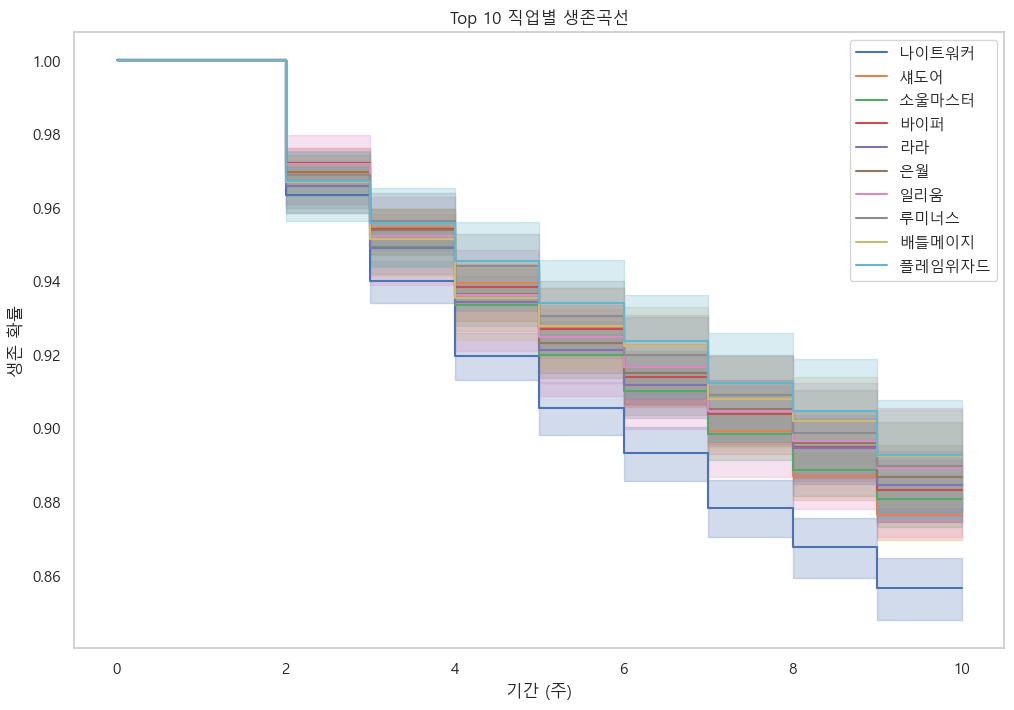

In [119]:
from lifelines import KaplanMeierFitter
import matplotlib.pyplot as plt

# 생존곡선 객체 생성
kmf = KaplanMeierFitter()

plt.figure(figsize=(12, 8))

# 각 직업별로 생존곡선 그리기
for job in top_jobs:
    mask = filtered_df['character_class'] == job
    kmf.fit(filtered_df[mask]['duration'], event_observed=filtered_df[mask]['event'], label=job)
    kmf.plot_survival_function()

plt.title('Top 10 직업별 생존곡선')
plt.xlabel('기간 (주)')
plt.ylabel('생존 확률')
plt.grid()
plt.legend()
plt.show()


In [124]:
# 6차 이상 필터링
df_filtered = df[df['character_class_level'] == 6].copy()

# 유저 수 기준 직업 필터링
job_counts = df_filtered['character_class'].value_counts()
valid_jobs = job_counts[job_counts >= 300].index  # 직업별 최소 300명 이상
df_filtered = df_filtered[df_filtered['character_class'].isin(valid_jobs)]
# 더미 인코딩
df_dummy = pd.get_dummies(df_filtered, columns=['character_class'], drop_first=True)

# 단일값만 있는 컬럼 제거 (0 또는 1만 있는 경우)
nunique = df_dummy.nunique()
df_dummy = df_dummy.loc[:, nunique > 1]
from lifelines import CoxPHFitter

cph_df = df_dummy[['duration', 'event'] + [col for col in df_dummy.columns if col.startswith('character_class_')]]

cph = CoxPHFitter()
cph.fit(cph_df, duration_col='duration', event_col='event')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 208836 total observations, 188210 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 208836
number of events observed = 20626
   partial log-likelihood = -251345.83
         time fit was run = 2025-04-29 06:33:21 UTC

---
                            coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                   
character_class_나이트워커       0.40      1.50      0.05            0.31            0.49                1.37                1.63
character_class_다크나이트      -0.27      0.77      0.07           -0.40           -0.13                0.67                0.88
character_class_데몬슬레이어     -0.08      0.93      0.08           -0.24            0.08                0.79                1.09
character_class_데몬어벤져      -0.17      0.85      0.06           -0.29           -0.04                0.75                0.96
character_class_듀얼블레이더     -0.23      0.79      0.05           -0.32           -0.14                0.72                0.87
character_class_라라          0.17      1.19      0.06            0.06            0.28                1.07                1.32
character_class_루미너스        0.12      1.13      0.07           -0.02            0.26                0.98                1.30
character_class_메르세데스      -0.04      0.96      0.06           -0.15            0.07                0.86                1.07
character_class_메카닉        -0.03      0.97      0.10           -0.23            0.17                0.80                1.18
character_class_미하일         0.01      1.01      0.10           -0.18            0.19                0.84                1.21
character_class_바이퍼         0.18      1.20      0.05            0.08            0.28                1.08                1.32
character_class_배틀메이지       0.10      1.10      0.07           -0.05            0.24                0.95                1.27
character_class_보우마스터      -0.05      0.95      0.07           -0.18            0.08                0.83                1.08
character_class_블래스터        0.09      1.09      0.10           -0.11            0.28                0.90                1.33
character_class_비숍         -0.02      0.98      0.04           -0.09            0.06                0.91                1.06
character_class_섀도어         0.24      1.27      0.04            0.15            0.32                1.17                1.38
character_class_소울마스터       0.21      1.23      0.05            0.12            0.30                1.12                1.34
character_class_스트라이커       0.02      1.02      0.10           -0.18            0.23                0.83                1.25
character_class_신궁         -0.04      0.96      0.09           -0.21            0.13                0.81                1.14
character_class_아델         -0.08      0.93      0.04           -0.16            0.00                0.85                1.00
character_class_아란          0.04      1.04      0.07           -0.10            0.17                0.91                1.19
character_class_아크         -0.20      0.82      0.06           -0.31           -0.08                0.73                0.92
character_class_아크메이지(불,독)  0.06      1.06      0.05           -0.03            0.15                0.97                1.17
character_class_아크메이지(썬,콜) -0.11      0.90      0.05           -0.21           -0.01                0.81                0.99
character_class_에반         -0.16      0.85      0.07           -0.31           -0.02                0.73                0.98
character_class_엔젤릭버스터      0.05      1.05      0.05           -0.05            0.15                0.95                1.16
character_class_와일드헌터      -0.25      0.78      0.15           -0.54            0.04                0.58                1.04


In [125]:
from lifelines import CoxPHFitter

# (1) 6차 이상만 필터링 + 유효 직업군만
df_filtered = df[df['character_class_level'] == 6].copy()
job_counts = df_filtered['character_class'].value_counts()
valid_jobs = job_counts[job_counts >= 300].index
df_filtered = df_filtered[df_filtered['character_class'].isin(valid_jobs)]

# (2) 더미 인코딩
df_dummy = pd.get_dummies(df_filtered, columns=['character_class'], drop_first=True)

# (3) 단일값 컬럼 제거
nunique = df_dummy.nunique()
df_dummy = df_dummy.loc[:, nunique > 1]

# (4) 분석에 필요한 컬럼만
features = ['duration', 'event', 
            'eternal_3set_flag', 
            'segment_flag', 
            'guild_join_flag', 
            'liberation_quest_clear_flag'] + \
           [col for col in df_dummy.columns if col.startswith('character_class_')]

cph_df = df_dummy[features]

# (5) Cox 회귀
cph = CoxPHFitter()
cph.fit(cph_df, duration_col='duration', event_col='event')
cph.print_summary()


<lifelines.CoxPHFitter: fitted with 208836 total observations, 188210 right-censored observations>
             duration col = 'duration'
                event col = 'event'
      baseline estimation = breslow
   number of observations = 208836
number of events observed = 20626
   partial log-likelihood = -248599.96
         time fit was run = 2025-04-29 06:40:31 UTC

---
                             coef exp(coef)  se(coef)  coef lower 95%  coef upper 95% exp(coef) lower 95% exp(coef) upper 95%
covariate                                                                                                                    
eternal_3set_flag           -0.56      0.57      0.04           -0.63           -0.49                0.53                0.62
segment_flag                 0.32      1.38      0.02            0.29            0.36                1.34                1.43
guild_join_flag             -0.97      0.38      0.02           -1.01           -0.93                0.37                0.40
liberation_quest_clear_flag -0.57      0.57      0.02           -0.61           -0.53                0.54                0.59
character_class_나이트워커        0.21      1.23      0.05            0.12            0.29                1.12                1.34
character_class_다크나이트       -0.33      0.72      0.07           -0.46           -0.19                0.63                0.82
character_class_데몬슬레이어      -0.19      0.83      0.08           -0.34           -0.03                0.71                0.97
character_class_데몬어벤져       -0.30      0.74      0.06           -0.42           -0.18                0.65                0.84
character_class_듀얼블레이더      -0.27      0.76      0.05           -0.36           -0.18                0.70                0.84
character_class_라라          -0.08      0.92      0.06           -0.19            0.03                0.83                1.03
character_class_루미너스        -0.06      0.94      0.07           -0.20            0.07                0.82                1.08
character_class_메르세데스       -0.15      0.86      0.06           -0.26           -0.04                0.77                0.96
character_class_메카닉         -0.09      0.92      0.10           -0.29            0.11                0.75                1.11
character_class_미하일         -0.05      0.95      0.10           -0.24            0.13                0.79                1.14
character_class_바이퍼          0.02      1.02      0.05           -0.08            0.12                0.92                1.12
character_class_배틀메이지        0.03      1.03      0.07           -0.11            0.18                0.90                1.19
character_class_보우마스터       -0.16      0.85      0.07           -0.29           -0.03                0.75                0.97
character_class_블래스터         0.04      1.04      0.10           -0.16            0.24                0.85                1.27
character_class_비숍           0.00      1.00      0.04           -0.08            0.08                0.93                1.08
character_class_섀도어          0.06      1.06      0.04           -0.02            0.15                0.98                1.16
character_class_소울마스터        0.01      1.01      0.05           -0.08            0.10                0.93                1.11
character_class_스트라이커       -0.16      0.85      0.10           -0.37            0.04                0.69                1.04
character_class_신궁          -0.18      0.84      0.09           -0.35           -0.01                0.71                0.99
character_class_아델          -0.19      0.82      0.04           -0.28           -0.11                0.76                0.89
character_class_아란          -0.09      0.92      0.07           -0.22            0.05                0.80                1.05
character_class_아크          -0.23      0.79      0.06           -0.35           -0.12                0.70                0.89
character_class_아크메이지(불,독)   0.06      1.06      0.05           -0.03            0.15            

In [126]:
from lifelines import CoxPHFitter

# 1. 캐릭터 생성일을 숫자형으로 변환 (ex. 1970년부터 몇 일째인지)
df_filtered['create_days'] = (pd.to_datetime(df_filtered['character_date_create']) - pd.to_datetime('1970-01-01')).dt.days

# 2. 분석에 필요한 컬럼만
features = ['duration', 'event', 
            'eternal_3set_flag', 
            'segment_flag', 
            'guild_join_flag', 
            'liberation_quest_clear_flag',
            'create_days',            # 생성일 추가
            'popularity']             # 인기도 추가
features += [col for col in df_dummy.columns if col.startswith('character_class_')]

cph_df = df_dummy.copy()
cph_df['create_days'] = df_filtered['create_days']
cph_df['popularity'] = df_filtered['popularity']
cph_df = cph_df[features]

# 3. Cox 회귀
cph = CoxPHFitter()
cph.fit(cph_df, duration_col='duration', event_col='event')
cph.print_summary()


TypeError: Cannot subtract tz-naive and tz-aware datetime-like objects